# PRCP-1027-Skin Disorder

# PTID-CDS-APR-23-1493

## Problem statement: To build a model ,perform EDA and  provide suggestions to Doctors regarding diagnosis of different type of  skin diseases

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("dataset_35_dermatology (1).csv")

## Basic Checks

In [3]:
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [6]:
data.shape

(366, 35)

In [7]:
data["class"].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [8]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [9]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

# Task 1: Prepare a complete data analysis report on the given data.

# EDA

## Univariate Analysis

## Difference Between Clinical  And histopathological

Clinical and histopathological evaluations are two complementary approaches used in the diagnosis and assessment of skin disorders. Here are the key differences between the two:

Clinical Evaluation:

* Clinical evaluation involves examining the patient's skin visually and assessing the symptoms and physical characteristics of the skin disorder.
* It is based on the observation of external signs, such as rash, redness, swelling, texture changes, blistering, scaling, and other visible abnormalities.
* Clinical evaluation is typically performed by dermatologists or healthcare professionals through a physical examination and patient history.
* It focuses on identifying patterns, distribution, and overall appearance of skin lesions to make a preliminary diagnosis and determine the course of treatment.
* Clinical evaluation is non-invasive and can be performed during a routine clinical visit.

Histopathological Evaluation:

* Histopathological evaluation involves the microscopic examination of skin tissue samples (biopsies) obtained from the affected area.
* It is performed by a pathologist who analyzes the cellular and tissue changes at a microscopic level.
* The biopsy sample is processed, embedded in paraffin, and stained before being examined under a microscope.
* Histopathological evaluation provides detailed information about the cellular composition, structural changes, and inflammatory processes occurring within the skin.
* It helps in confirming or refining the diagnosis, assessing the disease severity, and identifying specific histological features associated with different skin disorders.
* Histopathological evaluation is invasive, requiring the collection of tissue samples, and is usually performed when clinical findings are inconclusive or to monitor disease progression.
  In summary, clinical evaluation focuses on the visual assessment of skin disorders and their symptoms, while histopathological evaluation involves microscopic examination of skin tissue samples to analyze cellular and structural changes. Both approaches are important for a comprehensive understanding of skin disorders, with clinical evaluation being the first step in diagnosis and histopathological evaluation providing detailed insights into the underlying pathology.




In [ ]:
Clinical_Evaluation = data[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement']]

In [ ]:
Histopathological_Evaluation = data[['melanin_incontinence','PNL_infiltrate',
   'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule','munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer','vacuolisation_and_damage_of_basal_layer', 'spongiosis','saw-tooth_appearance_of_retes', 
       'follicular_horn_plug','perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]

## Clinical Evaluation:

In [ ]:
list(enumerate(Clinical_Evaluation))

[(0, 'erythema'),
 (1, 'scaling'),
 (2, 'definite_borders'),
 (3, 'itching'),
 (4, 'koebner_phenomenon'),
 (5, 'polygonal_papules'),
 (6, 'follicular_papules'),
 (7, 'oral_mucosal_involvement'),
 (8, 'knee_and_elbow_involvement'),
 (9, 'scalp_involvement')]

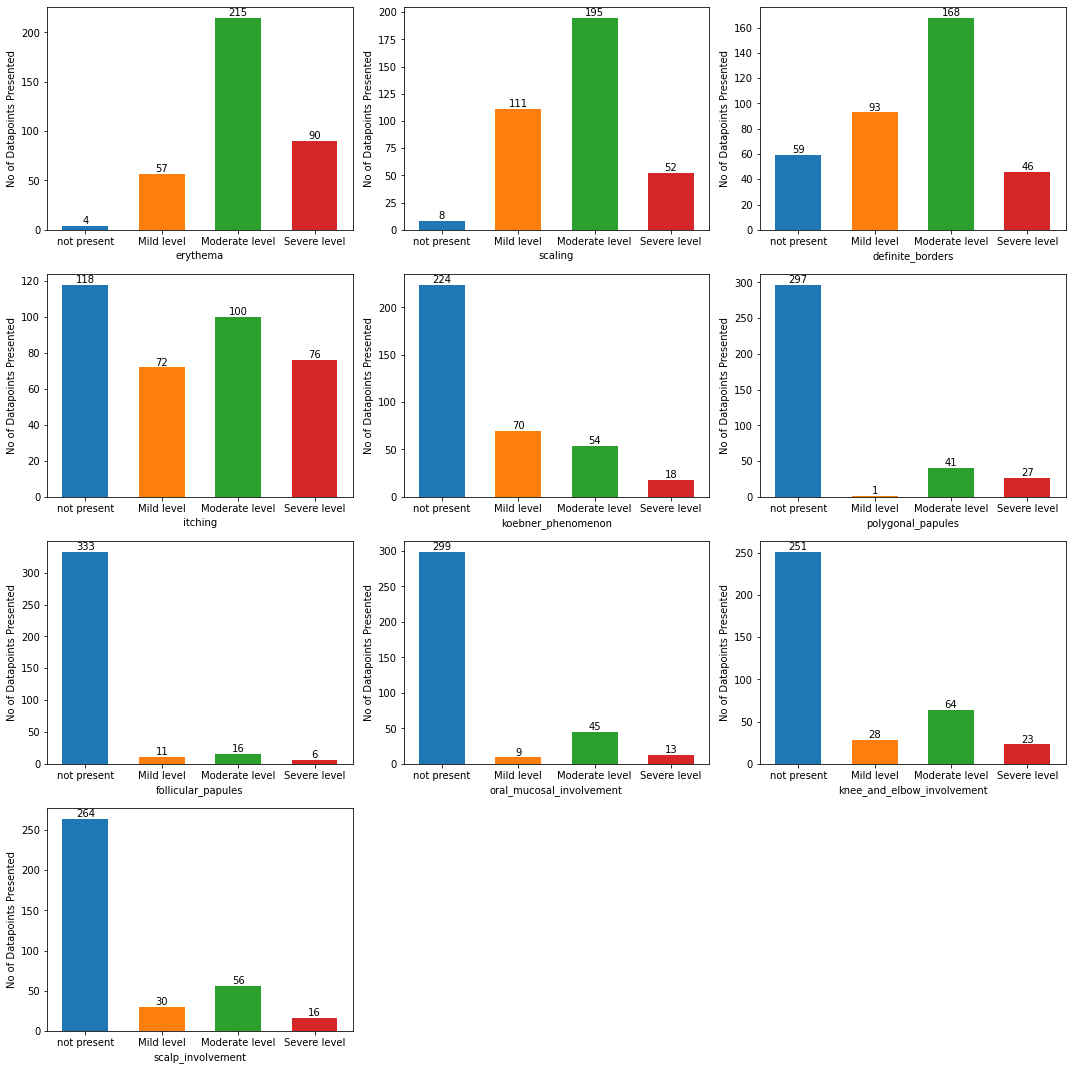

In [ ]:
plt.figure(figsize=(15,15),facecolor="white")
plt_num = 1
for i in Clinical_Evaluation:
    ax=plt.subplot(4,3,plt_num)
    sns.countplot(x = Clinical_Evaluation[i], data=Clinical_Evaluation,saturation=1,width=0.6)
    plt.ylabel("No of Datapoints Presented")
    labels = ["not present", "Mild level", "Moderate level", "Severe level"]
    plt.xticks(range(len(labels)), labels)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 5), textcoords='offset points')
    plt_num+=1        
plt.tight_layout()    
plt.show() 

### 1. erythema

Erythema is a term used to describe redness or reddening of the skin. It is a common clinical finding that can be associated with various skin conditions and underlying causes. Erythema occurs due to increased blood flow to the skin, often resulting from inflammation, dilation of blood vessels, or increased blood flow in the affected area. Here are a few examples of skin conditions where erythema may be observed:Sunburn, Dermatitis, Infections, Autoimmune diseases, Allergic reactions.

## 2. Scaling

Scaling refers to the presence of visible flakes or dry skin that can occur on the surface of the skin. It is a common symptom associated with several skin conditions and can vary in severity and appearance. Scaling occurs when there is an abnormal or accelerated process of skin cell turnover and shedding. Here are a few examples of skin conditions where scaling may be observed: Dry skin (Xerosis), Psoriasis, Seborrheic dermatitis,Fungal infections, Ichthyosis. 

Scaling can also occur as a secondary symptom in other skin conditions, such as eczema, contact dermatitis, or certain types of skin infections. The underlying cause of scaling needs to be determined through a thorough evaluation by a dermatologist or healthcare professional. Treatment options for scaling depend on the specific condition and may involve moisturizers, topical medications, or systemic therapies, as appropriate.

## 3. definite_borders

When referring to definite borders related to the skin, it typically describes the well-defined edges or margins of a skin lesion or abnormality. Having definite borders means that the boundary between the affected area and the surrounding healthy skin is clear and easily distinguishable. This characteristic can provide important information for clinicians when assessing skin conditions. Here are a few examples where definite borders may be observed: Benign moles, Dermatofibromas, Eczema, Ringworm (tinea corporis)

While definite borders can be a characteristic of benign or non-threatening skin conditions, it is important to note that not all skin abnormalities with definite borders are harmless. Some malignant or cancerous skin lesions, such as melanoma or basal cell carcinoma, can also exhibit well-defined edges. Therefore, it is essential to consult a dermatologist or healthcare professional for a proper evaluation and diagnosis of any concerning skin lesions, regardless of their border appearance.

## 4. itching

Itching, also known as pruritus, is a common symptom related to the skin that causes a sensation that prompts a desire to scratch or rub the affected area. Itching can be a bothersome and uncomfortable sensation, and it can occur due to various factors and underlying skin conditions. Here are a few examples: Dry skin, Allergic reactions, Eczema, Psoriasis, Dermatitis, Infections, Urticaria (hives), Systemic conditions.

## 5. koebner phenomenon

The Koebner phenomenon, also known as isomorphic response or isomorphic phenomenon, is a characteristic skin reaction that occurs in response to physical trauma or injury. Named after Heinrich Koebner, the phenomenon refers to the development of new skin lesions or the recurrence of pre-existing skin lesions at the site of injury or trauma. It is commonly observed in several skin conditions, particularly those with underlying immune-mediated or inflammatory processes. Here are a few examples: Psoriasis, Lichen planus, Vitiligo, Cutaneous lupus erythematosus.

The Koebner phenomenon can occur due to various types of skin trauma, including cuts, burns, surgical incisions, friction, and even minor injuries such as scratches or insect bites. The exact mechanisms underlying this phenomenon are not fully understood, but it is believed to involve the activation of immune cells and the release of inflammatory mediators at the site of injury.

It is important to note that not everyone with the mentioned skin conditions will exhibit the Koebner phenomenon, and the occurrence may vary from person to person. If you have a known skin condition or are at risk for developing one, it is advisable to take precautions to avoid skin trauma and seek prompt medical attention if you notice any new or worsening skin lesions at sites of injury.

## 6. polygonal papules

Polygonal papules refer to skin lesions that have a distinct polygonal or angular shape. These papules are characterized by their multiple sides and may resemble tiny flat-topped bumps on the skin. Polygonal papules can be seen in various skin conditions, including:Lichen planus, Granuloma annulare, Cutaneous sarcoidosis, Prurigo nodularis, Guttate psoriasis.

## 7. Follicular papules

Follicular papules are skin lesions characterized by small, raised bumps or papules that are typically centered around hair follicles. These papules may appear slightly reddened or flesh-colored and can be associated with various skin conditions. Here are some examples: Acne, Folliculitis, Keratosis pilaris, Pityriasis folliculorum, Drug-induced follicular papules.


It is important to note that the presence of follicular papules alone is not enough for a definitive diagnosis. A thorough evaluation by a dermatologist or healthcare professional is necessary to identify the underlying cause and provide appropriate treatment. Additional factors such as the distribution of the papules, associated symptoms, medical history, and sometimes diagnostic tests can aid in making an accurate diagnosis and guiding treatment.

## 8. oral mucosal involvement

Oral mucosal involvement refers to the presence of lesions, inflammation, or other abnormalities affecting the mucous membranes within the mouth and oral cavity. While it is not directly related to the skin, oral mucosal involvement can occur in several conditions that also affect the skin. Here are a few examples:Autoimmune diseases, Oral lichen planus, Oral candidiasis, Sjögren's syndrome, Behçet's disease.

## 9. knee and elbow involvement

Knee and elbow involvement in skin disease refers to the presence of skin symptoms or lesions specifically affecting the areas around the knees and elbows. In certain skin conditions, these regions can be particularly prone to developing characteristic rashes, inflammation, or other skin manifestations.

## 10.scalp_involvement

Scalp involvement refers to the presence of skin conditions or diseases that specifically affect the scalp. The scalp is the area of skin covering the top of the head, and it can be affected by various conditions that may cause symptoms such as itching, redness, flaking, hair loss, or the formation of lesions. Here are some examples of skin diseases that commonly involve the scalp:Scalp psoriasis, Seborrheic dermatitis, Tinea capitis, Folliculitis, Alopecia areata.

## 11. family_history

Family history in skin disease refers to the presence of a particular skin condition or a group of skin conditions within a person's family. It refers to the occurrence of the same or similar skin diseases among blood relatives, such as parents, siblings, grandparents, aunts, uncles, and cousins.

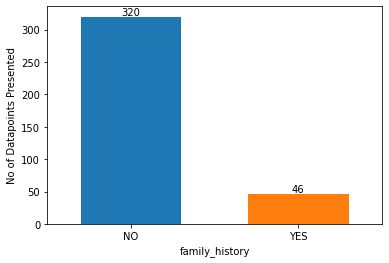

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "family_history", data=data,saturation=1,width=0.6)
labels = ["NO", "YES"]
plt.ylabel("No of Datapoints Presented")
plt.xticks(range(len(labels)), labels)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show() 

# Histopathological Evaluation:

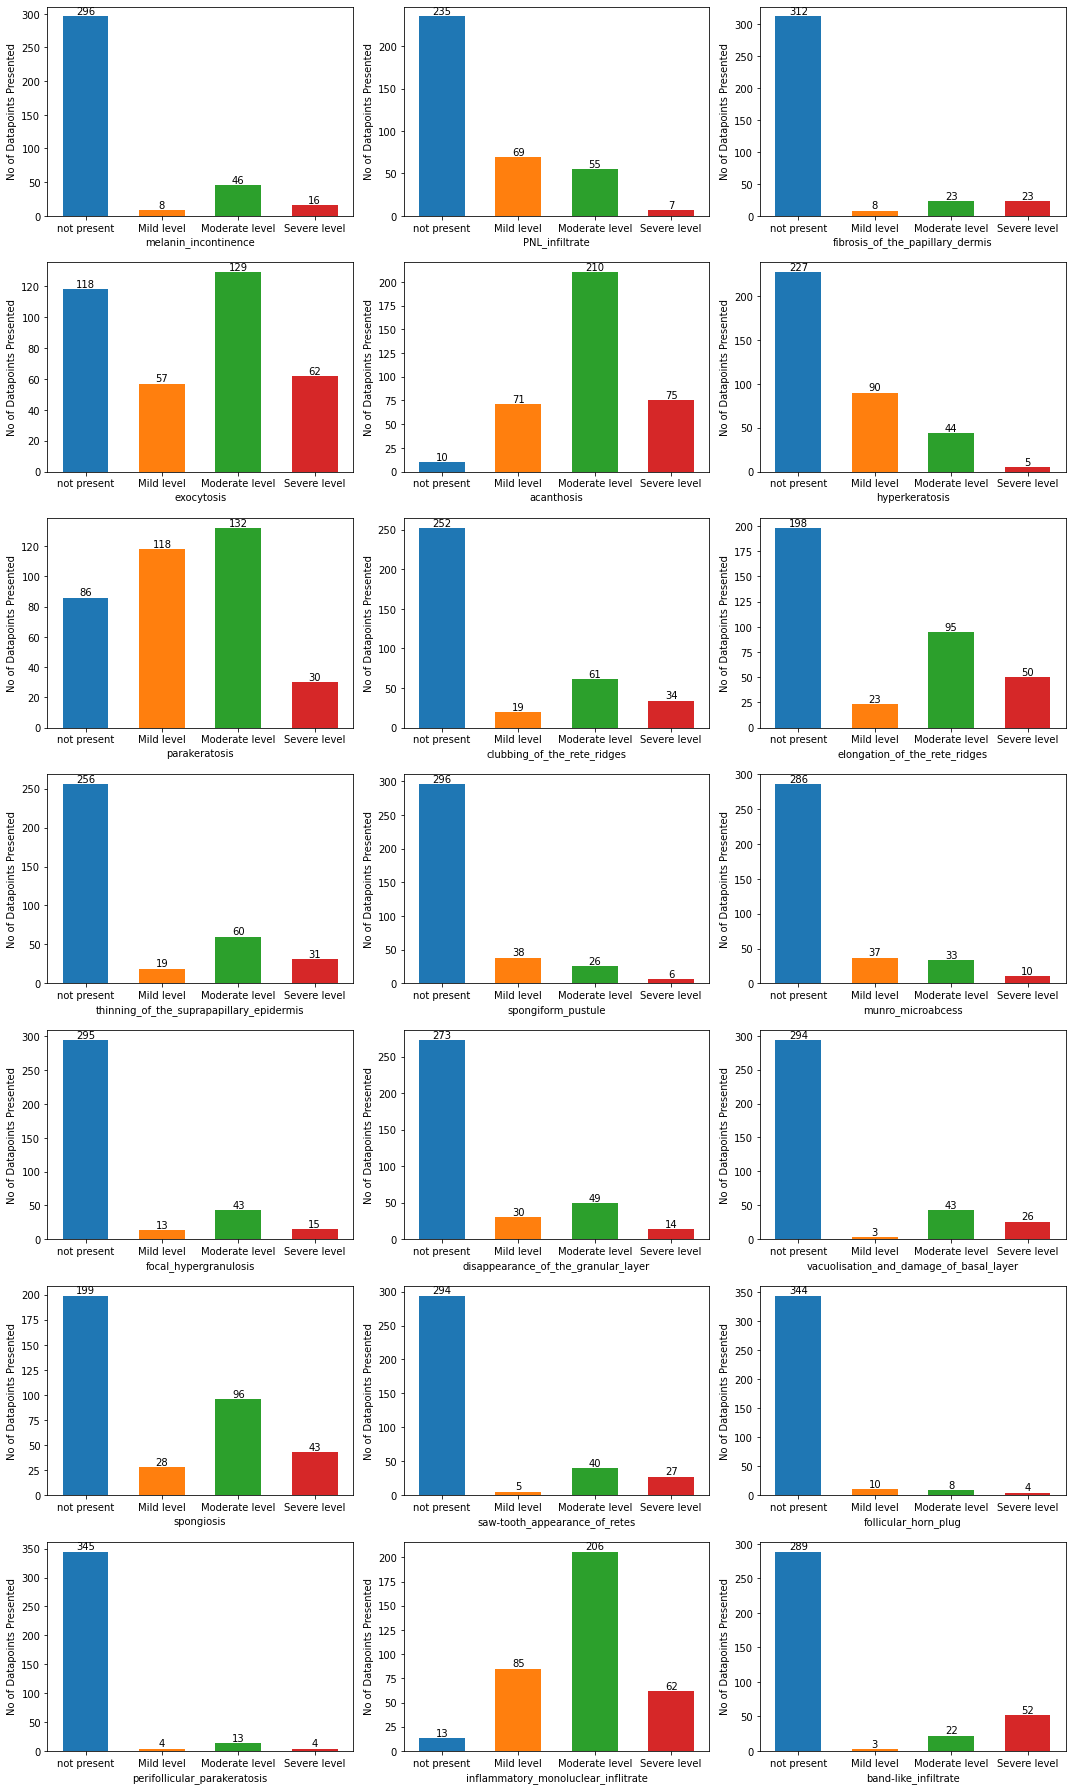

In [ ]:
plt.figure(figsize=(15,25),facecolor="white")
plt_num = 1
for i in Histopathological_Evaluation:
    ax=plt.subplot(7,3,plt_num)
    sns.countplot(x = Histopathological_Evaluation[i], data=Histopathological_Evaluation,saturation=1,width=0.6)
    plt.ylabel("No of Datapoints Presented")
    labels = ["not present", "Mild level", "Moderate level", "Severe level"]
    plt.xticks(range(len(labels)), labels)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 5), textcoords='offset points')
    plt_num+=1        
plt.tight_layout()    
plt.show() 
    

## 12. melanin_incontinence

Melanin incontinence is a histopathological term used to describe the presence of melanin pigment within the surrounding tissues of the skin, specifically in the dermis. Normally, melanin is produced by melanocytes, specialized cells located in the basal layer of the epidermis. However, in certain skin conditions or diseases, melanin can migrate or leak out of the melanocytes and accumulate in the nearby dermal tissues.

Melanin incontinence can occur as a result of various factors, including inflammation, injury, or other underlying skin conditions. Some examples of skin conditions associated with melanin incontinence include: Post-inflammatory hyperpigmentation, Lichenoid dermatoses, Photodermatoses



## 13. eosinophils in the infiltrate

Eosinophils in the infiltrate refer to the presence of eosinophils, a type of white blood cell, within the inflammatory infiltrate of the skin. Eosinophils are often involved in allergic reactions and certain inflammatory conditions. When eosinophils are present in the infiltrate, it can provide important information about the underlying pathology of the skin condition.

The presence of eosinophils in the infiltrate can be associated with several skin conditions, including:Eosinophilic cellulitis (Wells syndrome), Eosinophilic folliculitis, Drug-induced hypersensitivity reactions, Eosinophilic granulomatosis with polyangiitis (EGPA), Parasitic infections.

## 14. PNL_infiltrate

nerve deficit or nerve thickening, without any cutaneous lesions, with a negative skin smear. and no other identifiable pathology. This is commonly known as pure neuritic leprosy (PNL) and is more common in the Indian subcontinent.

Pure Neural Leprosy (PNL) is a rare clinical form of leprosy in which patients do not present with the classical skin lesions but have a high burden of the disability associated with the disease. Clinical characteristics and follow up of patients in PNL are still poorly described in the literature.

## 15. fibrosis_of_the_papillary_dermis

Fibrosis of the papillary dermis refers to the excessive deposition of fibrous tissue within the papillary dermis, the uppermost layer of the dermis located just beneath the epidermis. Fibrosis is the process of excessive scarring or connective tissue formation, which can occur in various skin conditions and diseases. When fibrosis affects the papillary dermis, it can lead to several clinical manifestations.

Fibrosis of the papillary dermis can be seen in conditions such as:Scleroderma, Dermal fibrosis in chronic dermatitis, Chronic graft-versus-host disease (GVHD), Cutaneous fibrosing disorders.

## 16. exocytosis

Exocytosis is a cellular process in which vesicles within a cell fuse with the cell membrane, releasing their contents into the extracellular space. While exocytosis itself is not typically associated with skin disorders, certain skin conditions involve abnormal exocytosis or disrupted cellular trafficking processes, which can contribute to the development of skin disorders. Here are a few examples: Psoriasis, Atopic dermatitis, Darier's disease, Pemphigus

## 17. acanthosis

Acanthosis refers to the thickening of the epidermis, which is the outermost layer of the skin. It is a histopathological finding often associated with various skin conditions and underlying systemic diseases. Acanthosis can occur due to a variety of factors, including chronic irritation, inflammation, hormonal changes, or genetic predisposition. Here are some examples of acanthosis related to specific skin conditions: Acanthosis nigricans, Acanthosis palmaris et plantaris, Acanthosis in dermatosis neglecta, Acanthosis in certain skin infections.

## 18. Hyperkeratosis

Hyperkeratosis refers to an abnormal thickening of the outermost layer of the skin, called the stratum corneum. It is a histopathological finding that can occur in various skin conditions and is often associated with chronic irritation or other underlying factors. Here are some examples of conditions in which hyperkeratosis is commonly observed: Calluses and corns, Psoriasis, Seborrheic keratosis, Actinic keratosis, Ichthyosis.

Hyperkeratosis can also be seen in other skin conditions, such as certain viral warts, eczema, and fungal infections. It is important to note that hyperkeratosis itself is not a specific diagnosis but rather a histopathological finding. The underlying cause of hyperkeratosis needs to be determined through a combination of clinical evaluation, patient history, and sometimes additional investigations. A dermatologist or healthcare professional should be consulted for an accurate diagnosis and appropriate management of any skin condition associated with hyperkeratosis.




## 19. parakeratosis

Parakeratosis is a specific type of hyperkeratosis that involves the retention of nuclei within the keratinocytes of the stratum corneum, which is the outermost layer of the skin. Unlike the normal process of keratinization, where the nuclei are lost as cells mature and move to the outermost layer, parakeratosis occurs when these nuclei are retained.

Parakeratosis is commonly seen in certain skin conditions, including: Psoriasis, Pityriasis rubra pilaris, Chronic dermatitis. 
Parakeratosis can also be present in other skin conditions and histopathological findings, including certain types of viral infections, seborrheic dermatitis, and various disorders affecting keratinization and epidermal differentiation. 

It's important to note that parakeratosis is a histopathological observation and, by itself, does not provide a definitive diagnosis. The underlying cause of parakeratosis needs to be evaluated in conjunction with other clinical findings and may require additional investigations or consultation with a dermatologist or healthcare professional for an accurate diagnosis and appropriate management.

## 20 clubbing of the rete ridges

Clubbing of the rete ridges, also known as acanthosis with elongation of the rete ridges, is a histopathological finding that can be related to various skin conditions. The rete ridges refer to the downward projections of the epidermis into the underlying dermis. Clubbing of the rete ridges occurs when these projections become elongated and widened, resulting in a club-like appearance under microscopic examination. Here are some examples of skin conditions associated with clubbing of the rete ridges:Acanthosis nigricans, Epidermal nevi, Darier's disease, Inflammatory skin conditions.

Clubbing of the rete ridges is not specific to any one condition and can be observed in various skin disorders characterized by chronic irritation, inflammation, or aberrant keratinocyte differentiation. It is important to note that the presence of clubbing of the rete ridges alone is not sufficient for diagnosis. A comprehensive evaluation, including clinical examination, patient history, and possibly additional investigations, is necessary for accurate diagnosis and appropriate management. Consulting a dermatologist or healthcare professional is recommended for further evaluation and guidance.

## 21. Elongation of the rete ridges

Elongation of the rete ridges, without the presence of clubbing, is a histopathological finding that can be associated with various skin conditions. The rete ridges are the downward projections of the epidermis into the underlying dermis. Elongation of the rete ridges refers to an increase in the length or depth of these projections. Here are some examples of skin conditions where elongation of the rete ridges can be observed: Psoriasis, Lichen planus, Dermatofibroma, Certain types of dermatitis.

## 22. Thinning of the suprapapillary epidermis

Thinning of the suprapapillary epidermis refers to a reduction in the thickness of the epidermis specifically in the region above the dermal papillae. The dermal papillae are small projections of connective tissue that extend into the epidermis. Thinning of the suprapapillary epidermis can be associated with various skin conditions and may have different implications depending on the specific context. Here are a few examples:Aging, Atrophy, Lichen sclerosus, Certain types of dermatitis,Chronic sun damage.

It is important to note that thinning of the suprapapillary epidermis is a histopathological finding and may not have specific clinical implications without considering other features or symptoms. A thorough evaluation by a dermatologist or healthcare professional, including clinical assessment and possibly additional investigations, is necessary to determine the underlying cause and guide appropriate management.

# 23. spongiform pustule

Spongiform pustule is a histopathological finding that can be associated with various skin conditions, particularly those that involve inflammatory reactions in the skin. It refers to the presence of pustules or vesicles filled with inflammatory cells within the epidermis. The term "spongiform" describes the appearance of the epidermis, which appears spongy due to the presence of these pustules. Here are a few examples of skin conditions where spongiform pustules may be observed:Pustular psoriasis, Acute contact dermatitis, Dyshidrotic eczema, Allergic contact dermatitis.

## 24. munro microabcess

Munro microabscess is a histopathological finding that is associated with certain skin conditions, particularly those characterized by inflammation and neutrophilic infiltration. It refers to the presence of small collections of neutrophils within the epidermis. These microabscesses are typically observed in the stratum corneum, the outermost layer of the epidermis. The term "Munro" refers to the scientist who first described these microabscesses. Munro microabscesses are commonly seen in the following skin conditions: Psoriasis, Pustular psoriasis, Acute dermatitis.

## 25. focal hypergranulosis

Focal hypergranulosis is a histopathological finding that is associated with certain skin conditions. It refers to an area of increased thickness or hyperplasia of the granular layer of the epidermis. The granular layer, also known as the stratum granulosum, is the layer of the epidermis located between the stratum spinosum and the stratum corneum. Here are a few examples of skin conditions where focal hypergranulosis may be observed: Hyperkeratotic disorders, Psoriasis, Epidermal nevi, Certain inflammatory skin conditions.

## 26. disappearance of the granular layer

The disappearance or loss of the granular layer of the epidermis, known as granular layer vacuolization or granular layer degeneration, can be associated with certain skin conditions. It refers to the thinning or absence of the normal granular layer, which is located between the stratum spinosum and the stratum corneum. Here are a few examples of skin conditions where the disappearance of the granular layer may be observed: Toxic epidermal necrolysis (TEN), Pemphigus vulgaris, Severe forms of eczema,Some types of drug reactions.

## 27. vacuolisation and damage of basal layer

Vacuolization and damage of the basal layer of the epidermis can be associated with various skin conditions, particularly those involving autoimmune reactions or certain blistering disorders. Here are a few examples: Pemphigus, Bullous pemphigoid, Toxic epidermal necrolysis (TEN), Erythema multiforme (EM), Lupus erythematosus. 

## 28. Spongiosis

Spongiosis is a histopathological finding in the skin that refers to the presence of intercellular edema or accumulation of fluid within the epidermis. It is characterized by the separation or widening of intercellular spaces between keratinocytes in the epidermis. Spongiosis can be associated with various skin conditions, particularly those that involve inflammation or allergic reactions. Here are a few examples: Contact dermatitis, Atopic dermatitis, Allergic reactions, Eczematous dermatoses

## 29. saw tooth appearance of retes

The "saw tooth" appearance of the retes refers to a histopathological finding in the skin that is associated with certain autoimmune disorders, particularly those involving the epidermis. It describes the pattern of rete ridges, which are the downward extensions of the epidermis into the dermis. The saw tooth appearance is characterized by irregular, jagged, or saw-like edges of the rete ridges. Here are a few examples of skin conditions where the saw tooth appearance of retes may be observed:Chronic discoid lupus erythematosus (DLE), Subacute cutaneous lupus erythematosus (SCLE), Interface dermatitis.

## 29. follicular horn plug

A follicular horn plug, also known as a comedone, is a common skin finding that is associated with various conditions affecting the hair follicles and sebaceous glands. It refers to a plug or blockage within the follicular opening, which is composed of a mixture of keratinocytes, sebum, and debris. Here are a few examples of skin conditions where follicular horn plugs may be observed: Acne vulgaris, Favre-Racouchot syndrome, Seborrheic keratosis, Trichostasis spinulosa.

 

## 30. perifollicular parakeratosis

Perifollicular parakeratosis is a histopathological finding related to the skin that refers to the presence of parakeratotic scales or plugs around the hair follicles. Parakeratosis refers to the retention of nuclei in the stratum corneum, the outermost layer of the epidermis. Here are a few examples of skin conditions where perifollicular parakeratosis may be observed: Psoriasis, Pityriasis rubra pilaris (PRP), Ichthyoses, Other inflammatory skin conditions.

 

## 31. inflammatory monoluclear inflitrate

An inflammatory mononuclear infiltrate is a histopathological finding related to the skin that refers to the presence of inflammatory cells composed primarily of mononuclear cells, such as lymphocytes and monocytes/macrophages, in the affected tissue. This type of infiltrate is commonly observed in various skin conditions, indicating an immune response or inflammation. Here are a few examples of skin conditions where an inflammatory mononuclear infiltrate may be observed: Dermatitis, Autoimmune skin diseases, Infections, Granulomatous skin diseases.

# 32. band like infiltrate

A band-like infiltrate, also known as a band-like lymphocytic infiltrate, is a histopathological finding related to the skin that refers to the presence of a dense and linear infiltrate of lymphocytes in the dermis. This type of infiltrate is commonly observed in various skin conditions, particularly those involving immune-mediated or inflammatory processes. Here are a few examples of skin conditions where a band-like infiltrate may be observed: Lichen planus, Dermatomyositis, Lupus erythematosus, Morphea: Morphea.

## 33. Age

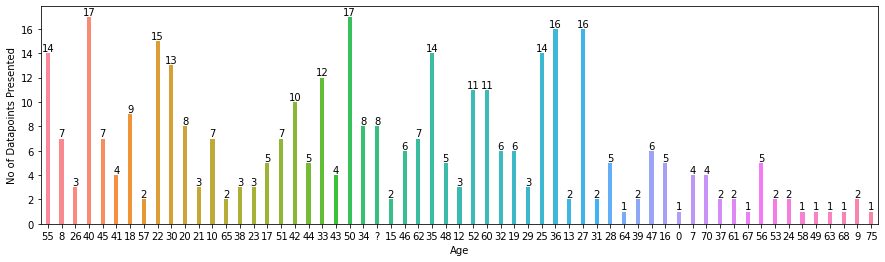

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x = "Age", data=data,saturation=1,width=0.3)

plt.ylabel("No of Datapoints Presented")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* The dataset includes patients with skin disorders in different age groups. Here top 5 highest number of patients.

* The age of 40 has the highest frequency of 17 patients, indicating a significant number of patients in this age range.
* The age of 50 also has 17 patients, suggesting a similar prevalence as the age of 40.
* The age of 36 has 16 patients, indicating a slightly lower frequency compared to ages 40 and 50.
* Both the ages of 27 and 22 have 16 and 15 patients, respectively, showing a relatively consistent occurrence in these age groups.


## 34. eosinophils in the infiltrate

Eosinophils in the infiltrate refer to the presence of eosinophils, a type of white blood cell, within the inflammatory infiltrate of the skin. Eosinophils are often involved in allergic reactions and certain inflammatory conditions. When eosinophils are present in the infiltrate, it can provide important information about the underlying pathology of the skin condition.

The presence of eosinophils in the infiltrate can be associated with several skin conditions, including:Eosinophilic cellulitis (Wells syndrome), Eosinophilic folliculitis, Drug-induced hypersensitivity reactions, Eosinophilic granulomatosis with polyangiitis (EGPA), Parasitic infections.

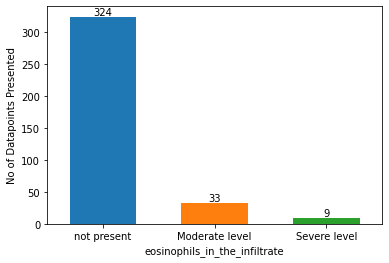

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "eosinophils_in_the_infiltrate", data=data,saturation=1,width=0.6)
labels = ["not present","Moderate level", "Severe level"]
plt.ylabel("No of Datapoints Presented")
plt.xticks(range(len(labels)), labels)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()  

## 35. CLASS

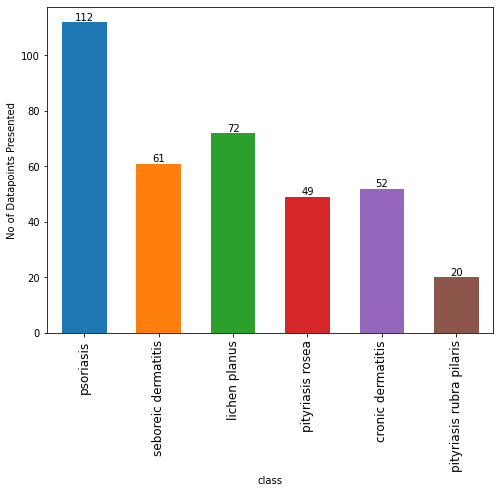

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "class", data=data,saturation=1,width=0.6)
labels = ["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"]
plt.ylabel("No of Datapoints Presented")
plt.xticks(range(len(labels)), labels,rotation=90,fontsize=12)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### Psoriasis

Psoriasis is a chronic autoimmune skin disorder that affects the life cycle of skin cells. It causes the cells to build up rapidly on the surface of the skin, resulting in thick, red patches covered with silvery scales. Psoriasis is a non-contagious condition that can vary in severity and may cause significant discomfort and impact the quality of life for those affected.

Here are some key aspects related to psoriasis:

* Causes: The exact cause of psoriasis is not fully understood, but it is believed to involve a combination of genetic and environmental factors. It is considered an autoimmune disorder, where the immune system mistakenly attacks healthy skin cells, triggering an inflammatory response.

* Symptoms: Psoriasis typically presents as raised, red patches of skin covered with silvery scales. The affected areas can be itchy, painful, and may crack or bleed. The most common areas affected are the elbows, knees, scalp, lower back, and nails. Psoriasis can also affect other parts of the body, including the palms, soles of the feet, face, and genitals.

* Types: There are several types of psoriasis, including plaque psoriasis (the most common form), guttate psoriasis, inverse psoriasis, pustular psoriasis, and erythrodermic psoriasis. Each type has specific characteristics and patterns of skin involvement.

* Triggers: Psoriasis can be triggered or worsened by certain factors, such as stress, infections (particularly streptococcal infections), injuries to the skin, hormonal changes, certain medications, smoking, and excessive alcohol consumption. Cold, dry weather and exposure to ultraviolet (UV) radiation from the sun or artificial sources can also impact psoriasis.

* Treatment: While there is no cure for psoriasis, various treatment options are available to manage and control symptoms. These include topical treatments (e.g., creams, ointments), phototherapy (light therapy), systemic medications (taken orally or by injection), and biologic drugs that target specific parts of the immune system. The choice of treatment depends on the severity of the condition and individual patient factors.

* Associated Conditions: Psoriasis is known to be associated with other health conditions, such as psoriatic arthritis (a type of inflammatory arthritis), cardiovascular disease, obesity, diabetes, metabolic syndrome, and certain types of cancers. Regular monitoring and management of these comorbidities are important for individuals with psoriasis.

It is crucial for individuals with psoriasis to work closely with healthcare professionals, particularly dermatologists, to develop a personalized treatment plan and manage the condition effectively. Ongoing research and advancements in understanding the underlying mechanisms of psoriasis continue to improve treatment options and quality of life for those affected by this chronic skin disorder.

### Seborrheic dermatitis

Seborrheic dermatitis is a common chronic skin disorder that primarily affects the scalp and other areas of the body with a high density of oil glands, such as the face, ears, and upper chest. It is characterized by red, inflamed skin, flaky scales, and itching. Seborrheic dermatitis can vary in severity and may occur in episodes, with periods of remission and flare-ups.

Here are some key aspects related to seborrheic dermatitis:

* Causes: The exact cause of seborrheic dermatitis is not fully understood, but it is believed to involve a combination of genetic, environmental, and hormonal factors. The overgrowth of a type of yeast called Malassezia on the skin is thought to contribute to the development of seborrheic dermatitis. Other factors that may play a role include oily skin, certain medical conditions (such as Parkinson's disease and HIV/AIDS), stress, and certain medications.

* Symptoms: Seborrheic dermatitis typically presents as red, greasy, and scaly patches on the scalp, eyebrows, around the nose, and behind the ears. It can also affect the creases of the nose, the chest, and the back. The affected areas may itch, and the scales may be yellowish or white. In infants, seborrheic dermatitis is commonly known as "cradle cap" and affects the scalp, causing crusty or oily patches.

* Triggers: Seborrheic dermatitis can be triggered or worsened by certain factors, such as changes in weather or humidity, stress, fatigue, oily skin, certain skincare or haircare products, and excessive sweating. It may also be associated with other skin conditions, such as acne and rosacea.

* Treatment: Although there is no cure for seborrheic dermatitis, various treatment options can help manage and control symptoms. Mild cases may improve with regular use of over-the-counter antifungal shampoos, topical corticosteroids, or medicated creams. In more severe or persistent cases, prescription-strength medications, such as antifungal creams, oral antifungal agents, or topical immunomodulators, may be prescribed.

* Self-care: In addition to medication, self-care measures can help manage seborrheic dermatitis. These include regular cleansing of the affected areas with gentle cleansers, avoiding harsh soaps and irritants, using non-comedogenic or non-oily skincare and haircare products, keeping the skin well-moisturized, and avoiding scratching or picking at the affected areas.

* Chronic condition: Seborrheic dermatitis is a chronic condition, and while it may improve with treatment, it can recur or persist over time. Therefore, long-term management and lifestyle modifications may be necessary to control symptoms and minimize flare-ups.

It is important to consult with a dermatologist or healthcare professional for an accurate diagnosis and appropriate treatment plan for seborrheic dermatitis. They can provide guidance on managing symptoms, preventing recurrence, and addressing any underlying contributing factors.

### Lichen planus

Lichen planus is a chronic inflammatory skin disorder that can affect various areas of the body, including the skin, mucous membranes, hair, and nails. It is characterized by the development of small, itchy, flat-topped bumps or lesions that can be purple, reddish, or brownish in color. Lichen planus is not contagious and usually not harmful, but it can cause discomfort and affect the quality of life.

Here are some key aspects related to lichen planus:

* Causes: The exact cause of lichen planus is not known, but it is believed to involve an autoimmune reaction, where the body's immune system mistakenly attacks its own tissues. Certain triggers, such as viral infections (hepatitis C), certain medications (nonsteroidal anti-inflammatory drugs, beta-blockers), allergens, and stress, may contribute to the development of lichen planus in susceptible individuals.

* Symptoms: Lichen planus typically presents as small, flat-topped bumps or lesions that may be shiny, itchy, and have a polygonal or angular shape. They often appear in clusters and can occur on the skin, most commonly on the wrists, ankles, lower back, and genital area. Lichen planus can also affect the mucous membranes, such as the mouth, tongue, gums, and genital area, leading to white, lacy patches, ulcers, or painful sores.

* Oral Lichen Planus: Oral lichen planus affects the mucous membranes of the mouth and can cause discomfort, burning sensations, and difficulty eating or speaking. It may appear as white patches, redness, or ulcerations on the gums, tongue, inner cheeks, and throat.

* Nail Lichen Planus: Lichen planus can also affect the nails, leading to ridges, grooves, pitting, and thinning. In severe cases, nail deformities and loss of the nail may occur.

* Diagnosis: Lichen planus is usually diagnosed based on the characteristic appearance of the lesions or affected areas. A biopsy may be performed to confirm the diagnosis and rule out other conditions with similar symptoms.

* Treatment: There is no cure for lichen planus, but treatment aims to alleviate symptoms, reduce inflammation, and prevent complications. Treatment options may include topical corticosteroids, oral medications (such as corticosteroids or antihistamines), light therapy (phototherapy), or immune-modulating medications. In cases where lichen planus affects the mucous membranes, topical or oral corticosteroids, mouth rinses, or other medications may be prescribed.

* Monitoring and Follow-up: Lichen planus is a chronic condition that can have periods of remission and flare-ups. Regular monitoring by a dermatologist or healthcare professional is important to assess the response to treatment, manage symptoms, and monitor for any potential complications or associated conditions.

It is crucial to consult with a healthcare professional or dermatologist for an accurate diagnosis and appropriate treatment plan for lichen planus. They can provide individualized guidance, prescribe medications if necessary, and offer support in managing the condition effectively.

### Pityriasis rosea

Pityriasis rosea is a common, self-limiting skin disorder that typically manifests as a rash. It is characterized by the development of oval-shaped, pink or reddish patches on the skin, followed by the appearance of smaller lesions in a pattern that resembles the branches of a tree. Pityriasis rosea is more common in young adults and usually resolves on its own within a few weeks to months.

Here are some key aspects related to pityriasis rosea:

1. Causes: The exact cause of pityriasis rosea is unknown, but it is believed to involve viral infections, particularly human herpesvirus 6 (HHV-6) and human herpesvirus 7 (HHV-7). However, the condition is not contagious and cannot be spread from person to person.

2. Symptoms: Pityriasis rosea often starts with a single large patch, known as the herald patch or mother patch, which is usually located on the trunk or abdomen. This patch is followed by the appearance of smaller patches or lesions that spread symmetrically on the body, forming a pattern called the Christmas tree distribution. The rash may be itchy, and some individuals may experience mild flu-like symptoms, such as fatigue, headache, and low-grade fever.

3. Diagnosis: Pityriasis rosea is usually diagnosed based on the characteristic appearance of the rash and the distribution pattern. In some cases, a skin biopsy may be performed to rule out other skin conditions with similar symptoms.

4. Treatment: Pityriasis rosea is generally a self-limiting condition that resolves without treatment. However, symptomatic relief may be achieved through the use of over-the-counter antihistamines or topical corticosteroids to alleviate itching and inflammation. It is important to avoid excessive scratching, as it can lead to skin irritation and potential secondary infections. In severe cases or when symptoms persist, a healthcare professional may recommend prescription-strength medications or light therapy.

5. Self-care and Management: While awaiting resolution of the rash, individuals with pityriasis rosea can practice self-care measures to manage symptoms and promote healing. These measures may include keeping the skin moisturized, avoiding hot water and harsh soaps, wearing loose-fitting clothing, and avoiding excessive sun exposure, which can exacerbate the rash.

6. Prognosis: Pityriasis rosea is generally a harmless condition that resolves spontaneously within a few weeks to months. Recurrences are rare, but they can occur in some cases. The condition does not typically leave lasting scars or marks on the skin.

If you suspect you have pityriasis rosea or are experiencing a rash, it is recommended to consult with a dermatologist or healthcare professional for an accurate diagnosis and appropriate management. They can provide further guidance, alleviate concerns, and address any specific needs or questions related to your condition.

### Chronic dermatitis

Chronic dermatitis, also known as chronic eczema or chronic inflammatory skin condition, refers to a long-lasting or recurring inflammation of the skin. It is characterized by persistent redness, itching, and dryness of the affected areas. Chronic dermatitis can have various causes and may present differently in individuals. Here is some information related to chronic dermatitis:

1. Types and Causes: Chronic dermatitis can be classified into different types based on the underlying cause. Some common types include atopic dermatitis (eczema), contact dermatitis (caused by contact with irritants or allergens), seborrheic dermatitis (affecting areas with a high density of oil glands), and nummular dermatitis (coin-shaped patches of inflamed skin). Other factors that can contribute to chronic dermatitis include genetic predisposition, immune system dysfunction, environmental factors, and skin barrier abnormalities.

2. Symptoms: The symptoms of chronic dermatitis can vary depending on the type and severity of the condition. Common symptoms include persistent itching, redness, dryness, scaling, flaking, and thickened skin. The affected areas may become rough, leathery, and prone to cracking or oozing. In some cases, chronic dermatitis may lead to complications such as skin infections or emotional distress due to the impact on daily life activities.

3. Triggers: Chronic dermatitis can be triggered or aggravated by various factors, including certain foods, airborne allergens, irritants (such as chemicals or detergents), temperature changes, humidity, stress, hormonal changes, and skin infections. Identifying and avoiding triggers is an essential part of managing chronic dermatitis.

4. Diagnosis: A diagnosis of chronic dermatitis is usually made based on a thorough medical history, physical examination, and sometimes additional tests. A dermatologist or healthcare professional may examine the affected skin, inquire about symptoms and triggers, and may recommend allergy testing or patch testing to identify specific allergens or irritants.

5. Treatment: The treatment of chronic dermatitis aims to manage symptoms, reduce inflammation, and prevent flare-ups. It often involves a combination of approaches, including:

   - Moisturizers: Regular application of moisturizers helps to hydrate the skin and improve its barrier function.

   - Topical Corticosteroids: These anti-inflammatory medications are commonly prescribed to reduce itching, redness, and inflammation during flare-ups.

   - Topical Calcineurin Inhibitors: These medications modulate the immune response and can be used as an alternative to corticosteroids, especially in sensitive areas.

   - Antihistamines: Oral antihistamines may be recommended to alleviate itching and promote better sleep.

   - Avoidance of Triggers: Identifying and avoiding triggers that worsen symptoms is crucial. This may involve changes in diet, skincare products, clothing, or environmental modifications.

   - Wet Dressings: Applying wet dressings or taking cool baths can help soothe the skin and alleviate itching.

   - Phototherapy: In some cases, controlled exposure to ultraviolet (UV) light under medical supervision may be beneficial.

   - Immunosuppressive Medications: In severe or refractory cases, systemic medications that suppress the immune system may be prescribed.

6. Lifestyle and Self-care: Managing chronic dermatitis involves adopting healthy skincare practices, such as using mild soaps or cleansers, avoiding excessive bathing or hot water, wearing soft and breathable fabrics, and maintaining a consistent skincare routine. It is also important to manage stress levels, maintain a balanced diet, and seek emotional support if needed.

7. Follow-up Care: Regular follow-up appointments with a dermatologist or healthcare professional are important to monitor the condition, adjust treatment if necessary, and address any concerns or questions.

It is crucial to consult with

 a healthcare professional or dermatologist for an accurate diagnosis, appropriate treatment, and personalized management plan for chronic dermatitis. They can provide guidance tailored to your specific condition and help improve symptoms, quality of life, and long-term skin health.

### Pityriasis rubra pilaris (PRP)

Pityriasis rubra pilaris (PRP) is a rare, chronic skin disorder that is characterized by the development of reddish-orange patches on the skin, rough and thickened skin, and the presence of small, raised bumps that resemble goosebumps. Here is some information related to pityriasis rubra pilaris:

1. Types: Pityriasis rubra pilaris can be classified into several types based on its clinical presentation and underlying causes. The types include:

   - Type I: Classic adult onset PRP
   - Type II: Atypical adult onset PRP
   - Type III: Classic juvenile onset PRP
   - Type IV: Circumscribed juvenile PRP
   - Type V: HIV-associated PRP

2. Causes: The exact cause of PRP is unknown, but it is believed to be a result of abnormalities in the immune system. It can occur sporadically (without any known cause) or be inherited in some cases. PRP has also been associated with certain infections, medications, or underlying conditions such as HIV.

3. Symptoms: The main symptoms of pityriasis rubra pilaris include:

   - Red or orange-colored patches on the skin, often starting at the extremities and spreading to other areas of the body.
   - Scaling and thickening of the skin, particularly on the palms and soles.
   - Small, raised bumps on the skin, particularly around hair follicles, resembling goosebumps.
   - Itching and discomfort, which can vary in intensity.
   - Nail abnormalities, such as thickening, ridges, or crumbling.

4. Progression and Course: Pityriasis rubra pilaris is a chronic condition that tends to progress in stages. The initial stage may involve the appearance of small, reddish bumps that eventually develop into larger patches. Over time, the skin becomes thickened, scaly, and may peel. The condition can wax and wane, with periods of improvement and exacerbation.

5. Diagnosis: Diagnosing pityriasis rubra pilaris typically involves a thorough medical history, physical examination, and sometimes additional tests. A dermatologist may examine the affected skin, inquire about symptoms and their progression, and may perform a skin biopsy to confirm the diagnosis. Other tests, such as blood tests or imaging studies, may be ordered to identify any underlying causes or associated conditions.

6. Treatment: There is no known cure for pityriasis rubra pilaris, and treatment focuses on managing symptoms and controlling the disease. Treatment options may include:

   - Topical therapies: Emollients, moisturizers, and keratolytic agents to reduce scaling and moisturize the skin.
   - Oral retinoids: Medications derived from vitamin A that help normalize skin cell growth and reduce inflammation.
   - Systemic immunosuppressive medications: In severe cases, medications that suppress the immune system may be prescribed to reduce inflammation.
   - Phototherapy: Controlled exposure to ultraviolet (UV) light may help improve symptoms and reduce inflammation.
   - Symptomatic relief: Itching and discomfort can be managed with antihistamines or topical corticosteroids.

7. Follow-up Care: Regular follow-up appointments with a dermatologist are essential to monitor the progression of the condition, adjust treatment as needed, and address any concerns or side effects of medications.

It is important to note that the management of pityriasis rubra pilaris should be tailored to each individual, and treatment options may vary based on the subtype of PRP and the specific needs of the patient. Consulting with a dermatologist is crucial for an accurate diagnosis and appropriate management plan.

## Bivariate analysis

The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. The diseases correspond to classes 1,2,3,4,5,6.

# **Clinical Evaluation:**

## 1. erythema & Target Classes

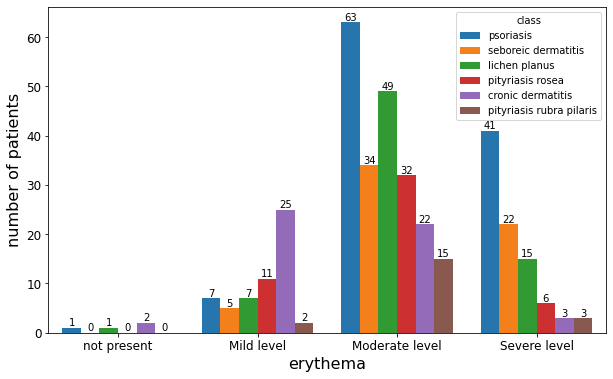

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="erythema", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("erythema",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, 1 patient does not show erythema ("not present" level), 7 patients have a mild level, 63 patients have a moderate level, and 41 patients have a severe level of erythema.

* Seborrheic dermatitis: For seborrheic dermatitis, no patients show erythema, 5 patients have a mild level, 34 patients have a moderate level, and 22 patients have a severe level of erythema.

* Lichen planus: Among patients with lichen planus, 1 patient does not show erythema, 7 patients have a mild level, 49 patients have a moderate level, and 15 patients have a severe level of erythema.

* Pityriasis rosea: Pityriasis rosea shows no patients without erythema, 11 patients have a mild level, 32 patients have a moderate level, and 6 patients have a severe level of erythema.

* Chronic dermatitis: Among patients with chronic dermatitis, 2 patients do not show erythema, 25 patients have a mild level, 22 patients have a moderate level, and 3 patients have a severe level of erythema.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, no patients do not have erythema, 2 patients have a mild level, 15 patients have a moderate level, and 3 patients have a severe level of erythema.

Based on these findings, it can be observed that moderate to severe levels of erythema are more commonly seen in patients with psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. However, the severity of erythema varies among different skin disorders, with psoriasis and lichen planus having a higher tendency for severe erythema compared to the other disorders.

## 2. scaling & Target Classes

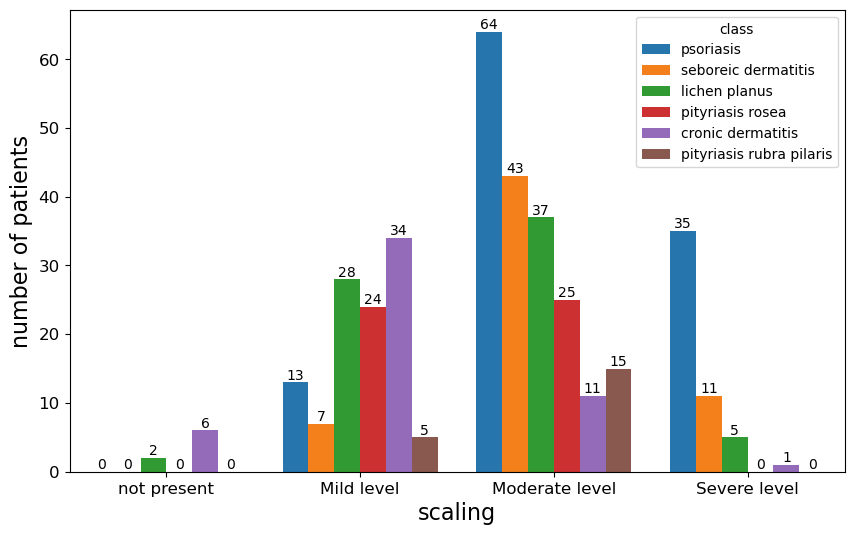

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="scaling", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("scaling",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, none of them have "not present" scaling, 13 patients have a mild level of scaling, 64 patients have a moderate level, and 35 patients have a severe level of scaling.

* Seborrheic dermatitis: For seborrheic dermatitis, none of the patients have "not present" scaling, 7 patients have a mild level, 43 patients have a moderate level, and 11 patients have a severe level of scaling.

* Lichen planus: Among patients with lichen planus, 2 patients do not have scaling, 28 patients have a mild level, 37 patients have a moderate level, and 5 patients have a severe level of scaling.

* Pityriasis rosea: Pityriasis rosea shows no patients without scaling, 24 patients have a mild level, 25 patients have a moderate level, and none of them have a severe level of scaling.

* Chronic dermatitis: Among patients with chronic dermatitis, 6 patients have "not present" scaling, 34 patients have a mild level, 11 patients have a moderate level, and 1 patient has a severe level of scaling.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, none of the patients have "not present" scaling, 5 patients have a mild level, 15 patients have a moderate level, and none of them have a severe level of scaling.

Based on these findings, it can be observed that moderate scaling is commonly seen in patients with psoriasis, seborrheic dermatitis, lichen planus, and pityriasis rosea. However, severe scaling is more prevalent in patients with psoriasis and seborrheic dermatitis. Chronic dermatitis and pityriasis rubra pilaris also show some degree of scaling, with chronic dermatitis having a higher tendency for mild scaling and pityriasis rubra pilaris having a higher tendency for mild to moderate scaling.

## 3. definite borders & Target Classes

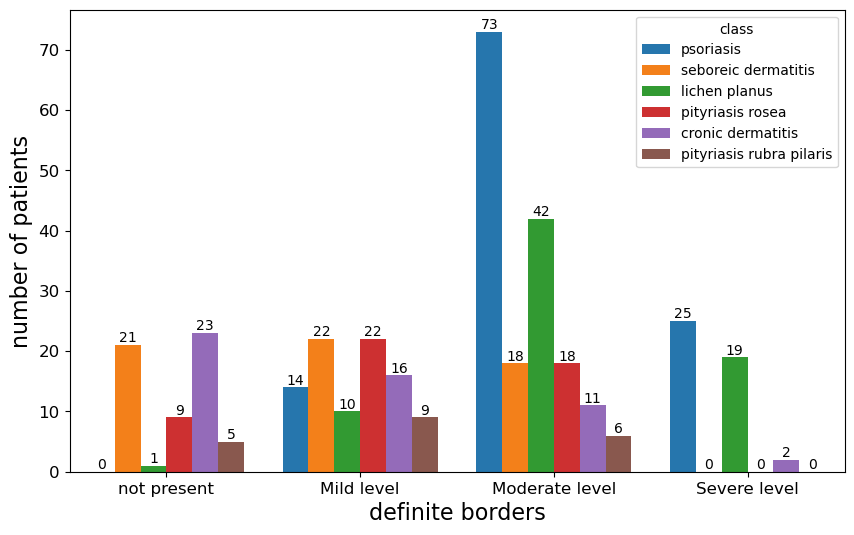

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="definite_borders", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("definite borders",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, none of them have "not present" definite borders, 14 patients have a mild level of definite borders, 73 patients have a moderate level, and 25 patients have a severe level of definite borders.

* Seborrheic dermatitis: For seborrheic dermatitis, 21 patients have "not present" definite borders, 22 patients have a mild level, 18 patients have a moderate level, and none of them have a severe level of definite borders.

* Lichen planus: Among patients with lichen planus, 1 patient does not have definite borders, 10 patients have a mild level, 42 patients have a moderate level, and 19 patients have a severe level of definite borders.

* Pityriasis rosea: Pityriasis rosea shows 9 patients without definite borders, 22 patients have a mild level, 18 patients have a moderate level, and none of them have a severe level of definite borders.

* Chronic dermatitis: Among patients with chronic dermatitis, 23 patients have "not present" definite borders, 16 patients have a mild level, 11 patients have a moderate level, and 2 patients have a severe level of definite borders.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 5 patients do not have definite borders, 9 patients have a mild level, 6 patients have a moderate level, and none of them have a severe level of definite borders.

Based on these findings, it can be observed that moderate definite borders are commonly seen in patients with psoriasis, seborrheic dermatitis, lichen planus, and pityriasis rosea. Psoriasis has a higher tendency for severe definite borders compared to other skin disorders. Seborrheic dermatitis and chronic dermatitis show a higher tendency for "not present" definite borders.

## 4. itching & Target Classes

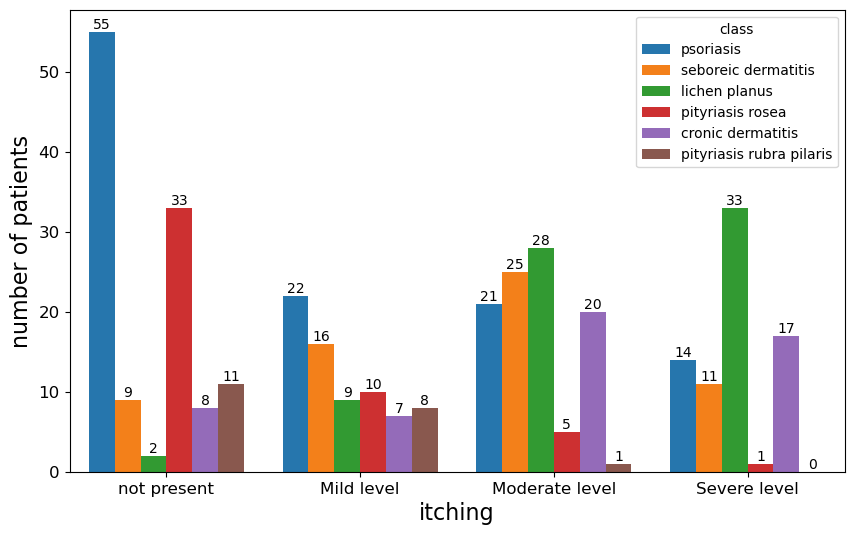

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="itching", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("itching",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, 55 patients do not experience itching, 22 patients have a mild level of itching, 21 patients have a moderate level of itching, and 14 patients have a severe level of itching.

* Seborrheic dermatitis: For seborrheic dermatitis, 9 patients do not experience itching, 16 patients have a mild level of itching, 25 patients have a moderate level of itching, and 11 patients have a severe level of itching.

* Lichen planus: Among patients with lichen planus, 2 patients do not experience itching, 9 patients have a mild level of itching, 28 patients have a moderate level of itching, and 33 patients have a severe level of itching.

* Pityriasis rosea: Pityriasis rosea shows 33 patients without itching, 10 patients have a mild level of itching, 5 patients have a moderate level of itching, and 1 patient has a severe level of itching.

* Chronic dermatitis: Among patients with chronic dermatitis, 8 patients do not experience itching, 7 patients have a mild level of itching, 20 patients have a moderate level of itching, and 17 patients have a severe level of itching.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 11 patients do not experience itching, 8 patients have a mild level of itching, 1 patient has a moderate level of itching, and none of them have a severe level of itching.

Based on these findings, it can be observed that itching is prevalent across all skin disorders, with varying levels of severity. Patients with lichen planus tend to experience a higher tendency of severe itching. Psoriasis, seborrheic dermatitis, and chronic dermatitis also show a moderate level of itching.

## 5. koebner_phenomenon & Target Classes

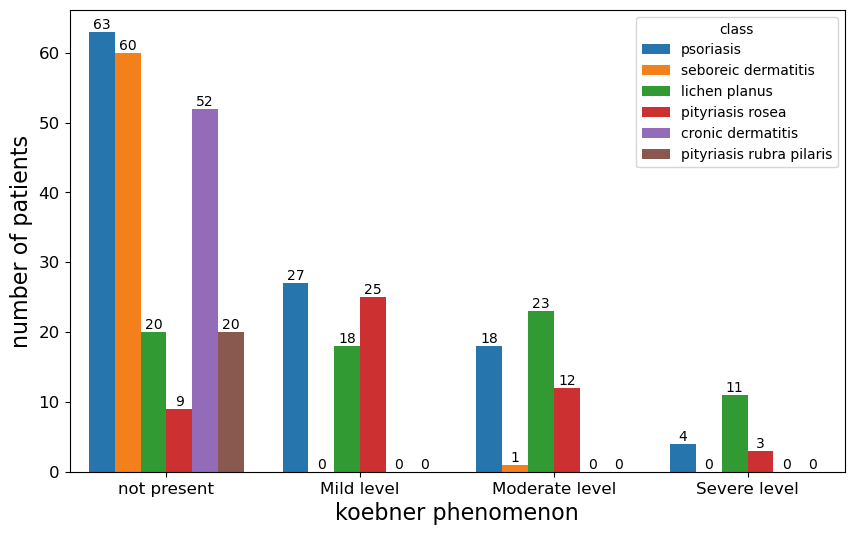

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="koebner_phenomenon", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("koebner phenomenon",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, 63 patients do not show the Koebner phenomenon, 27 patients have a mild level, 18 patients have a moderate level, and 4 patients have a severe level of the Koebner phenomenon.

* Seborrheic dermatitis: For seborrheic dermatitis, 60 patients do not exhibit the Koebner phenomenon, none of them have a mild level, 1 patient has a moderate level, and none of them have a severe level.

* Lichen planus: Among patients with lichen planus, 20 patients do not show the Koebner phenomenon, 18 patients have a mild level, 23 patients have a moderate level, and 11 patients have a severe level of the Koebner phenomenon.

* Pityriasis rosea: Pityriasis rosea shows 9 patients without the Koebner phenomenon, 25 patients have a mild level, 12 patients have a moderate level, and 3 patients have a severe level.

* Chronic dermatitis: Among patients with chronic dermatitis, 52 patients do not exhibit the Koebner phenomenon, none of them have a mild level, none of them have a moderate level, and none of them have a severe level.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 20 patients do not show the Koebner phenomenon, none of them have a mild level, none of them have a moderate level, and none of them have a severe level.

Based on these findings, it can be observed that the Koebner phenomenon is more commonly seen in patients with psoriasis, lichen planus, and pityriasis rosea. The majority of patients with seborrheic dermatitis and chronic dermatitis do not exhibit the Koebner phenomenon

## 6. polygonal papules & Target Classes

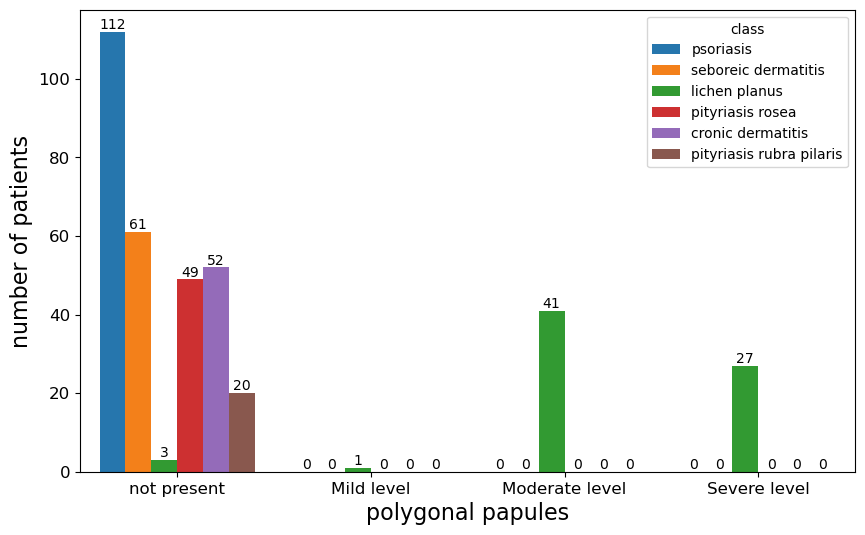

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="polygonal_papules", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("polygonal papules",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is mostly observed at the "not present" level for polygonal papules. There are no reported cases at the mild, moderate, or severe levels.

* Seborrheic Dermatitis: Seborrheic dermatitis is predominantly observed without polygonal papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Lichen Planus: Lichen planus shows a clear association with polygonal papules. The highest number of cases is observed at the severe level, followed by the moderate level. There are minimal cases at the mild level, and no cases reported at the "not present" level.

* Pityriasis Rosea: Pityriasis rosea is mostly observed without polygonal papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Chronic Dermatitis: Chronic dermatitis is predominantly observed without polygonal papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris is mostly observed without polygonal papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

Overall, the tendency of which levels are more associated with which classes varies among different skin disorders. Psoriasis, seborrheic dermatitis, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris are mostly observed without the presence of polygonal papules. Lichen planus, on the other hand, shows a strong association with the presence of polygonal papules, particularly at the moderate and severe levels.

## 7. follicular papules & Target Classes

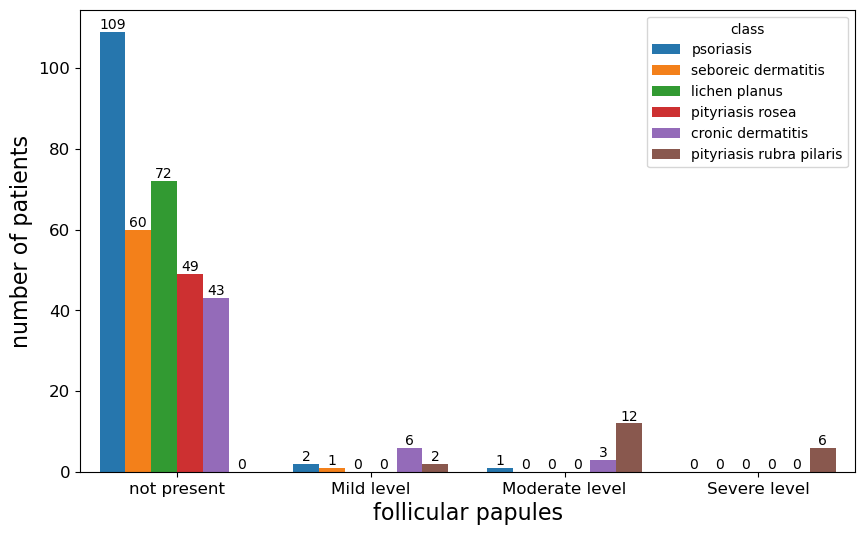

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="follicular_papules", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("follicular papules",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is predominantly observed without follicular papules, as the highest number of cases are recorded at the "not present" level. There are a few cases reported at the mild and moderate levels, while no cases are reported at the severe level.

* Seborrheic Dermatitis: Seborrheic dermatitis is mostly observed without follicular papules, as the highest number of cases are recorded at the "not present" level. There are a few cases reported at the mild level, while no cases are reported at the moderate or severe levels.

* Lichen Planus: Lichen planus is primarily observed without follicular papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Pityriasis Rosea: Pityriasis rosea is mostly observed without follicular papules, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Chronic Dermatitis: Chronic dermatitis shows a mixed association with follicular papules. The highest number of cases are observed at the mild level, followed by the moderate level. There are a few cases reported at the severe level.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris is primarily observed at the moderate level for follicular papules, with a significant number of cases reported at the severe level as well. There are no reported cases at the "not present" or mild levels.

Overall, for follicular papules varies among different skin disorders. Psoriasis and seborrheic dermatitis are mostly observed without the presence of follicular papules. Lichen planus and pityriasis rosea show a strong association with the absence of follicular papules. Chronic dermatitis exhibits a higher tendency for follicular papules at the mild and moderate levels. Pityriasis rubra pilaris is primarily associated with follicular papules at the moderate and severe levels.

## 8. oral mucosal involvement & Target Classes

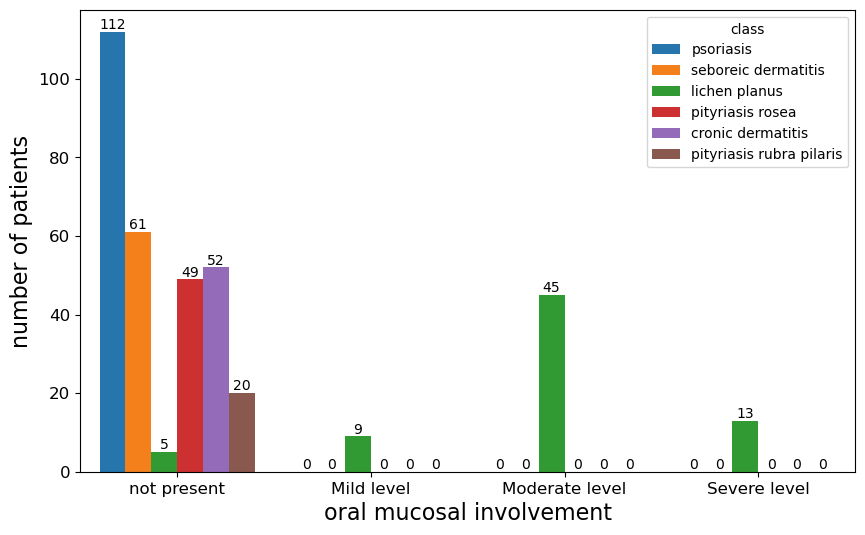

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="oral_mucosal_involvement", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("oral mucosal involvement",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is predominantly observed without oral mucosal involvement, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Seborrheic Dermatitis: Seborrheic dermatitis is mostly observed without oral mucosal involvement, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Lichen Planus: Lichen planus shows a strong association with oral mucosal involvement. The highest number of cases are observed at the moderate level, followed by the severe level. There are a few cases reported at the mild level, while no cases are reported at the "not present" level.

* Pityriasis Rosea: Pityriasis rosea is mostly observed without oral mucosal involvement, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Chronic Dermatitis: Chronic dermatitis is mostly observed without oral mucosal involvement, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris is mostly observed without oral mucosal involvement, as the highest number of cases are recorded at the "not present" level. There are no reported cases at the mild, moderate, or severe levels.

Overall, for oral mucosal involvement varies among different skin disorders. Psoriasis and seborrheic dermatitis are mostly observed without the presence of oral mucosal involvement. Lichen planus shows a strong association with oral mucosal involvement, particularly at the moderate and severe levels. Pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris are mostly observed without oral mucosal involvement at all levels.

## 9. knee and elbow involvement & Target Classes

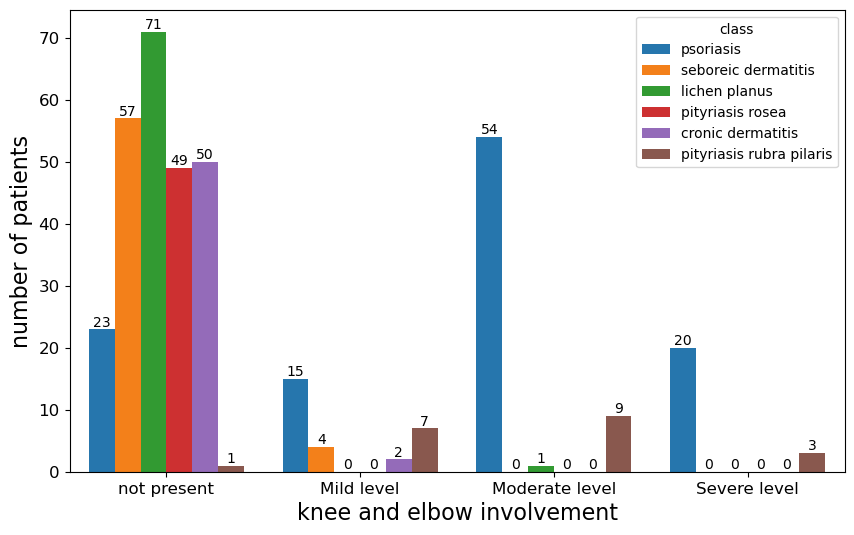

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="knee_and_elbow_involvement", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("knee and elbow involvement",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency for knee and elbow involvement, particularly at the moderate level. The highest number of cases are observed at the moderate level, followed by the severe level. There are also a significant number of cases at the mild level. Some cases are reported at the "not present" level.

* Seborrheic Dermatitis: Seborrheic dermatitis shows a relatively lower tendency for knee and elbow involvement. The majority of cases are reported at the "not present" level, indicating the absence of knee and elbow involvement. There are a few cases reported at the mild level, while no cases are reported at the moderate or severe levels.

* Lichen Planus: Lichen planus shows a minimal tendency for knee and elbow involvement. The highest number of cases are observed at the "not present" level, indicating the absence of knee and elbow involvement. There are very few cases reported at the moderate level, and only one case reported at the mild level. No cases are reported at the severe level.

* Pityriasis Rosea: Pityriasis rosea shows a minimal tendency for knee and elbow involvement. The majority of cases are reported at the "not present" level, indicating the absence of knee and elbow involvement. There are no reported cases at the mild, moderate, or severe levels.

* Chronic Dermatitis: Chronic dermatitis shows a minimal tendency for knee and elbow involvement. The majority of cases are reported at the "not present" level, indicating the absence of knee and elbow involvement. There are a few cases reported at the mild level, while no cases are reported at the moderate or severe levels.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris shows a moderate tendency for knee and elbow involvement. The highest number of cases are observed at the moderate level, followed by the mild level. There are a few cases reported at the severe level, while only one case is reported at the "not present" level.

Overall, for knee and elbow involvement varies among different skin disorders. Psoriasis and pityriasis rubra pilaris show a higher tendency for knee and elbow involvement, particularly at the moderate level. Seborrheic dermatitis, lichen planus, pityriasis rosea, and chronic dermatitis show a minimal tendency for knee and elbow involvement, with the majority of cases reported at the "not present" level.

## 10. scalp involvement & Target Classes

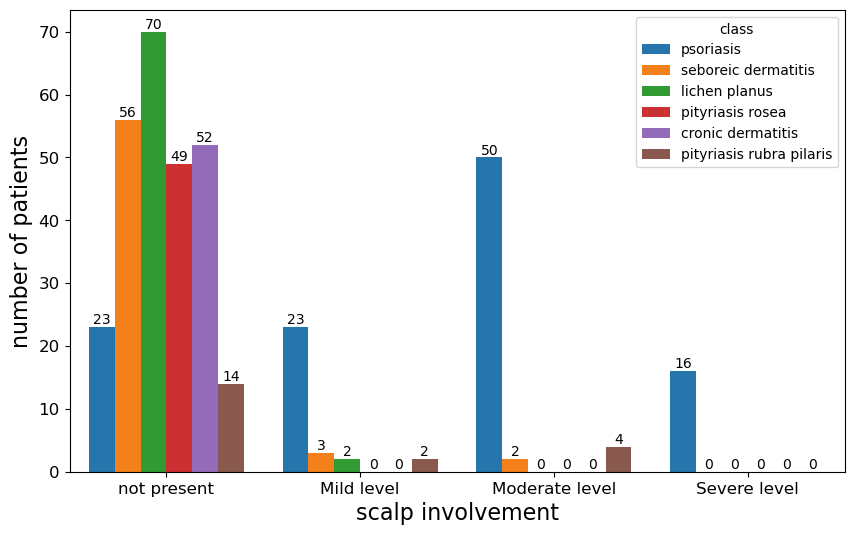

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="scalp_involvement", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("scalp involvement",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency for scalp involvement. The highest number of cases are observed at the moderate level, indicating significant scalp involvement. There are also a considerable number of cases at the severe level, suggesting severe scalp involvement. Moderate scalp involvement is also observed at the mild level. Some cases are reported at the "not present" level, indicating the absence of scalp involvement.

* Seborrheic Dermatitis: Seborrheic dermatitis shows a moderate tendency for scalp involvement. The highest number of cases are observed at the mild level, indicating mild scalp involvement. There are a few cases reported at the moderate and severe levels, suggesting moderate to severe scalp involvement. The majority of cases are reported at the "not present" level, indicating the absence of scalp involvement.

* Lichen Planus: Lichen planus shows a minimal tendency for scalp involvement. The highest number of cases are observed at the "not present" level, indicating the absence of scalp involvement. There are a few cases reported at the mild level, suggesting mild scalp involvement. No cases are reported at the moderate or severe levels.

* Pityriasis Rosea: Pityriasis rosea shows a minimal tendency for scalp involvement. The majority of cases are reported at the "not present" level, indicating the absence of scalp involvement. There are no reported cases at the mild, moderate, or severe levels.

* Chronic Dermatitis: Chronic dermatitis shows a minimal tendency for scalp involvement. The majority of cases are reported at the "not present" level, indicating the absence of scalp involvement. There are no reported cases at the mild, moderate, or severe levels.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris shows a moderate tendency for scalp involvement. The highest number of cases are observed at the moderate level, suggesting significant scalp involvement. There are a few cases reported at the mild level, indicating mild scalp involvement. Some cases are also reported at the severe level, indicating severe scalp involvement. There are a few cases reported at the "not present" level.

Overall,  for scalp involvement varies among different skin disorders. Psoriasis and pityriasis rubra pilaris show a higher tendency for scalp involvement, particularly at the moderate level. Seborrheic dermatitis shows a moderate tendency for scalp involvement, primarily at the mild level. Lichen planus, pityriasis rosea, and chronic dermatitis show a minimal tendency for scalp involvement, with the majority of cases reported at the "not present" level.

## 11. family history & Target Classes

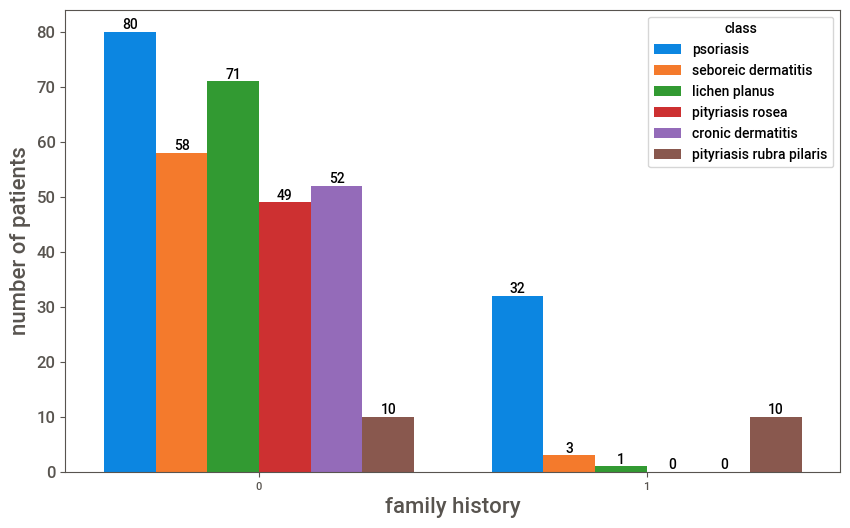

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="family_history", hue="class",saturation=0.9, width=0.8)
label = ["NO","YES"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("family history",fontsize=16)
#plt.xticks(range(len(labels)),label,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Overall, for a family history varies among different skin disorders. Psoriasis shows a higher tendency for a positive family history, indicating a potential genetic predisposition. Seborrheic dermatitis, lichen planus, and chronic dermatitis show a minimal tendency for a positive family history. Pityriasis rosea shows no apparent association with a family history, and pityriasis rubra pilaris suggests some potential association.

# Histopathological Evaluation:

## 12. melanin incontinence & Target Classes

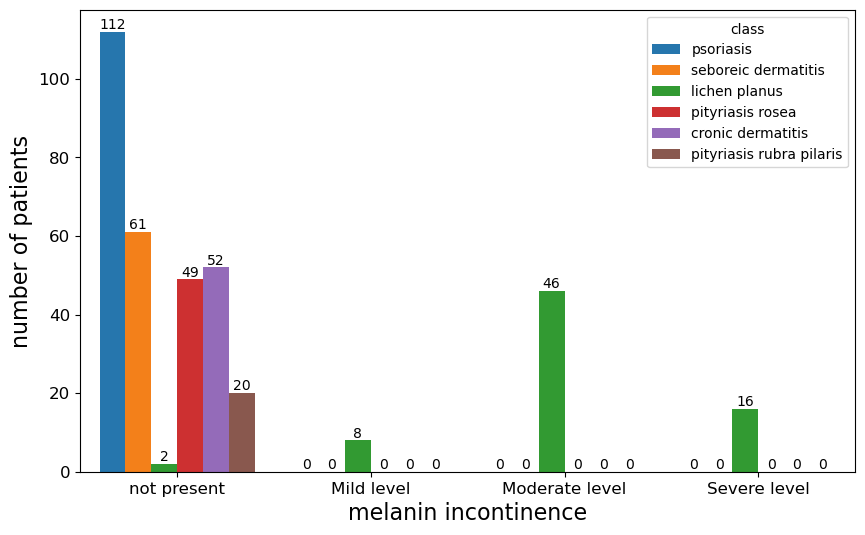

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="melanin_incontinence", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("melanin incontinence",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is predominantly associated with the absence of melanin incontinence. The majority of cases in the dataset (112 out of 112) have no melanin incontinence, indicating that this feature is not commonly observed in psoriasis patients.

* Seborrheic Dermatitis: Seborrheic dermatitis shows no reported cases of melanin incontinence. All cases in the dataset (61 out of 61) have no melanin incontinence, suggesting that this feature is not present in seborrheic dermatitis patients.

* Lichen Planus: Lichen planus exhibits a varying degree of melanin incontinence. The number of cases with no melanin incontinence (not present) is 2, while there are 8 cases with mild levels, 46 cases with moderate levels, and 16 cases with severe levels of melanin incontinence. This indicates that lichen planus patients may show melanin incontinence, particularly in moderate and severe cases.

* Pityriasis Rosea: Pityriasis rosea shows no reported cases of melanin incontinence. All cases in the dataset (49 out of 49) have no melanin incontinence, suggesting the absence of this feature in pityriasis rosea patients.

* Chronic Dermatitis: Chronic dermatitis shows no reported cases of melanin incontinence. All cases in the dataset (52 out of 52) have no melanin incontinence, indicating the absence of this feature in chronic dermatitis patients.

* Pityriasis Rubra Pilaris: Pityriasis rubra pilaris shows no reported cases of melanin incontinence. All cases in the dataset (20 out of 20) have no melanin incontinence, indicating the absence of this feature in pityriasis rubra pilaris patients.

Overall, for a melanin incontinence varies among different skin disorders., psoriasis and seborrheic dermatitis do not exhibit melanin incontinence, while lichen planus may show varying levels of melanin incontinence. Pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris also do not typically show melanin incontinence.

## 13. eosinophils in the infiltrate & Target Classes

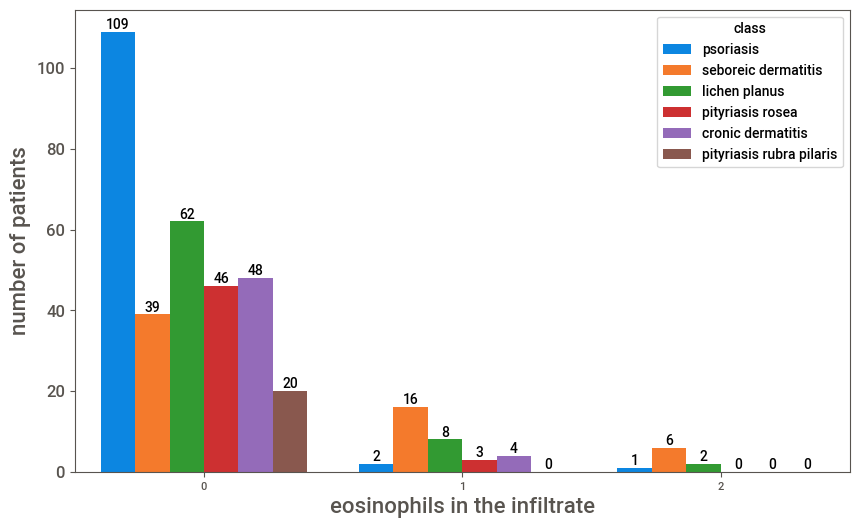

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="eosinophils_in_the_infiltrate", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present","Moderate level", "Severe level"]

plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("eosinophils in the infiltrate",fontsize=16)
#plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among the patients with psoriasis, the majority (109 out of 112) do not have eosinophils in the infiltrate. Only 2 patients show a moderate level, and 1 patient shows a severe level of eosinophils.

* Seborrheic Dermatitis: In seborrheic dermatitis patients, 39 do not have eosinophils in the infiltrate, while 16 patients have a moderate level and 6 patients have a severe level of eosinophils.

* Lichen Planus: Most patients with lichen planus (62 out of 72) do not exhibit eosinophils in the infiltrate. However, 8 patients show a moderate level, and 2 patients show a severe level of eosinophils.

* Pityriasis Rosea: The majority of pityriasis rosea patients (46 out of 49) do not have eosinophils in the infiltrate. Three patients have a moderate level of eosinophils, and there are no patients with a severe level.

* Chronic Dermatitis: Similar to psoriasis, the majority of chronic dermatitis patients (48 out of 52) do not show eosinophils in the infiltrate. Four patients have a moderate level of eosinophils, and there are no patients with a severe level.

* Pityriasis Rubra Pilaris: All reported patients with pityriasis rubra pilaris (20 out of 20) do not have eosinophils in the infiltrate.

Overall, for a eosinophils in the infiltrate varies among different skin disorders,  the majority of patients with psoriasis, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris do not exhibit eosinophils in the infiltrate. Seborrheic dermatitis and lichen planus may show varying levels of eosinophils, with seborrheic dermatitis having a higher tendency for eosinophilic infiltrate compared to lichen planus.

## 14. PNL infiltrate & Target Classes

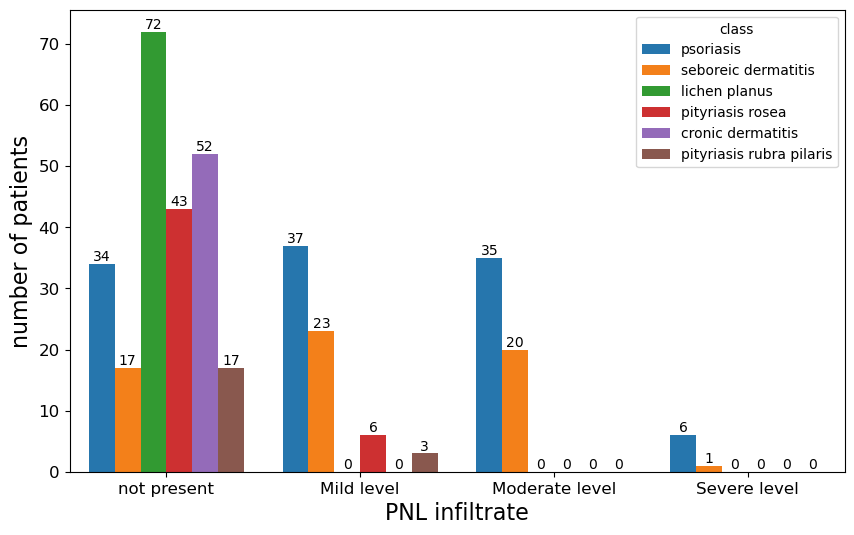

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="PNL_infiltrate", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("PNL infiltrate",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, the mild level of PNL infiltrate has the highest association. It is followed by the moderate and not present levels, while the severe level has the lowest association.

* Seborrheic dermatitis: For seborrheic dermatitis, the mild level of PNL infiltrate is the most common, followed by the moderate level. The not present and severe levels have relatively lower associations.

* Lichen planus: Lichen planus shows a high association with the not present level of PNL infiltrate, while the mild, moderate, and severe levels have no reported associations.

* Pityriasis rosea: Among patients with pityriasis rosea, the mild level of PNL infiltrate is the most associated, while the moderate and severe levels have no reported associations.

* Chronic dermatitis: Chronic dermatitis is predominantly associated with the not present level of PNL infiltrate, while the mild, moderate, and severe levels have no reported associations.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris is primarily associated with the mild level of PNL infiltrate, while the moderate, severe, and not present levels have no reported associations.

## 15. fibrosis of the papillary dermis & Target Classes

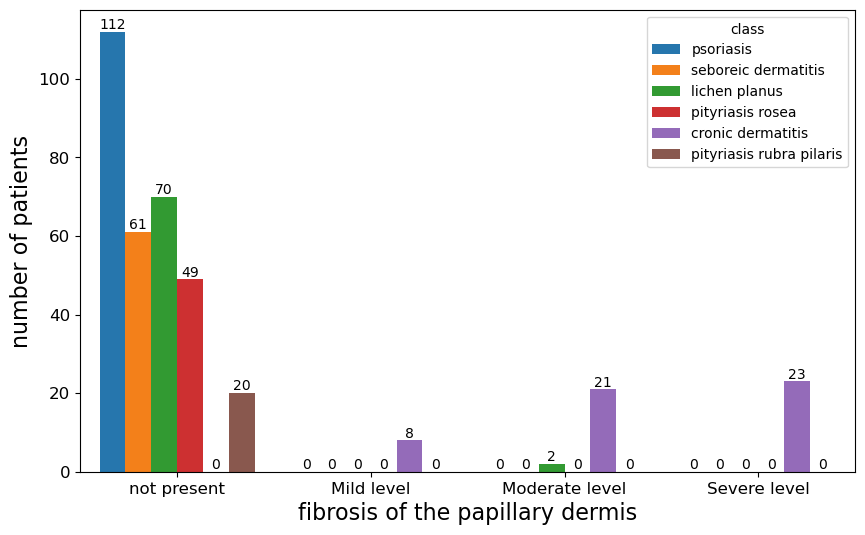

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="fibrosis_of_the_papillary_dermis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("fibrosis of the papillary dermis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is associated with the "not present" level of fibrosis of the papillary dermis. There are no reported cases of psoriasis associated with the mild, moderate, or severe levels.

* Seborrheic dermatitis: Seborrheic dermatitis is also predominantly associated with the "not present" level of fibrosis of the papillary dermis. There are no reported cases of seborrheic dermatitis associated with the mild, moderate, or severe levels.

* Lichen planus: Lichen planus shows a tendency to be associated with the moderate level of fibrosis of the papillary dermis. There are very few reported cases associated with the "not present" and severe levels, and no reported cases associated with the mild level.

* Pityriasis rosea: Pityriasis rosea is primarily associated with the "not present" level of fibrosis of the papillary dermis. There are no reported cases associated with the mild, moderate, or severe levels.

* Chronic dermatitis: Chronic dermatitis shows a higher tendency to be associated with the moderate and severe levels of fibrosis of the papillary dermis. There are some reported cases associated with the mild level, but none associated with the "not present" level.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris is primarily associated with the "not present" level of fibrosis of the papillary dermis. There are no reported cases associated with the mild, moderate, or severe levels.

## 16. exocytosis & Target Classes

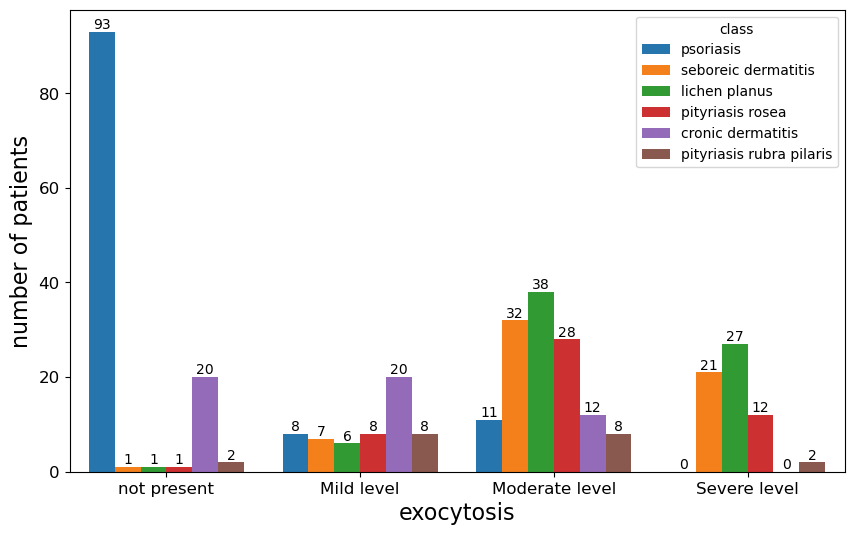

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="exocytosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("exocytosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis is more strongly associated with the presence of exocytosis. The majority of cases (93) are reported to have exocytosis present. There are a few cases with mild (8) and moderate (11) levels of exocytosis, but no reported cases with severe exocytosis.

* Seborrheic dermatitis: Seborrheic dermatitis shows a higher tendency to be associated with the moderate level of exocytosis. There are some cases with mild (7) and severe (21) levels, but the majority of cases (32) are reported with moderate exocytosis. Only one case is reported with no exocytosis present.

* Lichen planus: Lichen planus also demonstrates a higher tendency to be associated with the moderate level of exocytosis. There are cases with mild (6) and severe (27) levels, but the majority of cases (38) are reported with moderate exocytosis. Only one case is reported with no exocytosis present.

* Pityriasis rosea: Pityriasis rosea shows a similar pattern to seborrheic dermatitis and lichen planus, with a higher tendency for moderate exocytosis. There are cases with mild (8) and severe (12) levels, but the majority of cases (28) are reported with moderate exocytosis. Only one case is reported with no exocytosis present.

* Chronic dermatitis: Chronic dermatitis demonstrates a more balanced distribution across the levels of exocytosis. There are cases with mild (20) and moderate (12) levels, and some cases with no exocytosis present. However, there are no reported cases of severe exocytosis in chronic dermatitis.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows a relatively even distribution across the levels of exocytosis, with cases reported in all levels. However, the majority of cases fall into the mild (8) and moderate (8) levels. There are a few cases with no exocytosis present and a small number of cases with severe exocytosis.



## 17. acanthosis & Target Classes

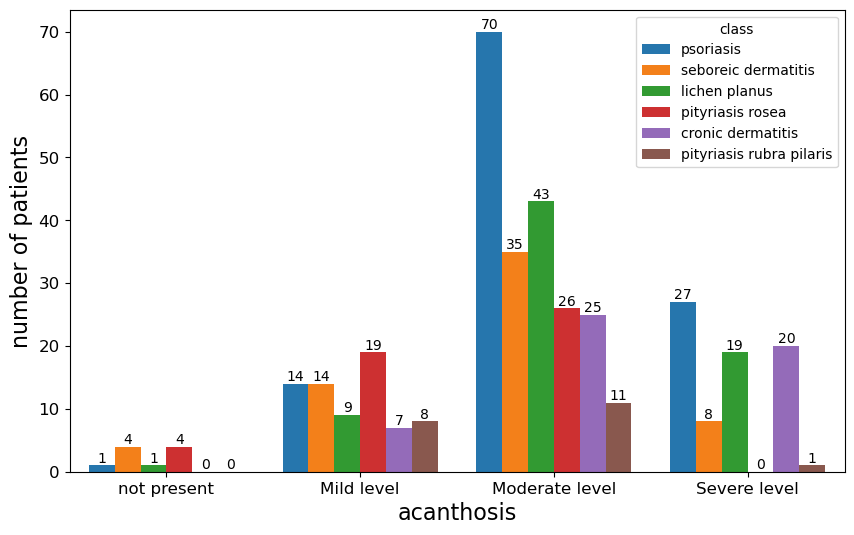

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="acanthosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("acanthosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with moderate and severe levels of acanthosis. The majority of cases (70) exhibit moderate acanthosis, followed by severe acanthosis (27). There are also cases with mild acanthosis (14), but only one case is reported with no acanthosis present.

* Seborrheic dermatitis: Seborrheic dermatitis demonstrates a relatively balanced distribution across the levels of acanthosis. There are cases with mild (14), moderate (35), and severe (8) levels of acanthosis. Only a few cases are reported with no acanthosis present (4).

* Lichen planus: Lichen planus shows a higher tendency to be associated with moderate and severe levels of acanthosis. The majority of cases (43) exhibit moderate acanthosis, followed by severe acanthosis (19). There are also cases with mild acanthosis (9), but only one case is reported with no acanthosis present.

* Pityriasis rosea: Pityriasis rosea demonstrates a higher tendency to be associated with mild and moderate levels of acanthosis. The majority of cases (26) exhibit moderate acanthosis, followed by mild acanthosis (19). There are no reported cases of severe acanthosis, but a small number of cases have no acanthosis present (4).

* Chronic dermatitis: Chronic dermatitis shows a relatively balanced distribution across the levels of acanthosis. There are cases with mild (7), moderate (25), and severe (20) levels of acanthosis. There are no reported cases of no acanthosis present.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris demonstrates a higher tendency to be associated with mild and moderate levels of acanthosis. The majority of cases (11) exhibit moderate acanthosis, followed by mild acanthosis (8). There are only a few cases with severe acanthosis (1), and no reported cases of no acanthosis present.

## 18. hyperkeratosis & Target Classes

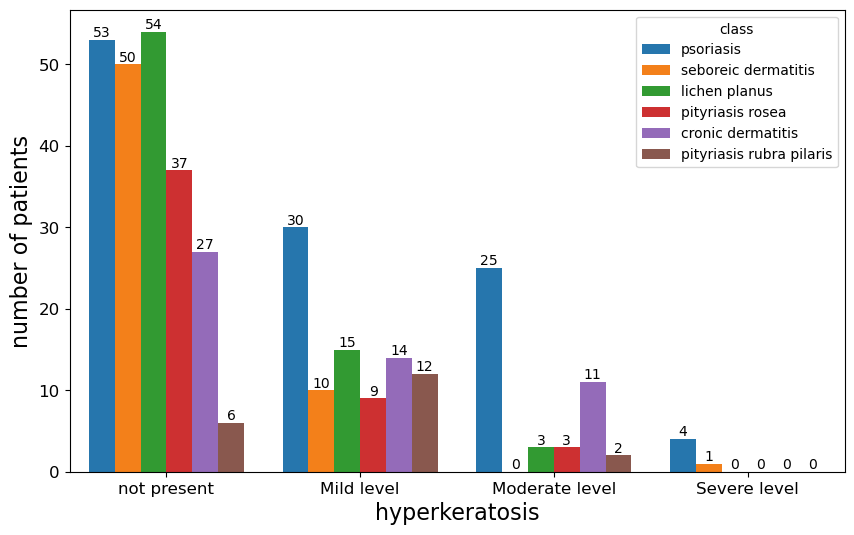

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="hyperkeratosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("hyperkeratosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with mild and moderate levels of hyperkeratosis. The majority of cases (30) exhibit mild hyperkeratosis, followed by moderate hyperkeratosis (25). There are also cases with no hyperkeratosis present (53), and a small number of cases with severe hyperkeratosis (4).

* Seborrheic dermatitis: Seborrheic dermatitis shows a higher tendency to be associated with mild levels of hyperkeratosis. The majority of cases (10) exhibit mild hyperkeratosis. There are cases with no hyperkeratosis present (50), and only one case with severe hyperkeratosis (1). There are no reported cases of moderate hyperkeratosis.

* Lichen planus: Lichen planus shows a higher tendency to be associated with mild levels of hyperkeratosis. The majority of cases (15) exhibit mild hyperkeratosis. There are cases with no hyperkeratosis present (54), and a small number of cases with moderate hyperkeratosis (3). There are no reported cases of severe hyperkeratosis.

* Pityriasis rosea: Pityriasis rosea shows a higher tendency to be associated with mild levels of hyperkeratosis. The majority of cases (9) exhibit mild hyperkeratosis. There are cases with no hyperkeratosis present (37), and a small number of cases with moderate hyperkeratosis (3). There are no reported cases of severe hyperkeratosis.

* Chronic dermatitis: Chronic dermatitis shows a relatively balanced distribution across the levels of hyperkeratosis. There are cases with no hyperkeratosis present (27), mild hyperkeratosis (14), and moderate hyperkeratosis (11). There are no reported cases of severe hyperkeratosis.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows a higher tendency to be associated with mild levels of hyperkeratosis. The majority of cases (12) exhibit mild hyperkeratosis. There are cases with no hyperkeratosis present (6), and a small number of cases with moderate hyperkeratosis (2). There are no reported cases of severe hyperkeratosis

## 19. parakeratosis & Target Classes

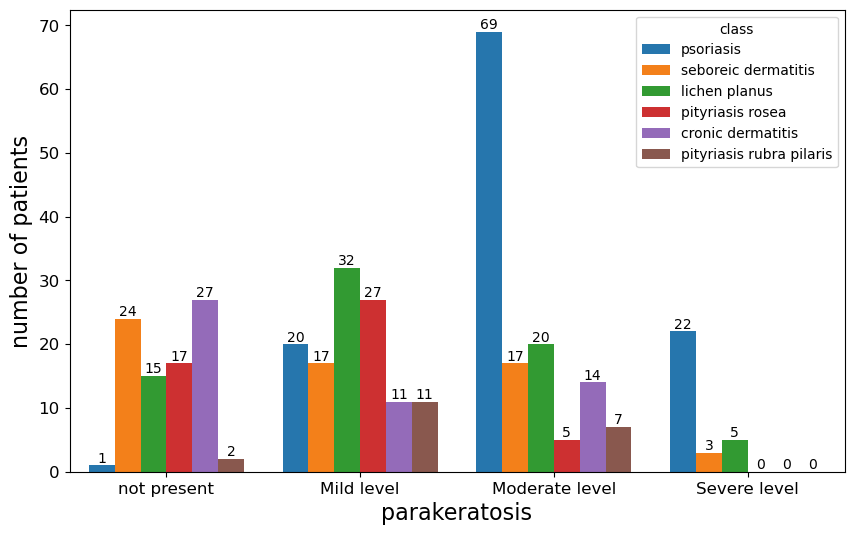

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="parakeratosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("parakeratosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with moderate and severe levels of parakeratosis. The majority of cases (69) exhibit moderate parakeratosis, followed by severe parakeratosis (22). There are also cases with mild parakeratosis (20), and a small number of cases with no parakeratosis present (1).

* Seborrheic dermatitis: Seborrheic dermatitis shows a relatively balanced distribution across the levels of parakeratosis. There are cases with no parakeratosis present (24), mild parakeratosis (17), moderate parakeratosis (17), and a few cases with severe parakeratosis (3).

* Lichen planus: Lichen planus shows a higher tendency to be associated with mild and moderate levels of parakeratosis. The majority of cases (32) exhibit mild parakeratosis, followed by moderate parakeratosis (20). There are cases with no parakeratosis present (15), and a small number of cases with severe parakeratosis (5).

* Pityriasis rosea: Pityriasis rosea shows a higher tendency to be associated with mild and moderate levels of parakeratosis. The majority of cases (27) exhibit mild parakeratosis, followed by moderate parakeratosis (5). There are cases with no parakeratosis present (17), and no reported cases of severe parakeratosis.

* Chronic dermatitis: Chronic dermatitis shows a relatively balanced distribution across the levels of parakeratosis. There are cases with no parakeratosis present (27), mild parakeratosis (11), and moderate parakeratosis (14). There are no reported cases of severe parakeratosis.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows a higher tendency to be associated with mild levels of parakeratosis. The majority of cases (11) exhibit mild parakeratosis. There are cases with no parakeratosis present (2), and a small number of cases with moderate parakeratosis (7). There are no reported cases of severe parakeratosis.

## 20. clubbing of the rete ridges & Target Classes

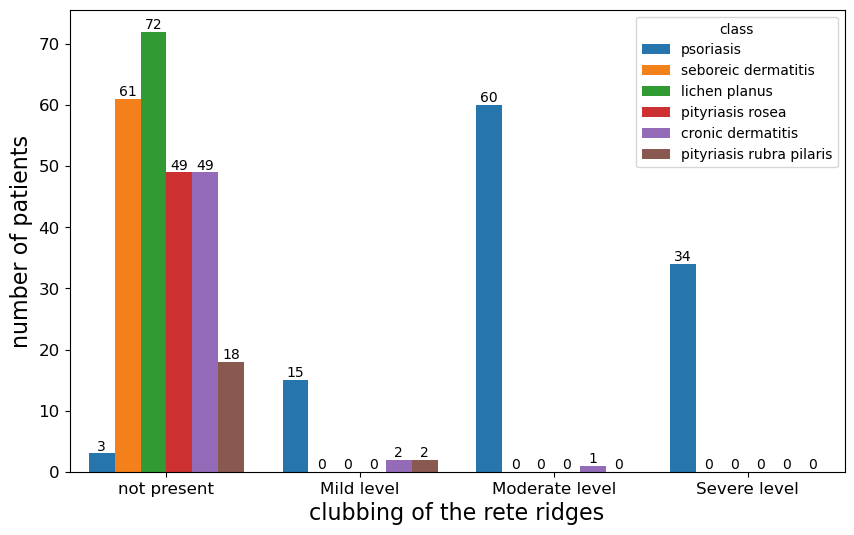

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="clubbing_of_the_rete_ridges", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("clubbing of the rete ridges",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with moderate and severe levels of clubbing of the rete ridges. The majority of cases (60) exhibit moderate clubbing, followed by severe clubbing (34). There are also cases with mild clubbing (15), and a few cases with no clubbing present (3).

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows no clubbing of the rete ridges, as indicated by the high count (61) in the "not present" category. There are no reported cases of mild, moderate, or severe clubbing.

* Lichen planus: Lichen planus also predominantly shows no clubbing of the rete ridges, as indicated by the high count (72) in the "not present" category. There are no reported cases of mild, moderate, or severe clubbing.

* Pityriasis rosea: Pityriasis rosea predominantly shows no clubbing of the rete ridges, as indicated by the high count (49) in the "not present" category. There are no reported cases of mild, moderate, or severe clubbing.

* Chronic dermatitis: Chronic dermatitis shows a relatively balanced distribution across the levels of clubbing of the rete ridges. There are cases with no clubbing present (49), mild clubbing (2), and a single case with moderate clubbing (1). There are no reported cases of severe clubbing.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows a higher tendency to be associated with mild levels of clubbing of the rete ridges. The majority of cases (18) exhibit mild clubbing. There are cases with no clubbing present (2), and no reported cases of moderate or severe clubbing.

## 21. elongation of the rete ridges & Target Classes

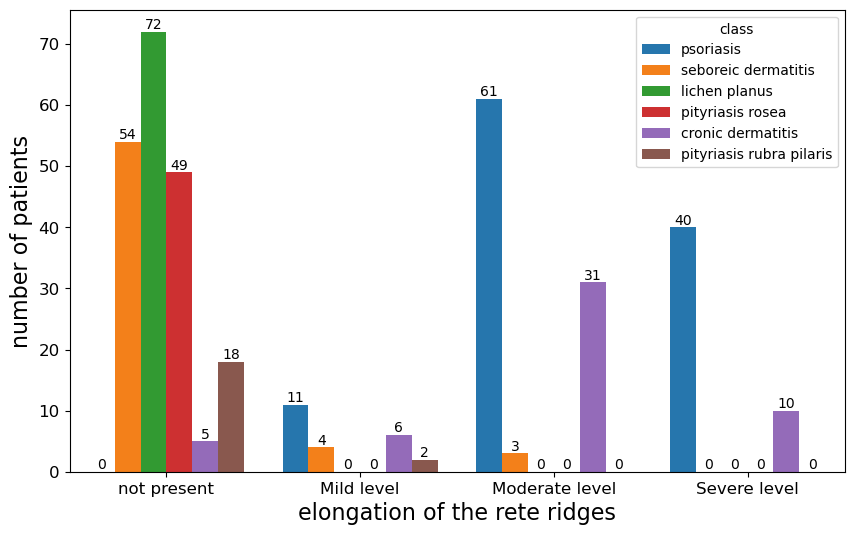

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="elongation_of_the_rete_ridges", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("elongation of the rete ridges",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with moderate and severe levels of elongation of the rete ridges. The majority of cases (61) exhibit moderate elongation, followed by severe elongation (40). There are also cases with mild elongation (11), and no reported cases of no elongation.

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows no elongation of the rete ridges, as indicated by the high count (54) in the "not present" category. There are a few cases with mild elongation (4), and even fewer cases with moderate (3) or severe elongation (0).

* Lichen planus: Lichen planus predominantly shows no elongation of the rete ridges, as indicated by the high count (72) in the "not present" category. There are no reported cases of mild, moderate, or severe elongation.

* Pityriasis rosea: Pityriasis rosea predominantly shows no elongation of the rete ridges, as indicated by the high count (49) in the "not present" category. There are no reported cases of mild, moderate, or severe elongation.

* Chronic dermatitis: Chronic dermatitis shows a varied distribution across the levels of elongation of the rete ridges. There are cases with no elongation present (5), mild elongation (6), moderate elongation (31), and a few cases with severe elongation (10).

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows a higher tendency to be associated with mild levels of elongation of the rete ridges. The majority of cases (18) exhibit mild elongation. There are cases with no elongation present (2), and no reported cases of moderate or severe elongation.

## 22. thinning of the suprapapillary epidermis & Target Classes

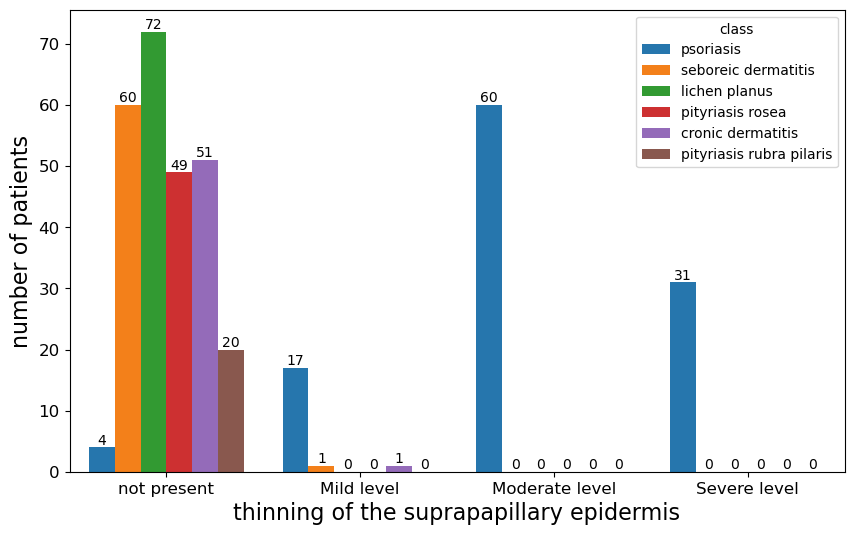

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="thinning_of_the_suprapapillary_epidermis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("thinning of the suprapapillary epidermis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with moderate and severe levels of thinning of the suprapapillary epidermis. The majority of cases (60) exhibit moderate thinning, followed by severe thinning (31). There are also cases with mild thinning (17), and a small number of cases with no thinning present (4).

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows no thinning of the suprapapillary epidermis, as indicated by the high count (60) in the "not present" category. There is only one reported case with mild thinning, and no reported cases of moderate or severe thinning.

* Lichen planus: Lichen planus predominantly shows no thinning of the suprapapillary epidermis, as indicated by the high count (72) in the "not present" category. There are no reported cases of mild, moderate, or severe thinning.

* Pityriasis rosea: Pityriasis rosea predominantly shows no thinning of the suprapapillary epidermis, as indicated by the high count (49) in the "not present" category. There are no reported cases of mild, moderate, or severe thinning.

* Chronic dermatitis: Chronic dermatitis shows a varied distribution across the levels of thinning of the suprapapillary epidermis. There are cases with no thinning present (51), as well as a single case with mild thinning. There are no reported cases of moderate or severe thinning.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows no thinning of the suprapapillary epidermis, as indicated by the count of 20 in the "not present" category. There are no reported cases of mild, moderate, or severe thinning.

## 23. spongiform pustule & Target Classes

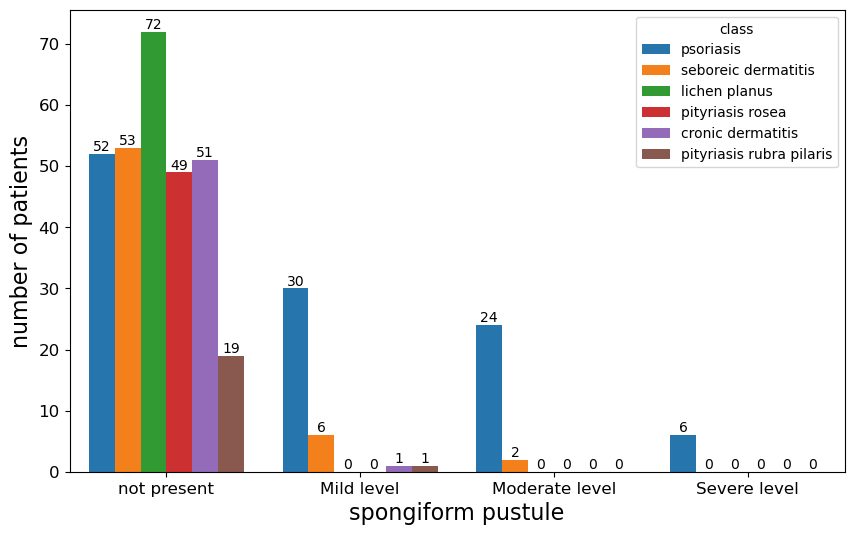

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="spongiform_pustule", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("spongiform pustule",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with mild and moderate levels of spongiform pustule. The majority of cases (30) exhibit mild spongiform pustule, followed by moderate (24) and severe (6) levels. There are also cases with no spongiform pustule present (52).

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows no spongiform pustule, as indicated by the high count (53) in the "not present" category. There are a few reported cases with mild (6) and moderate (2) levels of spongiform pustule, but no reported cases of severe pustule.

* Lichen planus: Lichen planus predominantly shows no spongiform pustule, as indicated by the high count (72) in the "not present" category. There are no reported cases of mild, moderate, or severe pustule.

* Pityriasis rosea: Pityriasis rosea predominantly shows no spongiform pustule, as indicated by the high count (49) in the "not present" category. There are no reported cases of mild, moderate, or severe pustule.

* Chronic dermatitis: Chronic dermatitis shows a varied distribution across the levels of spongiform pustule. There are cases with no pustule present (51), as well as a single case with mild pustule. There are no reported cases of moderate or severe pustule.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows no spongiform pustule, as indicated by the count of 19 in the "not present" category. There is a single reported case with mild pustule, but no reported cases of moderate or severe pustule.

## 24. munro microabcess & Target Classes

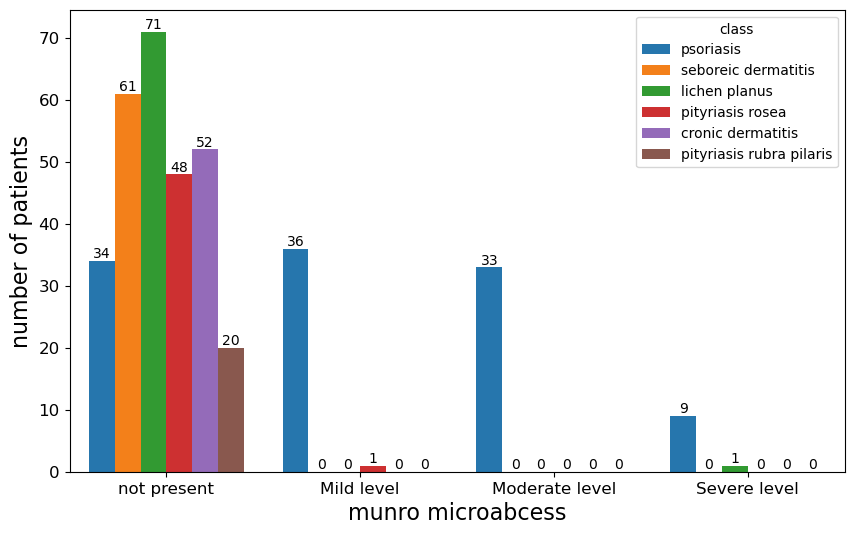

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="munro_microabcess", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("munro microabcess",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to be associated with mild and moderate levels of Munro microabscess. The majority of cases (36) exhibit mild microabscess, followed by moderate (33) and severe (9) levels. There are also cases with no microabscess present (34).

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows no Munro microabscess, as indicated by the high count (61) in the "not present" category. There are no reported cases of mild, moderate, or severe microabscess.

* Lichen planus: Lichen planus predominantly shows no Munro microabscess, as indicated by the high count (71) in the "not present" category. There is a single reported case with a severe microabscess, but no reported cases of mild or moderate microabscess.

* Pityriasis rosea: Pityriasis rosea shows a higher tendency to be associated with mild levels of Munro microabscess. There is one reported case with a mild microabscess, but no reported cases of moderate or severe microabscess. The majority of cases (48) show no microabscess present.

* Chronic dermatitis: Chronic dermatitis shows no Munro microabscess, as indicated by the count of 52 in the "not present" category. There are no reported cases of mild, moderate, or severe microabscess.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows no Munro microabscess, as indicated by the count of 20 in the "not present" category. There are no reported cases of mild, moderate, or severe microabscess

## 25. focal hypergranulosis & Target Classes

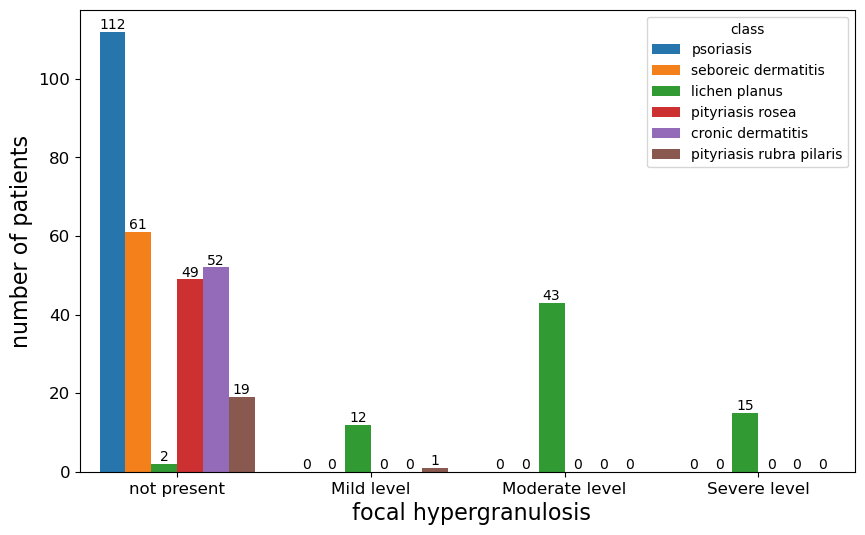

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="focal_hypergranulosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel(" focal hypergranulosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis predominantly shows no focal hypergranulosis, as indicated by the count of 112 in the "not present" category. There are no reported cases of mild, moderate, or severe focal hypergranulosis.

* Seborrheic dermatitis: Seborrheic dermatitis also predominantly shows no focal hypergranulosis, as indicated by the count of 61 in the "not present" category. There are no reported cases of mild, moderate, or severe focal hypergranulosis.

* Lichen planus: Lichen planus shows a higher tendency to be associated with moderate focal hypergranulosis. The majority of cases (43) exhibit moderate hypergranulosis, followed by mild (12) and severe (15) levels. There are also a few cases (2) with no focal hypergranulosis present.

* Pityriasis rosea: Pityriasis rosea shows no focal hypergranulosis, as indicated by the count of 49 in the "not present" category. There are no reported cases of mild, moderate, or severe focal hypergranulosis.

* Chronic dermatitis: Chronic dermatitis shows no focal hypergranulosis, as indicated by the count of 52 in the "not present" category. There are no reported cases of mild, moderate, or severe focal hypergranulosis.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris shows no focal hypergranulosis, as indicated by the count of 19 in the "not present" category. There are no reported cases of mild, moderate, or severe focal hypergranulosis.

## 26. disappearance of the granular layer & Target Classes

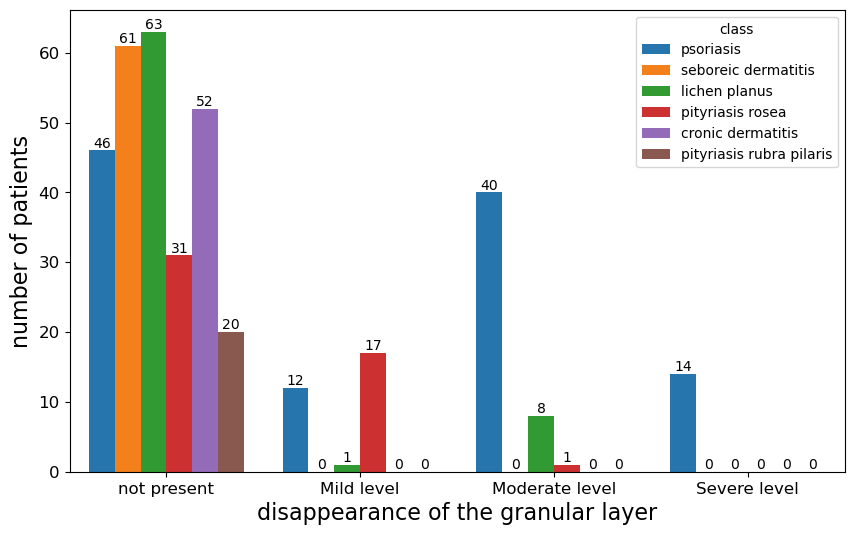

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="disappearance_of_the_granular_layer", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("disappearance of the granular layer",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to have a mild or moderate level of disappearance of the granular layer. The majority of cases (40) exhibit a moderate level, followed by mild (12) and severe (14) levels. There are also some cases (46) where the granular layer is not present.

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows the granular layer as not present, as indicated by the count of 61 in the "not present" category. There are no reported cases of mild, moderate, or severe disappearance of the granular layer.

* Lichen planus: Lichen planus shows a higher tendency to have the granular layer not present. The majority of cases (63) exhibit no disappearance of the granular layer, followed by mild (1) and moderate (8) levels. There are no reported cases of severe disappearance of the granular layer.

* Pityriasis rosea: Pityriasis rosea shows varying levels of disappearance of the granular layer. The majority of cases (31) exhibit the granular layer not present, followed by mild (17) and moderate (1) levels. There are no reported cases of severe disappearance of the granular layer.

* Chronic dermatitis: Chronic dermatitis predominantly shows the granular layer as not present, as indicated by the count of 52 in the "not present" category. There are no reported cases of mild, moderate, or severe disappearance of the granular layer.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris predominantly shows the granular layer as not present, as indicated by the count of 20 in the "not present" category. There are no reported cases of mild, moderate, or severe disappearance of the granular layer.

## 27. vacuolisation and damage of basal layer & Target Classes

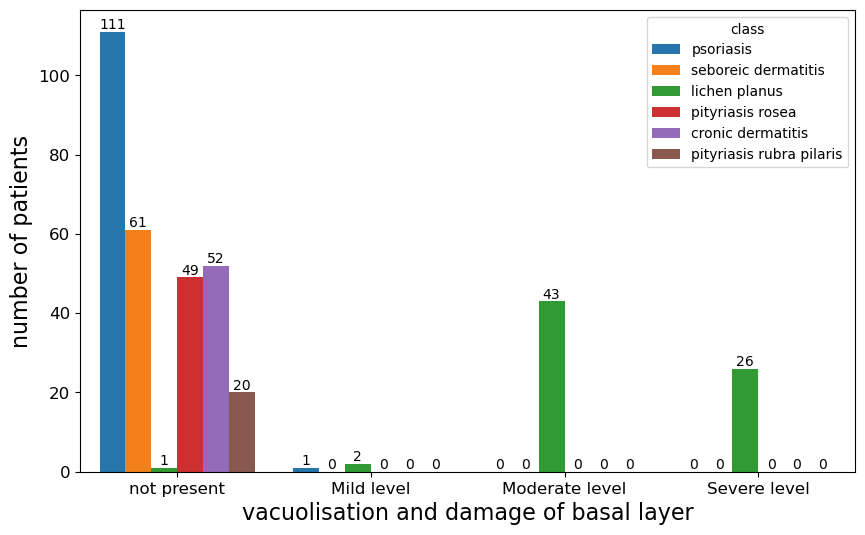

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="vacuolisation_and_damage_of_basal_layer", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("vacuolisation and damage of basal layer",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Psoriasis shows a higher tendency to have the basal layer without vacuolization and damage, as indicated by the count of 111 in the "not present" category. There is only one reported case with a mild level of vacuolization and damage, and no cases of moderate or severe levels.

* Seborrheic dermatitis: Seborrheic dermatitis predominantly shows the basal layer without vacuolization and damage, as indicated by the count of 61 in the "not present" category. There are no reported cases of mild, moderate, or severe vacuolization and damage.

* Lichen planus: Lichen planus shows a higher tendency to have a moderate or severe level of vacuolization and damage of the basal layer. The majority of cases (43) exhibit a moderate level, followed by severe (26) and mild (2) levels. There is also one reported case where the basal layer is without vacuolization and damage.

* Pityriasis rosea: Pityriasis rosea predominantly shows the basal layer without vacuolization and damage, as indicated by the count of 49 in the "not present" category. There are no reported cases of mild, moderate, or severe vacuolization and damage.

* Chronic dermatitis: Chronic dermatitis predominantly shows the basal layer without vacuolization and damage, as indicated by the count of 52 in the "not present" category. There are no reported cases of mild, moderate, or severe vacuolization and damage.

* Pityriasis rubra pilaris: Pityriasis rubra pilaris predominantly shows the basal layer without vacuolization and damage, as indicated by the count of 20 in the "not present" category. There are no reported cases of mild, moderate, or severe vacuolization and damage.

## 28. spongiosis & Target Classes

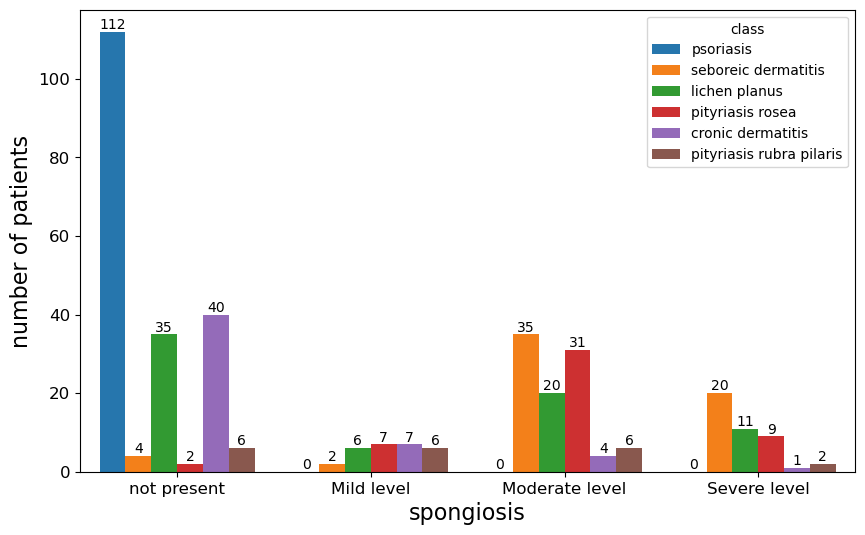

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="spongiosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("spongiosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among the patients with psoriasis, all 112 patients do not show spongiosis ("not present" level), and there are no patients with mild, moderate, or severe spongiosis.

* Seborrheic dermatitis: For seborrheic dermatitis, there are 4 patients with mild spongiosis, 2 patients with moderate spongiosis, 35 patients with moderate spongiosis, and 20 patients with severe spongiosis. Additionally, there are 4 patients without spongiosis.

* Lichen planus: In the case of lichen planus, there are 35 patients without spongiosis, 6 patients with mild spongiosis, 20 patients with moderate spongiosis, and 11 patients with severe spongiosis.

* Pityriasis rosea: Pityriasis rosea shows 2 patients without spongiosis, 7 patients with mild spongiosis, 31 patients with moderate spongiosis, and 9 patients with severe spongiosis.

* Chronic dermatitis: Among patients with chronic dermatitis, there are 40 patients without spongiosis, 7 patients with mild spongiosis, 4 patients with moderate spongiosis, and 1 patient with severe spongiosis.

* Pityriasis rubra pilaris: For pityriasis rubra pilaris, there are 6 patients without spongiosis, 6 patients with mild spongiosis, 6 patients with moderate spongiosis, and 2 patients with severe spongiosis.

## 29. saw tooth appearance of retes & Target Classes

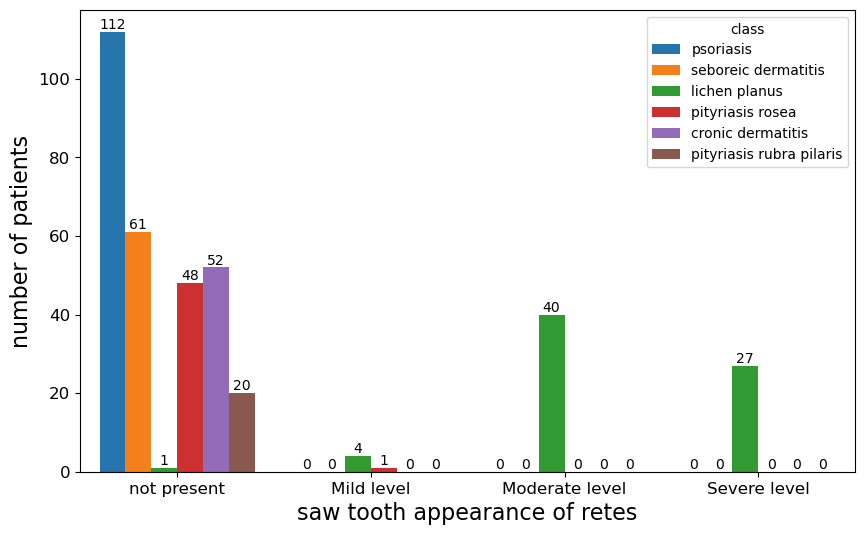

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="saw-tooth_appearance_of_retes", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("saw tooth appearance of retes",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: All 112 patients with psoriasis do not show a saw tooth appearance of retes ("not present" level). There are no patients with mild, moderate, or severe saw tooth appearance.

* Seborrheic dermatitis: Among patients with seborrheic dermatitis, all 61 patients do not exhibit a saw tooth appearance of retes. There are no patients with mild, moderate, or severe levels.

* Lichen planus: For lichen planus, there is 1 patient without a saw tooth appearance, 4 patients with mild saw tooth appearance, 40 patients with moderate saw tooth appearance, and 27 patients with severe saw tooth appearance.

* Pityriasis rosea: Pityriasis rosea shows 48 patients without a saw tooth appearance, 1 patient with mild saw tooth appearance, and no patients with moderate or severe levels.

* Chronic dermatitis: Among patients with chronic dermatitis, all 52 patients do not exhibit a saw tooth appearance of retes. There are no patients with mild, moderate, or severe levels.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, all 20 patients do not show a saw tooth appearance of retes. There are no patients with mild, moderate, or severe levels.

Based on these findings, it can be observed that the presence of a saw tooth appearance of retes is primarily associated with lichen planus, with varying degrees of severity. Other skin disorders in the dataset, such as psoriasis, seborrheic dermatitis, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris, do not show a significant tendency towards this feature.

## 30. follicular horn plug & Target Classes

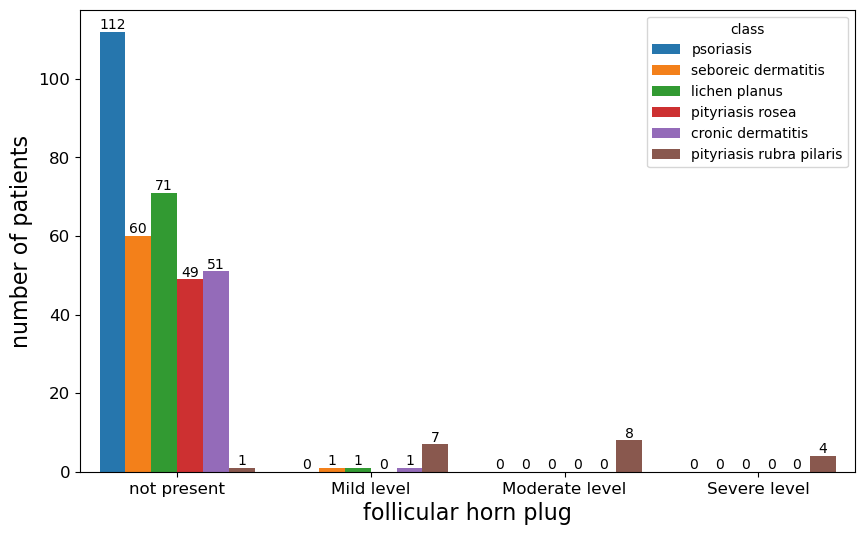

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="follicular_horn_plug", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("follicular horn plug",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: All 112 patients with psoriasis do not show a follicular horn plug ("not present" level). There are no patients with mild, moderate, or severe levels.

* Seborrheic dermatitis: Among patients with seborrheic dermatitis, 60 patients do not exhibit a follicular horn plug, 1 patient has a mild level, and there are no patients with moderate or severe levels.

* Lichen planus: For lichen planus, 71 patients do not show a follicular horn plug, 1 patient has a mild level, and there are no patients with moderate or severe levels.

* Pityriasis rosea: Pityriasis rosea shows 49 patients without a follicular horn plug, and there are no patients with mild, moderate, or severe levels.

* Chronic dermatitis: Among patients with chronic dermatitis, 51 patients do not exhibit a follicular horn plug, 1 patient has a mild level, and there are no patients with moderate or severe levels.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 1 patient does not show a follicular horn plug, 7 patients have a mild level, 8 patients have a moderate level, and 4 patients have a severe level.

Based on these findings, it can be observed that the presence of a follicular horn plug is primarily associated with pityriasis rubra pilaris, with varying degrees of severity. Other skin disorders in the dataset, such as psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, and chronic dermatitis, do not show a significant tendency towards this feature.

## 31. perifollicular parakeratosis & Target Classes

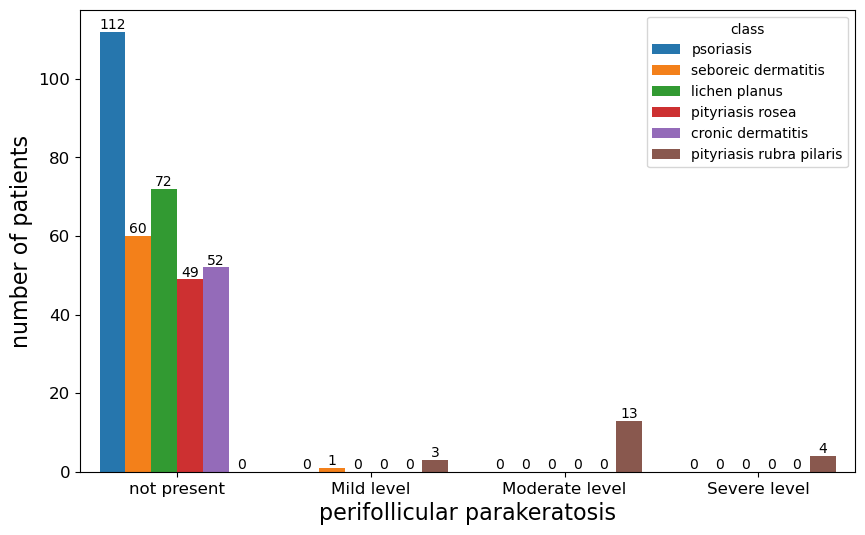

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="perifollicular_parakeratosis", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("perifollicular parakeratosis",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: All 112 patients with psoriasis do not show perifollicular parakeratosis ("not present" level). There are no patients with mild, moderate, or severe levels.

* Seborrheic dermatitis: Among patients with seborrheic dermatitis, 60 patients do not exhibit perifollicular parakeratosis, 1 patient has a mild level, and there are no patients with moderate or severe levels.

* Lichen planus: For lichen planus, all 72 patients do not show perifollicular parakeratosis ("not present" level). There are no patients with mild, moderate, or severe levels.

* Pityriasis rosea: Pityriasis rosea shows 49 patients without perifollicular parakeratosis, and there are no patients with mild, moderate, or severe levels.

* Chronic dermatitis: Among patients with chronic dermatitis, all 52 patients do not exhibit perifollicular parakeratosis ("not present" level). There are no patients with mild, moderate, or severe levels.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, no patients have perifollicular parakeratosis in the "not present" level. 3 patients have a mild level, 13 patients have a moderate level, and 4 patients have a severe level.

Based on these findings, it can be observed that perifollicular parakeratosis is primarily associated with pityriasis rubra pilaris, with varying degrees of severity. Other skin disorders in the dataset, such as psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, and chronic dermatitis, do not show a significant tendency towards this feature.

## 32. inflammatory monoluclear inflitrate & Target Classes

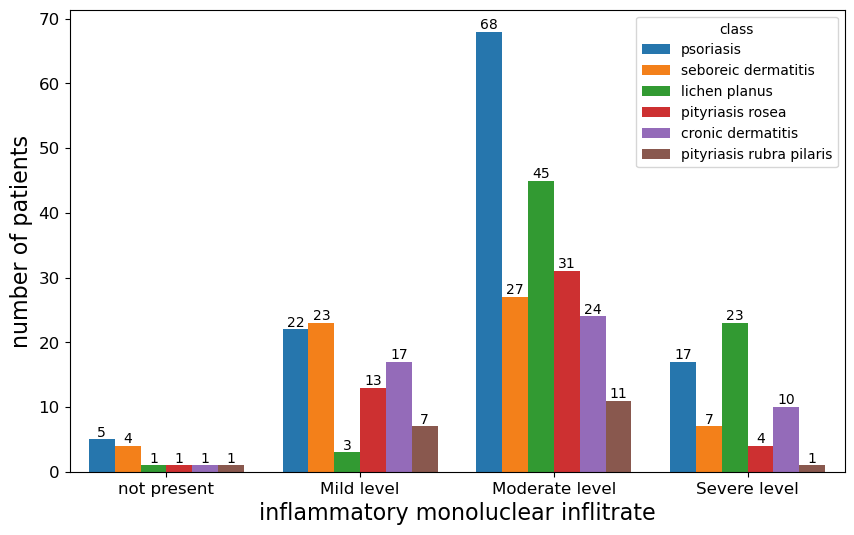

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="inflammatory_monoluclear_inflitrate", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("inflammatory monoluclear inflitrate",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, 5 patients do not show inflammatory mononuclear infiltrate ("not present" level), 22 patients have a mild level, 68 patients have a moderate level, and 17 patients have a severe level.

* Seborrheic dermatitis: For seborrheic dermatitis, 4 patients do not exhibit inflammatory mononuclear infiltrate, 23 patients have a mild level, 27 patients have a moderate level, and 1 patient has a severe level.

* Lichen planus: Among patients with lichen planus, 1 patient does not show inflammatory mononuclear infiltrate, 3 patients have a mild level, 45 patients have a moderate level, and 23 patients have a severe level.

* Pityriasis rosea: Pityriasis rosea shows 1 patient without inflammatory mononuclear infiltrate, 13 patients with a mild level, 31 patients with a moderate level, and 4 patients with a severe level.

* Chronic dermatitis: Among patients with chronic dermatitis, 1 patient does not exhibit inflammatory mononuclear infiltrate, 17 patients have a mild level, 24 patients have a moderate level, and 10 patients have a severe level.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 1 patient does not have inflammatory mononuclear infiltrate, 7 patients have a mild level, 11 patients have a moderate level, and 1 patient has a severe level.

Based on these findings, it can be observed that inflammatory mononuclear infiltrate is more pronounced in psoriasis and lichen planus, with moderate to severe levels being more common. Seborrheic dermatitis, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris also show varying levels of inflammatory mononuclear infiltrate, but to a lesser extent compared to psoriasis and lichen planus.

## 33. band like infiltrate & Target Classes

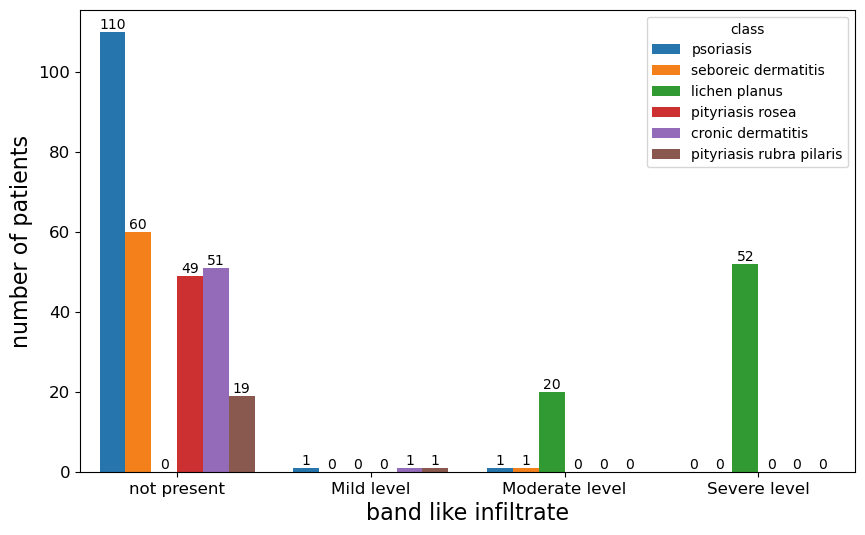

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x="band-like_infiltrate", hue="class",saturation=0.9, width=0.8)
labels_features = ["not present", "Mild level","Moderate level", "Severe level"]
plt.legend(title='class', labels=["psoriasis","seboreic dermatitis","lichen planus",
                  "pityriasis rosea","cronic dermatitis","pityriasis rubra pilaris"])
plt.ylabel("number of patients",fontsize=16)
plt.xlabel("band like infiltrate",fontsize=16)
plt.xticks(range(len(labels)), labels_features,fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* Psoriasis: Among patients with psoriasis, 110 patients do not show band-like infiltrate ("not present" level), 1 patient has a mild level, 1 patient has a moderate level, and no patients have a severe level.

* Seborrheic dermatitis: For seborrheic dermatitis, 60 patients do not exhibit band-like infiltrate, no patients have a mild level, 1 patient has a moderate level, and no patients have a severe level.

* Lichen planus: Among patients with lichen planus, no patients do not show band-like infiltrate, no patients have a mild level, 20 patients have a moderate level, and 52 patients have a severe level.

* Pityriasis rosea: Pityriasis rosea shows 49 patients without band-like infiltrate, no patients have a mild level, no patients have a moderate level, and no patients have a severe level.

* Chronic dermatitis: Among patients with chronic dermatitis, 51 patients do not exhibit band-like infiltrate, 1 patient has a mild level, no patients have a moderate level, and no patients have a severe level.

* Pityriasis rubra pilaris: In the case of pityriasis rubra pilaris, 19 patients do not have band-like infiltrate, 1 patient has a mild level, no patients have a moderate level, and no patients have a severe level.

Based on these findings, it can be observed that band-like infiltrate is more commonly seen in lichen planus, with a significant number of patients showing a moderate to severe level. Psoriasis and seborrheic dermatitis also exhibit band-like infiltrate, but to a lesser extent, with only a few patients showing mild to moderate levels. Pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris do not show band-like infiltrate or have very few cases.

# Data Preprocessing

## Handling Nan Values

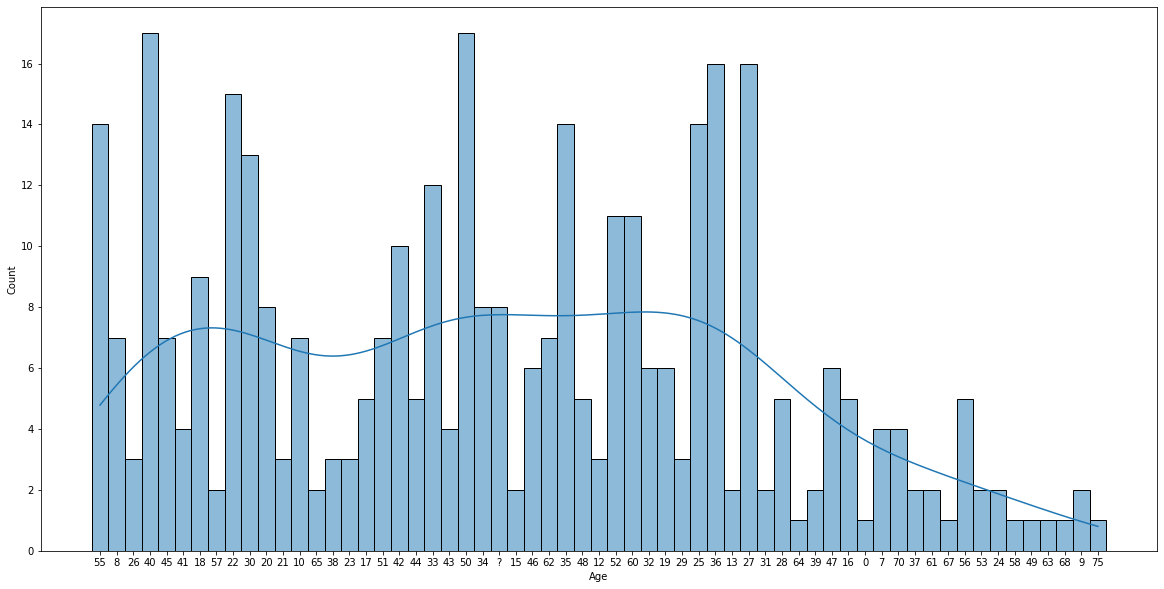

In [ ]:
plt.figure(figsize=(20,10))
my_plot=sns.histplot(x="Age",data=data,kde=True)


### Converting ? to 0

In [10]:
data.loc[data["Age"]=="?","Age"] = 0

In [11]:
data["Age"] = data["Age"].astype(int)

In [12]:
data.loc[data["Age"]==0,"Age"] = data.Age.median()

In [13]:
data.Age.median()

35.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

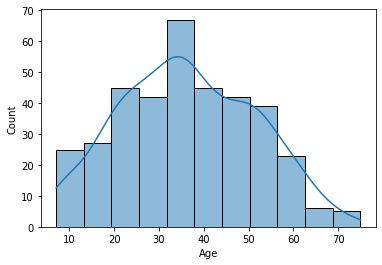

In [ ]:
sns.histplot(x = "Age", data=data,kde=True)

## feature selection

## **what if the features are highly correlated for multiclass classification problems**

If the features are highly correlated in a multiclass classification problem, it can have both positive and negative effects on the performance of the classification model. Here are some possible implications:

* Redundancy: Highly correlated features may provide redundant information, which can increase the complexity of the model without contributing significantly to the predictive power. This redundancy can lead to overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.

* Model Instability: Correlated features can cause instability in the model, especially if the correlation is strong. Small changes in the input data or slight variations in the training set can result in significant changes in the model's predictions. This instability can make it challenging to interpret the model's results and may lead to inconsistent or unreliable predictions.

* Increased Sensitivity to Noise: Correlated features can amplify the effects of noise or outliers in the data. If one of the correlated features contains noisy or outlier values, the model might give excessive importance to that feature, leading to biased predictions.

* Improved Discrimination: On the positive side, highly correlated features can sometimes provide complementary information, enhancing the model's ability to discriminate between different classes. In such cases, the correlation can improve the model's performance by capturing multiple aspects of the data and improving the decision boundaries.* 

# Task 2: Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 



## Model building without removing features

In [283]:
X = data.drop(['class'],axis=1)
y = data["class"]

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)#,stratify=True)

In [285]:
results_dic={}

### Logistic regression 

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score

#create logistic regression model
Logistic_Regression = LogisticRegression(random_state=42)

#cross validation score
scores = cross_val_score(Logistic_Regression,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

#fit the model on the training data
Logistic_Regression.fit(X_train, y_train)

#predict on the test data
y_pred = Logistic_Regression.predict(X_test)

model_name="Logistic Regression "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)


results_dic={'Model Name':[model_name],'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1 score':[f1]}

print('Model Testing Performance')
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9693730684464489
Model Testing Performance
Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#create logistic regression model
model = LogisticRegression(random_state=42)
#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

#create GridSearchCV object
grid = GridSearchCV(model, param_grid=param_grid)

#fit the model on the training data
grid.fit(X_train, y_train)

#print best parameters
print('Best Parameters:', grid.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l2'}


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report


#create logistic regression model
Logistic_Regression_hyper = LogisticRegression(C=10,penalty='l2',random_state=42)

scores = cross_val_score(Logistic_Regression_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))
#fit the model on the training data
Logistic_Regression_hyper.fit(X_train, y_train)

#predict on the test data
y_pred = Logistic_Regression_hyper.predict(X_test)

model_name="Logistic Regression hyperparameter  "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)


metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break

print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9762696201705868
Model testing performance:
Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



# KNN

In [289]:
from sklearn.neighbors import KNeighborsClassifier



KNeighbors = KNeighborsClassifier()

scores = cross_val_score(KNeighbors,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

KNeighbors.fit(X_train,y_train)
y_pred = KNeighbors.predict(X_test)

model_name="K Nearest Neighbor  "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Model testing performance:')
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.8521402298658491
Model testing performance:
Accuracy: 0.8378
precision: 0.8508
Recall: 0.8378
F1: 0.8435
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.60      0.67      0.63         9
           3       1.00      1.00      1.00        13
           4       0.44      0.50      0.47         8
           5       0.80      0.80      0.80        10
           6       0.67      0.67      0.67         3

    accuracy                           0.84        74
   macro avg       0.75      0.76      0.76        74
weighted avg       0.85      0.84      0.84        74



In [290]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7],
          'weights':['uniform','distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         }
optimal_params = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)
optimal_params.fit(X_train,y_train)
optimal_params.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [291]:
from sklearn.neighbors import KNeighborsClassifier



KNeighbors_hyper = KNeighborsClassifier(algorithm= 'auto',n_neighbors= 3, weights='distance')

scores = cross_val_score(KNeighbors_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

KNeighbors_hyper.fit(X_train,y_train)
y_pred = KNeighbors_hyper.predict(X_test)

model_name="K Nearest Neighbor hyperparameter "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Model testing performance:')
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.8968054449994144
Model testing performance:
Accuracy: 0.8919
precision: 0.9027
Recall: 0.8919
F1: 0.8959
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.78      0.78      0.78         9
           3       1.00      1.00      1.00        13
           4       0.60      0.75      0.67         8
           5       0.90      0.90      0.90        10
           6       0.67      0.67      0.67         3

    accuracy                           0.89        74
   macro avg       0.82      0.84      0.83        74
weighted avg       0.90      0.89      0.90        74



# Decision Tree

In [292]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dtree,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)
model_name="Decision Tree "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Model testing performance:')
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9311266809293427
Model testing performance:
Accuracy: 0.9865
precision: 0.9869
Recall: 0.9865
F1: 0.9862
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.99        74
weighted avg       0.99      0.99      0.99        74



In [293]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ["gini", "entropy"],
          'splitter':['best', 'random'],
          'max_depth':[2,3,4,5],
          'min_samples_leaf': [5, 10, 20, 50, 10]}

optimal_params = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)

new_dt=optimal_params.fit(X_train,y_train)

print('Best parameters:',optimal_params.best_params_,sep='\n')

Best parameters:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'splitter': 'best'}


In [294]:
from sklearn.tree import DecisionTreeClassifier
dtree_hyper = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth= 4, min_samples_leaf= 5, splitter= 'best')

scores = cross_val_score(dtree_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

dtree_hyper.fit(X_train,y_train)

y_pred = dtree_hyper.predict(X_test)
model_name="Decision Tree Hyperparameter"
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9287173648928594
Model testing performance:
Accuracy: 0.973
precision: 0.9779
Recall: 0.973
F1: 0.9735
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.97      0.96      0.96        74
weighted avg       0.98      0.97      0.97        74



[Text(0.640625, 0.9, 'elongation_of_the_rete_ridges <= 0.5\nentropy = 2.462\nsamples = 292\nvalue = [81, 52, 59, 41, 42, 17]\nclass = 1'),
 Text(0.40625, 0.7, 'band-like_infiltrate <= 1.5\nentropy = 1.987\nsamples = 166\nvalue = [0, 47, 59, 41, 4, 15]\nclass = 3'),
 Text(0.25, 0.5, 'koebner_phenomenon <= 0.5\nentropy = 1.63\nsamples = 106\nvalue = [0, 46, 0, 41, 4, 15]\nclass = 2'),
 Text(0.125, 0.3, 'perifollicular_parakeratosis <= 0.5\nentropy = 1.479\nsamples = 72\nvalue = [0, 45, 0, 8, 4, 15]\nclass = 2'),
 Text(0.0625, 0.1, 'entropy = 0.946\nsamples = 56\nvalue = [0, 44, 0, 8, 4, 0]\nclass = 2'),
 Text(0.1875, 0.1, 'entropy = 0.337\nsamples = 16\nvalue = [0, 1, 0, 0, 0, 15]\nclass = 6'),
 Text(0.375, 0.3, 'PNL_infiltrate <= 0.5\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 0, 33, 0, 0]\nclass = 4'),
 Text(0.3125, 0.1, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0, 0]\nclass = 4'),
 Text(0.4375, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 0, 4, 0, 0]\nclass = 4'),
 

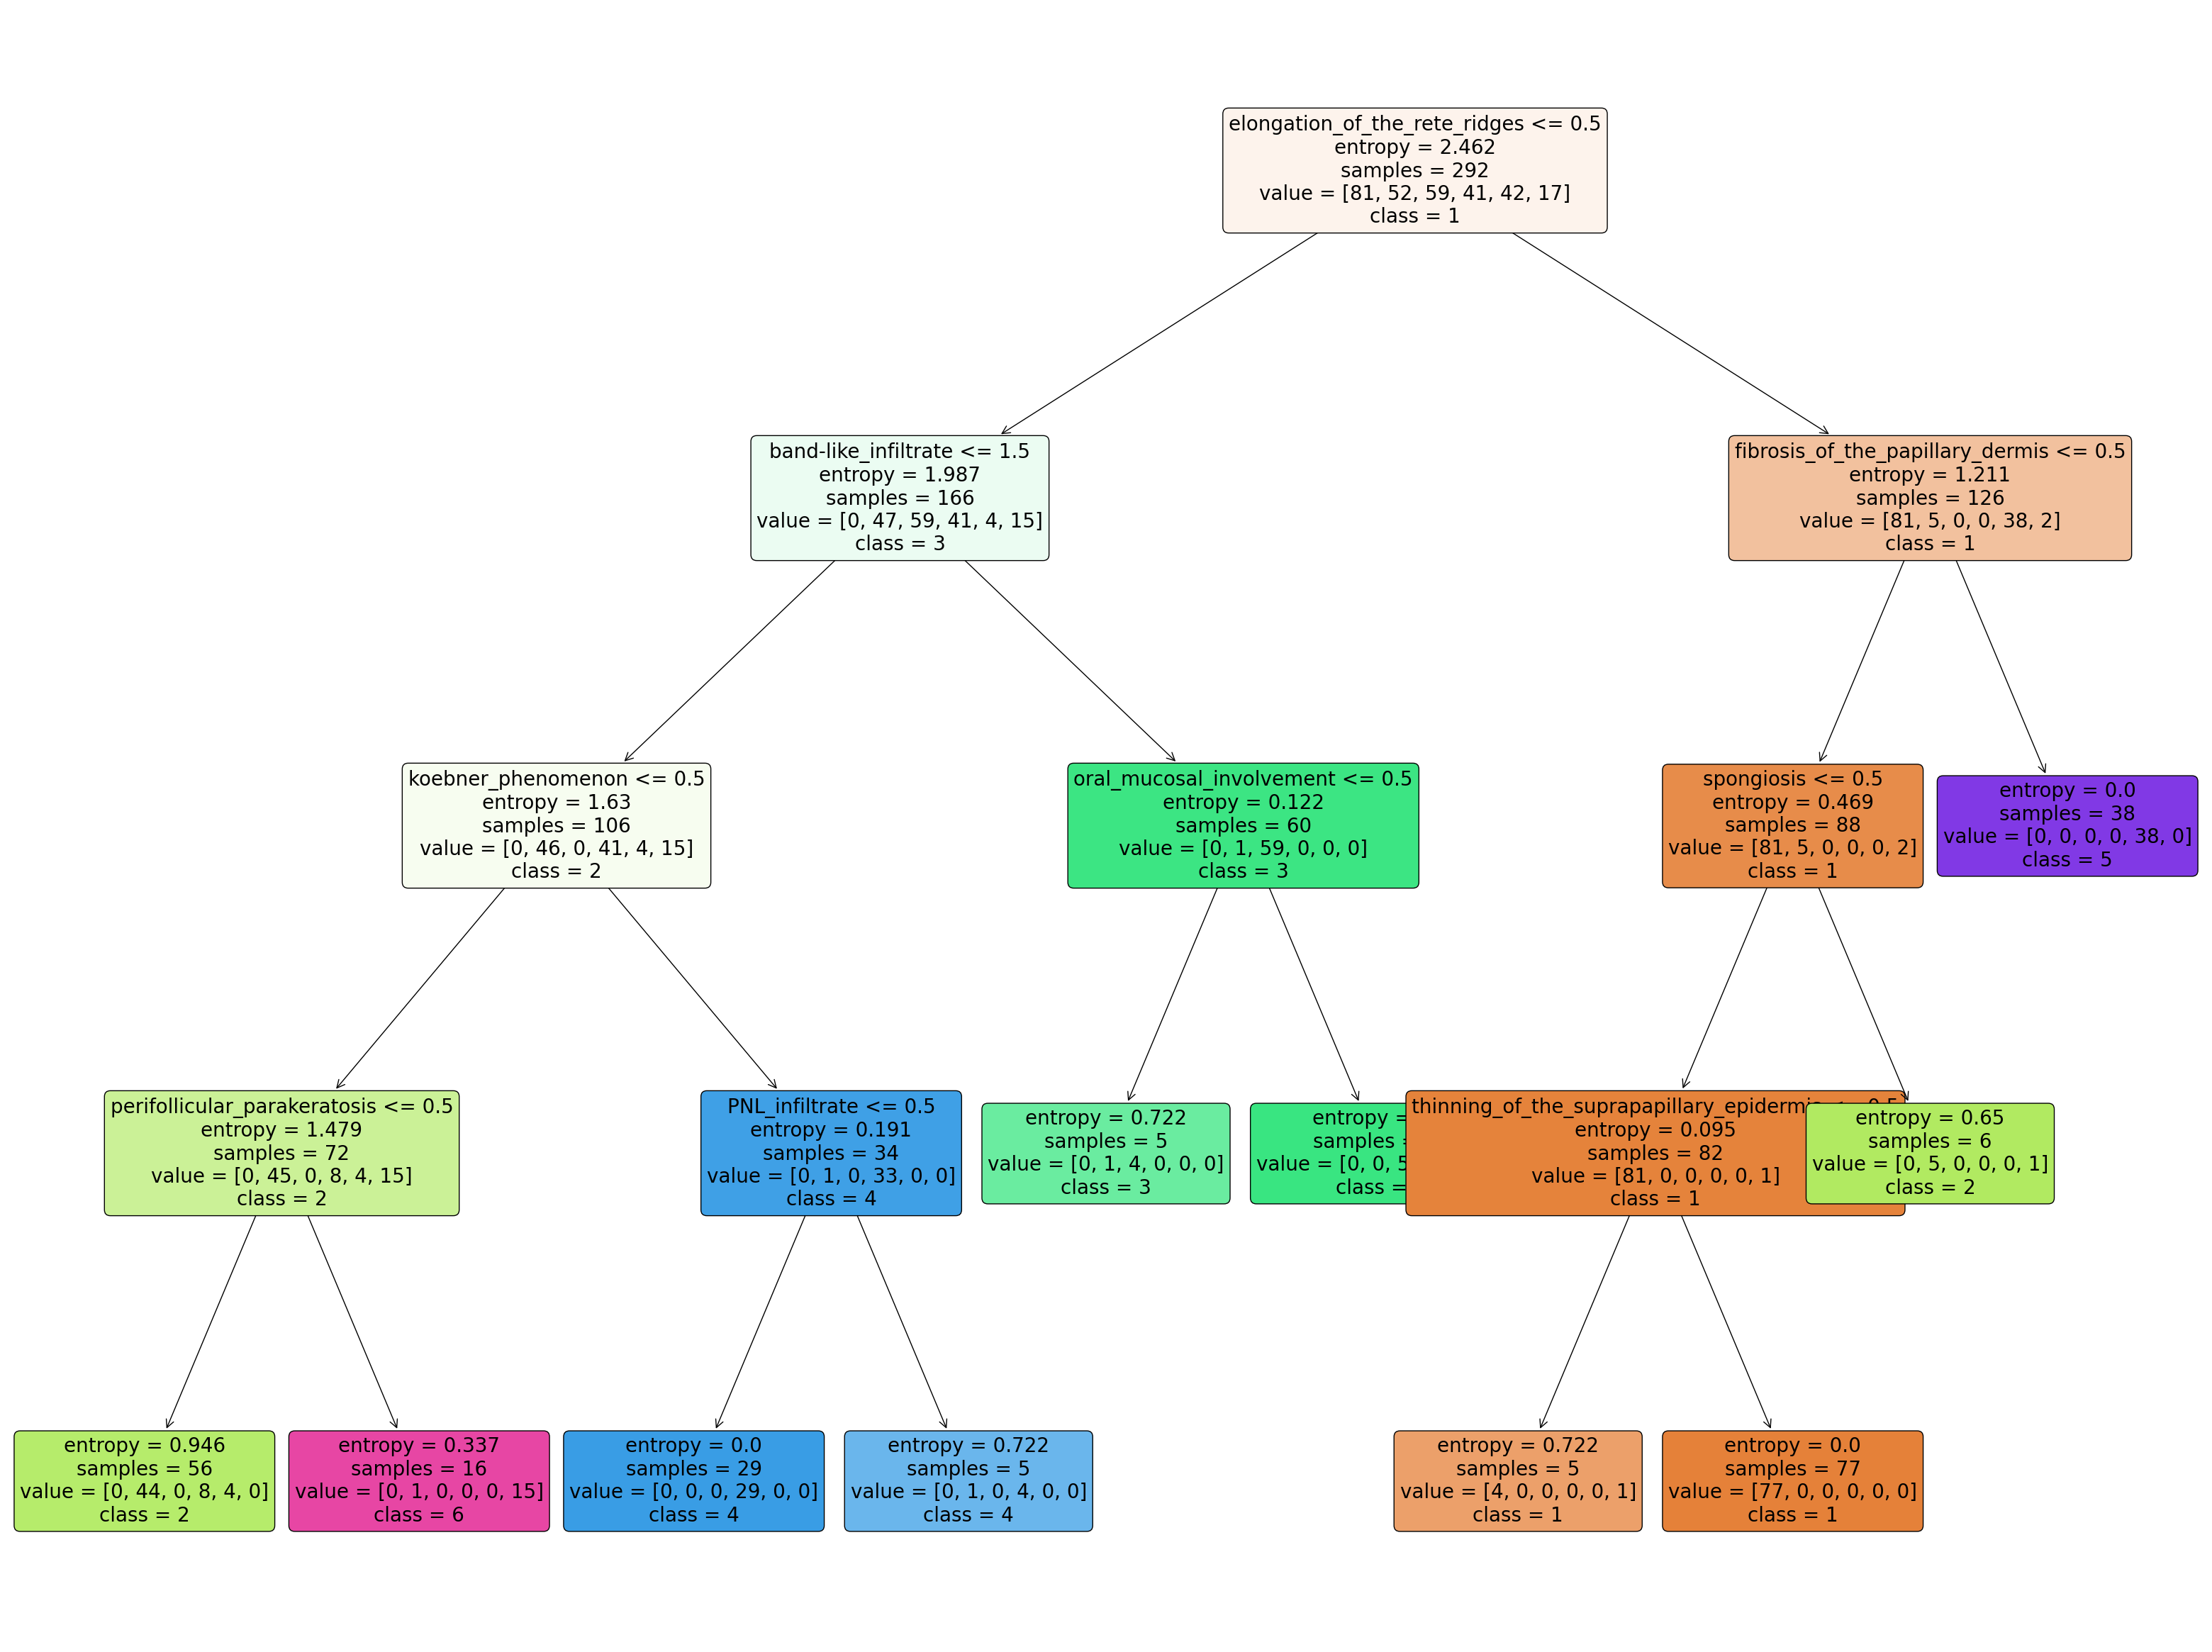

In [295]:
from sklearn.tree import plot_tree
fig,axe = plt.subplots(figsize=(40,30))
plot_tree(dtree_hyper,filled=True,rounded=True,class_names=[str(num)for num in data['class'].sort_values().unique()],feature_names=X.columns,ax=axe,fontsize=20)


<AxesSubplot:>

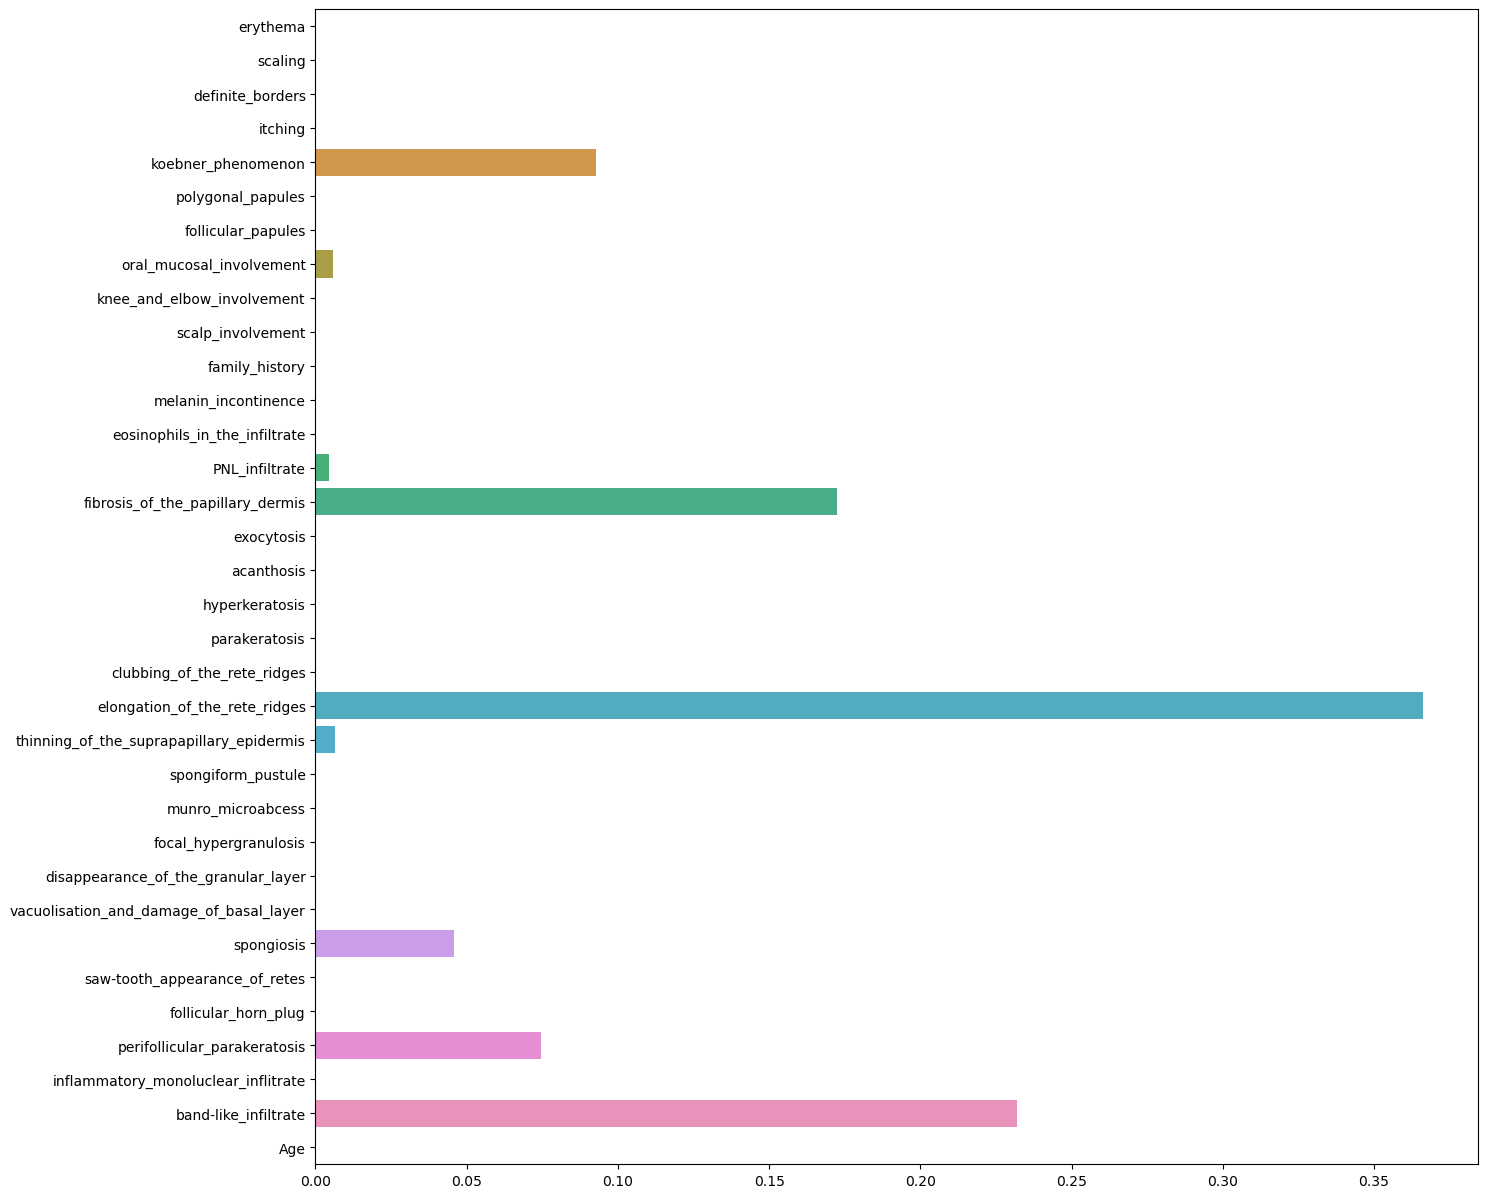

In [296]:
plt.figure(figsize=(15,15))
sns.barplot(x=dtree_hyper.feature_importances_,y=X.columns,orient='h')

# Random Forest

In [297]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

scores = cross_val_score(rfc,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
model_name="Random Forest "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Model testing performance:')
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.958076970381011
Model testing performance:
Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [298]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required to split a node
min_samples_split = [7, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }

rf = RandomForestClassifier(random_state=42)


rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2)

rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_sample

[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 100}

In [299]:
from sklearn.ensemble import RandomForestClassifier
rfc_hyper = RandomForestClassifier(random_state=42,n_estimators= 100,min_samples_split= 10,max_features= 'auto',max_depth= 5)

scores = cross_val_score(rfc_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

rfc_hyper.fit(X_train,y_train)
y_pred = rfc_hyper.predict(X_test)
model_name="Decision Tree Hyperparameter "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break

print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9721288969336207
Model testing performance:
Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



<AxesSubplot:>

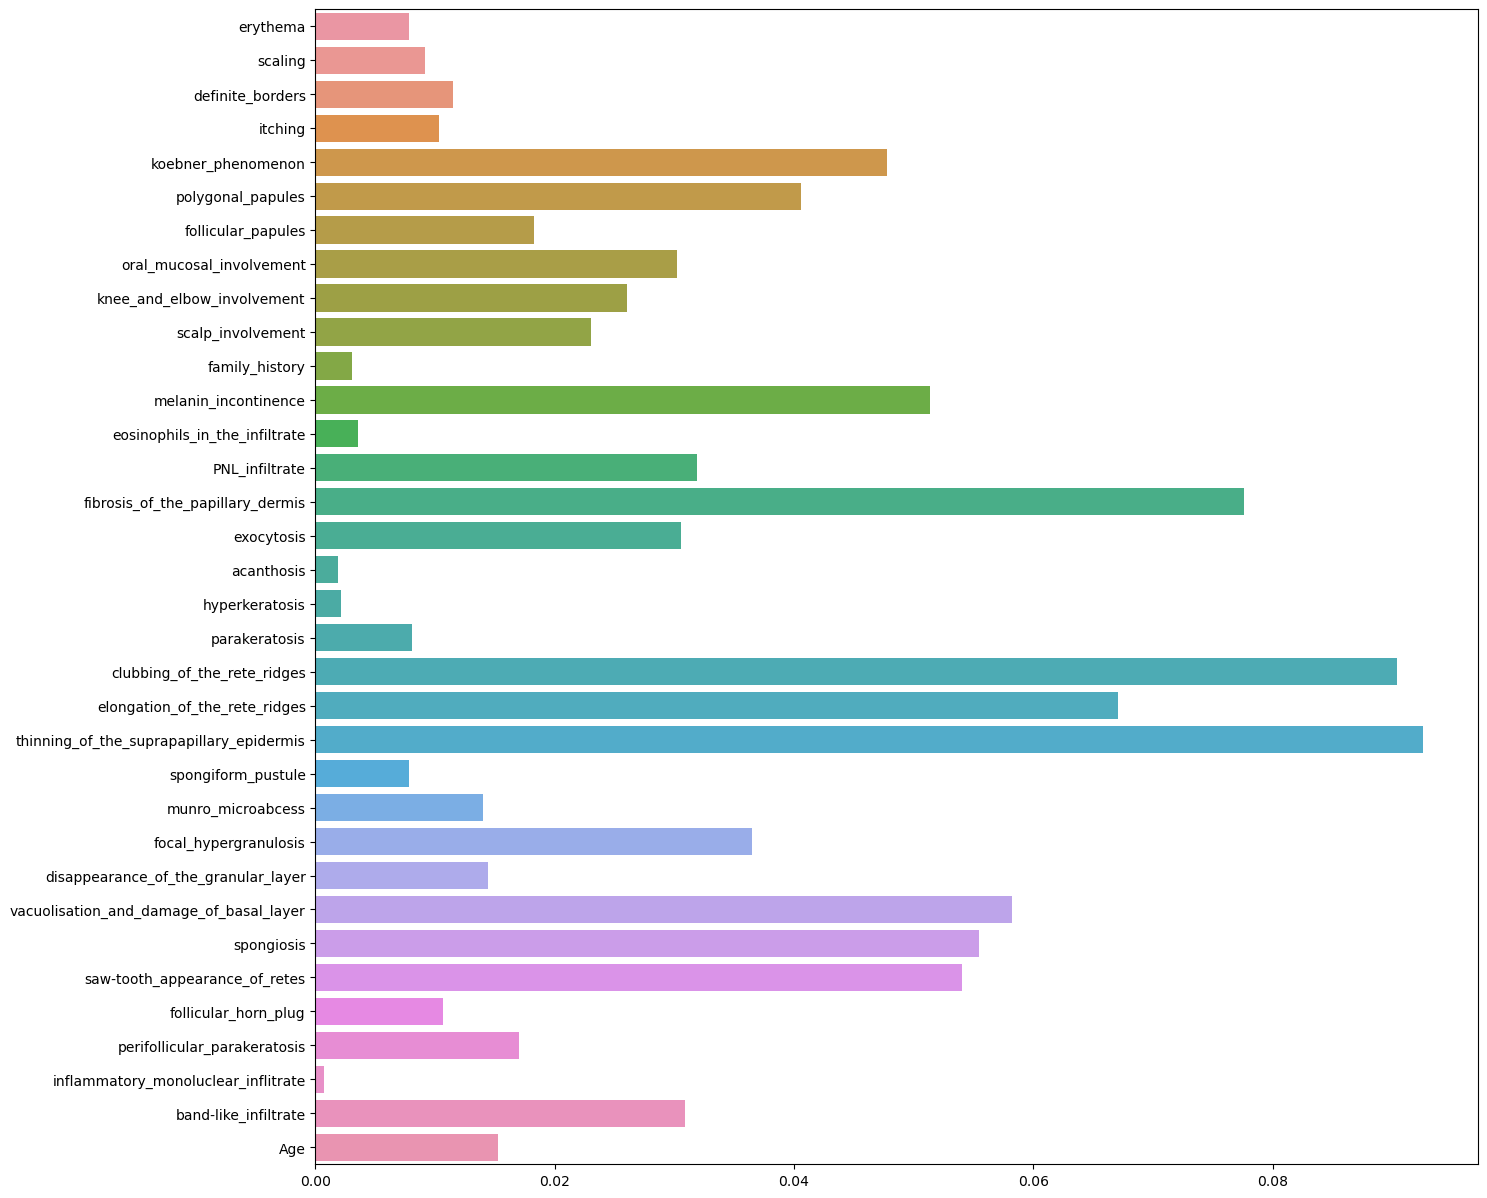

In [300]:
plt.figure(figsize=(15,15))
sns.barplot(x=rfc_hyper.feature_importances_,y=X.columns,orient='h')

# SVM

In [301]:
from sklearn.svm import SVC
svm1 = SVC(random_state=42)

scores = cross_val_score(svm1,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

svm1.fit(X_train,y_train)
y_pred = svm1.predict(X_test)
model_name="SVM "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.6178029477573984
Model testing performance:
Accuracy: 0.7432
precision: 0.6518
Recall: 0.7432
F1: 0.6765
Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.74        74
   macro avg       0.55      0.61      0.55        74
weighted avg       0.65      0.74      0.68        74



In [302]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': range(10,10000,50), 'gamma': [0.1,0.01,0.001,0.0001, 0.00001]}

base_estimator = SVC(random_state=42)
hpt_svc = GridSearchCV(base_estimator, param_grid, cv=5, verbose=3)
hpt_svc.fit(X_train,y_train)
hpt_svc.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.949 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=1.000 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.932 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.

[CV 5/5] END ..................C=210, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END .................C=210, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END .................C=210, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END .................C=210, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END .................C=210, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END .................C=210, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ................C=210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ................C=210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=210, gamma=0.001;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=210, gamma=0.001;, score=0.966 total time=   0.0s
[CV 5/5] END ................C=210, gamma=0.001;, score=0.931 total time=   0.0s
[CV 1/5] END ...............C=210, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............

[CV 5/5] END ................C=410, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=410, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=410, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=410, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=410, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=410, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ................C=410, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=410, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ................C=410, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ................C=410, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ................C=410, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END ..................C=460, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ................C=610, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ................C=610, gamma=1e-05;, score=0.931 total time=   0.0s
[CV 5/5] END ................C=610, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END ..................C=660, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END ..................C=660, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END ..................C=660, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END ..................C=660, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=660, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END .................C=660, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END .................C=660, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END .................C=660, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END .................C=660, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ..................C=860, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END ..................C=860, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=860, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END .................C=860, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END .................C=860, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END .................C=860, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END .................C=860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END .................C=860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ................C=860, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=860, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=860, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ................C=860, gamma=0.001;, score=0.966 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ..............C=1060, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=1060, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=1060, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=1060, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1060, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1060, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=1060, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=1060, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=1110, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=1110, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=1110, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=1110, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ...............

[CV 4/5] END ................C=1310, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=1310, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=1310, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=1310, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1310, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=1310, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=1310, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=1310, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 2/5] END ..............C=1310, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 3/5] END ..............C=1310, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=1310, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=1310, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ...............C=1560, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1560, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=1560, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=1560, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=1560, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 2/5] END ..............C=1560, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 3/5] END ..............C=1560, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 4/5] END ..............C=1560, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 5/5] END ..............C=1560, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 1/5] END ...............C=1560, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1560, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1560, gamma=1e-05;, score=1.000 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...............C=1810, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1810, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=1810, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=1810, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=1810, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 2/5] END ..............C=1810, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 3/5] END ..............C=1810, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 4/5] END ..............C=1810, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 5/5] END ..............C=1810, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 1/5] END ...............C=1810, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1810, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1810, gamma=1e-05;, score=1.000 total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END ...............C=2010, gamma=1e-05;, score=1.000 total time=   0.0s
[CV 4/5] END ...............C=2010, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=2010, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=2060, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=2060, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=2060, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=2060, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=2060, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=2060, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=2060, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=2060, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=2060, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END .................C=2260, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=2260, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=2260, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=2260, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=2260, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=2260, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=2260, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=2260, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=2260, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=2260, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=2260, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=2260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END ................C=2460, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=2460, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=2460, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=2460, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2460, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=2460, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=2460, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=2460, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=2460, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 3/5] END ..............C=2460, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 4/5] END ..............C=2460, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=2460, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END .................C=2710, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=2710, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=2710, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=2710, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=2710, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=2710, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=2710, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=2710, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2710, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=2710, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=2710, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=2710, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C

[CV 2/5] END ................C=2910, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=2910, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=2910, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=2910, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=2910, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=2910, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2910, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=2910, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=2910, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=2910, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=2910, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 3/5] END ..............C=2910, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 4/5] END ..............C

[CV 5/5] END .................C=3160, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=3160, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=3160, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=3160, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=3160, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=3160, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=3160, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=3160, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3160, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=3160, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=3160, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=3160, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C

[CV 5/5] END ..............C=3360, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 1/5] END ...............C=3360, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=3360, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3360, gamma=1e-05;, score=1.000 total time=   0.0s
[CV 4/5] END ...............C=3360, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=3360, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=3410, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=3410, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=3410, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=3410, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=3410, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=3410, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...............C=3610, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3610, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=3610, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=3610, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=3610, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=3610, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=3610, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 4/5] END ..............C=3610, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=3610, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 1/5] END ...............C=3610, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=3610, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3610, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END .................C=3860, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=3860, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=3860, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=3860, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=3860, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=3860, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=3860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=3860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=3860, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=3860, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3860, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=3860, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END .................C=4110, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=4110, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=4110, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=4110, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=4110, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=4110, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=4110, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=4110, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=4110, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=4110, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=4110, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=4110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ..............C=4310, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=4310, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=4310, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=4310, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=4310, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=4310, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4310, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=4310, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=4310, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=4360, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=4360, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=4360, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END .................C=4560, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=4560, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=4560, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=4560, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=4560, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=4560, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=4560, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=4560, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=4560, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=4560, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=4560, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4560, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ................C=4760, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=4760, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=4760, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=4760, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=4760, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=4760, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4760, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=4760, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=4760, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=4760, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=4760, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=4760, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C

[CV 5/5] END ..............C=4960, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=4960, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=4960, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4960, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=4960, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=4960, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=5010, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=5010, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=5010, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=5010, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=5010, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=5010, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ................C=5210, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=5210, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=5210, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=5210, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=5210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=5210, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=5210, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=5210, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=5210, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=5210, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=5210, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=5210, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C

[CV 4/5] END ..............C=5410, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=5410, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=5410, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=5410, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=5410, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=5410, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=5410, gamma=1e-05;, score=0.879 total time=   0.0s
[CV 1/5] END .................C=5460, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=5460, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=5460, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=5460, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=5460, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END .................C=5660, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=5660, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=5660, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=5660, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=5660, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=5660, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=5660, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=5660, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=5660, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=5660, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=5660, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=5660, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C

[CV 5/5] END ...............C=5860, gamma=1e-05;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=5910, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=5910, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=5910, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=5910, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=5910, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=5910, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=5910, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=5910, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=5910, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=5910, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=5910, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...............C=6110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6110, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=6110, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=6110, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=6110, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=6110, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=6110, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=6110, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=6110, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=6110, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=6110, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6110, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END .................C=6360, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=6360, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=6360, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=6360, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=6360, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=6360, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=6360, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=6360, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=6360, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6360, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=6360, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=6360, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C

[CV 3/5] END ...............C=6560, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=6560, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=6560, gamma=1e-05;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=6610, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=6610, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=6610, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=6610, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=6610, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=6610, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=6610, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=6610, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=6610, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END ..............C=6810, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=6810, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=6810, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=6810, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=6810, gamma=0.0001;, score=0.879 total time=   0.0s
[CV 1/5] END ...............C=6810, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=6810, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6810, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=6810, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 5/5] END ...............C=6810, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 1/5] END .................C=6860, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=6860, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ................C=7060, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=7060, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=7060, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7060, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=7060, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=7060, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=7060, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=7060, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=7060, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=7060, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=7060, gamma=0.0001;, score=0.879 total time=   0.0s
[CV 1/5] END ...............C=7060, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ................C=7310, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=7310, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=7310, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=7310, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=7310, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=7310, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=7310, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7310, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=7310, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=7310, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=7310, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=7310, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C

[CV 1/5] END .................C=7560, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=7560, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=7560, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=7560, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=7560, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=7560, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=7560, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=7560, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=7560, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=7560, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=7560, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=7560, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END ..............C=7760, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=7760, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=7760, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=7760, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7760, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=7760, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=7760, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 1/5] END .................C=7810, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=7810, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=7810, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=7810, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=7810, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ...............C=8010, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8010, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=8010, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=8010, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8010, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=8010, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=8010, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=8010, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=8010, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=8010, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=8010, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8010, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ................C=8260, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=8260, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=8260, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=8260, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=8260, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=8260, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=8260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8260, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=8260, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=8260, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8260, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=8260, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C

[CV 2/5] END .................C=8510, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=8510, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=8510, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=8510, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=8510, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=8510, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=8510, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=8510, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=8510, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=8510, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=8510, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8510, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...............C=8710, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8710, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=8710, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=8710, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8710, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=8710, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=8710, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=8710, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=8710, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=8710, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=8710, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8710, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ...............C=8910, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=8910, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8910, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=8910, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=8910, gamma=1e-05;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=8960, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=8960, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=8960, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=8960, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=8960, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=8960, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=8960, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END .................C=9160, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=9160, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=9160, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=9160, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=9160, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=9160, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=9160, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=9160, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=9160, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=9160, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=9160, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=9160, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C

[CV 4/5] END ...............C=9360, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=9360, gamma=1e-05;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=9410, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=9410, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=9410, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .................C=9410, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .................C=9410, gamma=0.1;, score=0.741 total time=   0.0s
[CV 1/5] END ................C=9410, gamma=0.01;, score=0.966 total time=   0.0s
[CV 2/5] END ................C=9410, gamma=0.01;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=9410, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=9410, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=9410, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ..............C=9610, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=9610, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=9610, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C=9610, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=9610, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=9610, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=9610, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=9610, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=9610, gamma=1e-05;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=9660, gamma=0.1;, score=0.847 total time=   0.0s
[CV 2/5] END .................C=9660, gamma=0.1;, score=0.831 total time=   0.0s
[CV 3/5] END .................C=9660, gamma=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END ................C=9860, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ................C=9860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 5/5] END ................C=9860, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=9860, gamma=0.001;, score=0.966 total time=   0.0s
[CV 2/5] END ...............C=9860, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=9860, gamma=0.001;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=9860, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=9860, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=9860, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 2/5] END ..............C=9860, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=9860, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 4/5] END ..............C=9860, gamma=0.0001;, score=0.966 total time=   0.0s
[CV 5/5] END ..............C

{'C': 60, 'gamma': 0.001}

In [303]:
hpt_svc.best_params_

{'C': 60, 'gamma': 0.001}

In [304]:
from sklearn.svm import SVC
svm_hyper = SVC(C=60, gamma=0.001,random_state=42)

scores = cross_val_score(svm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

svm_hyper.fit(X_train,y_train)
y_pred = svm_hyper.predict(X_test)
model_name="SVM Hyperparameter "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9594175855897218
Model testing performance
Accuracy: 0.973
precision: 0.9779
Recall: 0.973
F1: 0.9725
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.97        74
   macro avg       0.97      0.92      0.94        74
weighted avg       0.98      0.97      0.97        74



# Gradient Boost 

In [305]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(random_state=42)

scores = cross_val_score(grad,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

grad.fit(X_train, y_train)
y_pred = grad.predict(X_test)
model_name="Gradient Boost "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))
# the models which give 100% performance no hyperparameter tuning is reqiured 

Model training performance:  0.9396982621050292
Model testing performance:
Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



<AxesSubplot:>

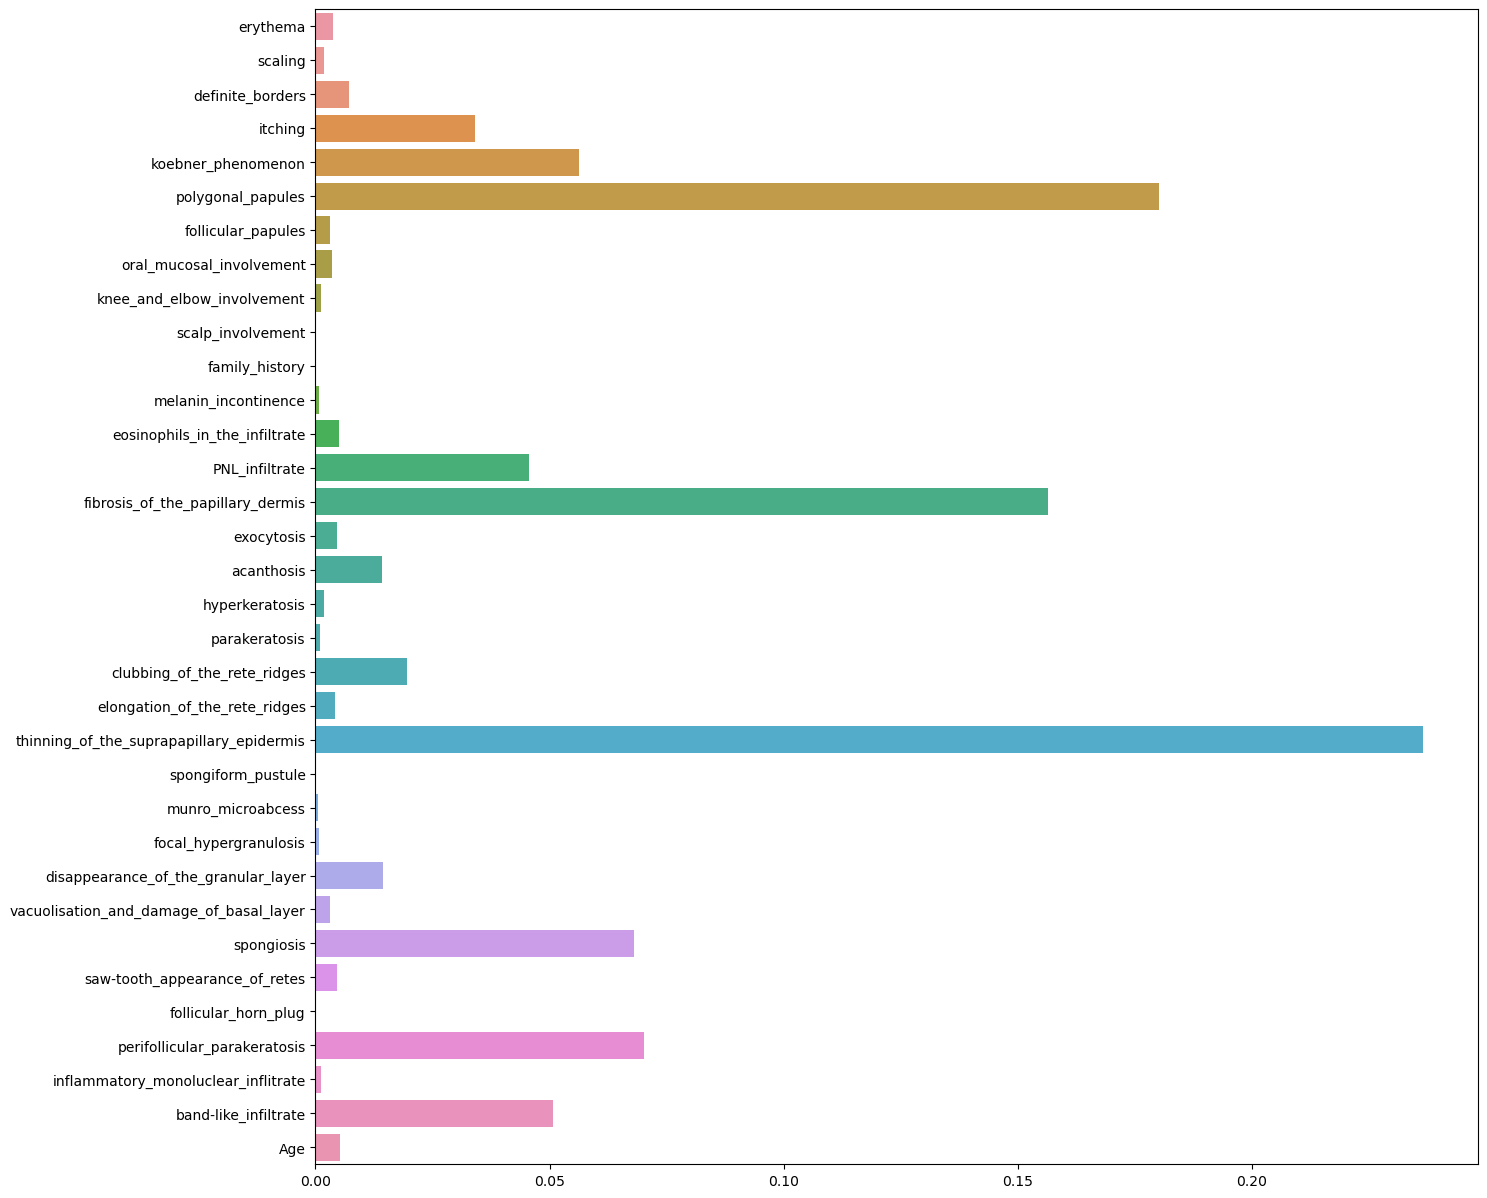

In [306]:
plt.figure(figsize=(15,15))
sns.barplot(x=grad.feature_importances_,y=X.columns,orient='h')

# ADA Boost

In [307]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

scores = cross_val_score(ada,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))


ada.fit(X_train, y_train)


y_pred = ada.predict(X_test)
model_name="ADA "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.5754432938662102
Model testing performance:
Accuracy: 0.8919
precision: 0.8347
Recall: 0.8919
F1: 0.8545
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.53      1.00      0.69         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.89        74
   macro avg       0.75      0.83      0.78        74
weighted avg       0.83      0.89      0.85        74



In [308]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost classifier object
ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.1, 0.5, 1.0]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(ada, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 150}


In [309]:
from sklearn.ensemble import AdaBoostClassifier
ada_hyper = AdaBoostClassifier(n_estimators=150,learning_rate= 0.5,random_state=42)

scores = cross_val_score(ada_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

ada_hyper.fit(X_train, y_train)


y_pred = ada_hyper.predict(X_test)
model_name="Ada Hyperparameter "
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Model training performance:  0.9217335796112509
Model testing performance:
Accuracy: 0.9595
precision: 0.9696
Recall: 0.9595
F1: 0.9603
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.75      1.00      0.86         9
           3       1.00      1.00      1.00        13
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.96        74
   macro avg       0.96      0.95      0.95        74
weighted avg       0.97      0.96      0.96        74



# CatBoost

In [310]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()

clf.fit(X_train, y_train, verbose=False)

y_pred = clf.predict(X_test)
model_name="CAT Boost"
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break

print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))
# the models which give 100% performance no hyperparameter tuning is reqiured 

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



# XGBoost

In [311]:
unique_labels = data['class'].unique()

In [312]:
min_label = min(unique_labels)
y_processed = y - min_label

In [313]:
from sklearn.model_selection import train_test_split
X_traina,X_testa,y_traina,y_testa = train_test_split(X,y_processed,test_size=0.2,random_state=42)

In [314]:
from xgboost import XGBClassifier


xgbc = XGBClassifier()


xgbc.fit(X_traina, y_traina)
y_pred = xgbc.predict(X_testa)
model_name="XG Boost"
accuracy = round(accuracy_score(y_testa, y_pred), 4)
precision = round(precision_score(y_testa, y_pred,average='weighted'),4)
recall = round(recall_score(y_testa, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testa, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testa, y_pred))

Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [315]:
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV




xgbc1 = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500]
}

grid_clf = GridSearchCV(xgbc1, param_grid=param_grid, cv=5)
grid_clf.fit(X_traina,y_traina)

print("Best parameters found: ",grid_clf.best_params_)



Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [316]:
from xgboost import XGBClassifier


xgbc_hyper = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100)


xgbc_hyper.fit(X_traina, y_traina)
y_pred = xgbc_hyper.predict(X_testa)
model_name="XG Boost hyperparameter"
accuracy = round(accuracy_score(y_testa, y_pred), 4)
precision = round(precision_score(y_testa, y_pred,average='weighted'),4)
recall = round(recall_score(y_testa, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testa, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Model training performance: ',grid_clf.best_score_)
print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testa, y_pred))

Model training performance:  0.9624196376388078
Model testing performance:
Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



# ANN

In [317]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [318]:
cl=Sequential()

In [319]:
#input layer
cl.add(Dense(units=68,activation='relu',input_dim=34))

In [320]:
#hidden layer 
cl.add(Dense(units=17,activation='relu'))

In [321]:
#output layer
cl.add(Dense(6,activation='softmax'))

In [322]:
cl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [323]:
cl.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 68)                2380      
                                                                 
 dense_13 (Dense)            (None, 17)                1173      
                                                                 
 dense_14 (Dense)            (None, 6)                 108       
                                                                 
Total params: 3,661
Trainable params: 3,661
Non-trainable params: 0
_________________________________________________________________


In [324]:
#model_history=cl.fit(X_train,y_train,validation_split=0.2,batch_size=33,epochs=50)
ann = cl.fit(X_traina, y_traina, validation_split=0.2, epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 3.8765 - accuracy: 0.1459 - val_loss: 2.5817 - val_accuracy: 0.2034
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 2.5983 - accuracy: 0.2575 - val_loss: 1.9325 - val_accuracy: 0.3390
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 1.9053 - accuracy: 0.3906 - val_loss: 1.5275 - val_accuracy: 0.5932
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 1.5529 - accuracy: 0.5708 - val_loss: 1.2080 - val_accuracy: 0.6102
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 1.2659 - accuracy: 0.5451 - val_loss: 1.0340 - val_accuracy: 0.6441
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 1.0959 - accuracy: 0.5107 - val_loss: 0.8687 - val_accuracy: 0.6780
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.9494 - accuracy: 0.5880 - val_loss: 0.7590 - val_accuracy: 0.7119
Epoch 8/50
8/8 [=================

In [325]:
ann.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

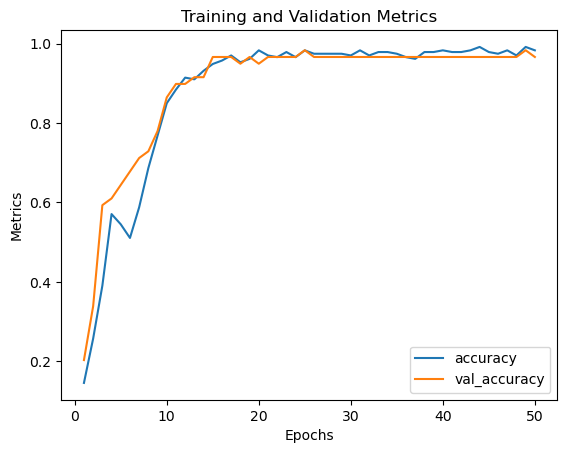

In [326]:
epochs =list(range(1, 51))
plt.plot(epochs, ann.history['accuracy'], label='accuracy')
plt.plot(epochs, ann.history['val_accuracy'], label='val_accuracy')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()  # Show legend
# Display the plot
plt.show()

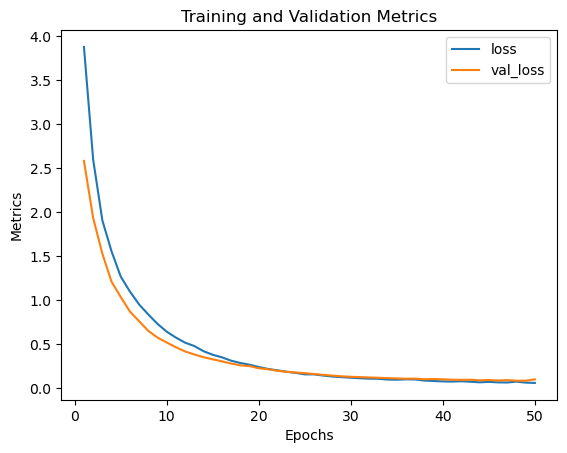

In [327]:
epochs =list(range(1, 51))
plt.plot(epochs, ann.history['loss'], label='loss')
plt.plot(epochs, ann.history['val_loss'], label='val_loss')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()  # Show legend
# Display the plot
plt.show()

In [328]:
y_pred = cl.predict(X_testa)
y_pred_labels = np.argmax(y_pred, axis=1)

3/3 [==============================] - 0s 511us/step


In [329]:
from sklearn.metrics import classification_report,f1_score

model_name="ANN"
accuracy = round(accuracy_score(y_testa,y_pred_labels), 4)
precision = round(precision_score(y_testa, y_pred_labels,average='weighted'),4)
recall = round(recall_score(y_testa, y_pred_labels,average='weighted'), 4)
f1 = round(f1_score(y_testa, y_pred_labels,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break


print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testa, y_pred_labels))

Accuracy: 0.9865
precision: 0.9878
Recall: 0.9865
F1: 0.9864
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



# Linear Discriminant Analysis (LDA)

In [330]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda1 = LDA()
X_train_new = lda1.fit(X_train,y_train).transform(X_train)
y_pred = lda1.predict(X_test)

model_name="LDA"
accuracy = round(accuracy_score(y_test,y_pred), 4)
precision = round(precision_score(y_test, y_pred,average='weighted'),4)
recall = round(recall_score(y_test, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic)):
    for metric in metrics:
        results_dic[list(results_dic.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic):
            break
    break
    

    
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.973
precision: 0.9743
Recall: 0.973
F1: 0.973
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       0.88      0.88      0.88         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.97      0.97        74



<AxesSubplot:>

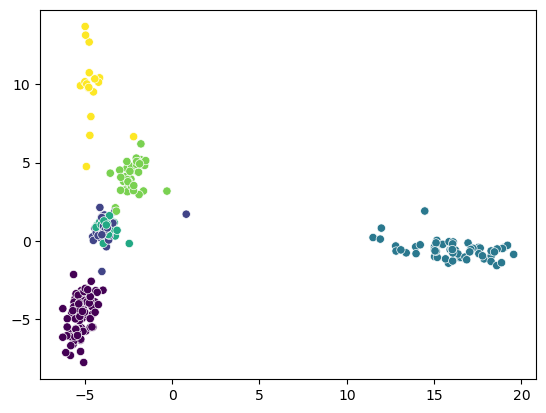

In [331]:
sns.scatterplot( x=X_train_new[:,0], y=X_train_new[:,1],
                 c=y_train)


# Feature Engineering

<AxesSubplot:>

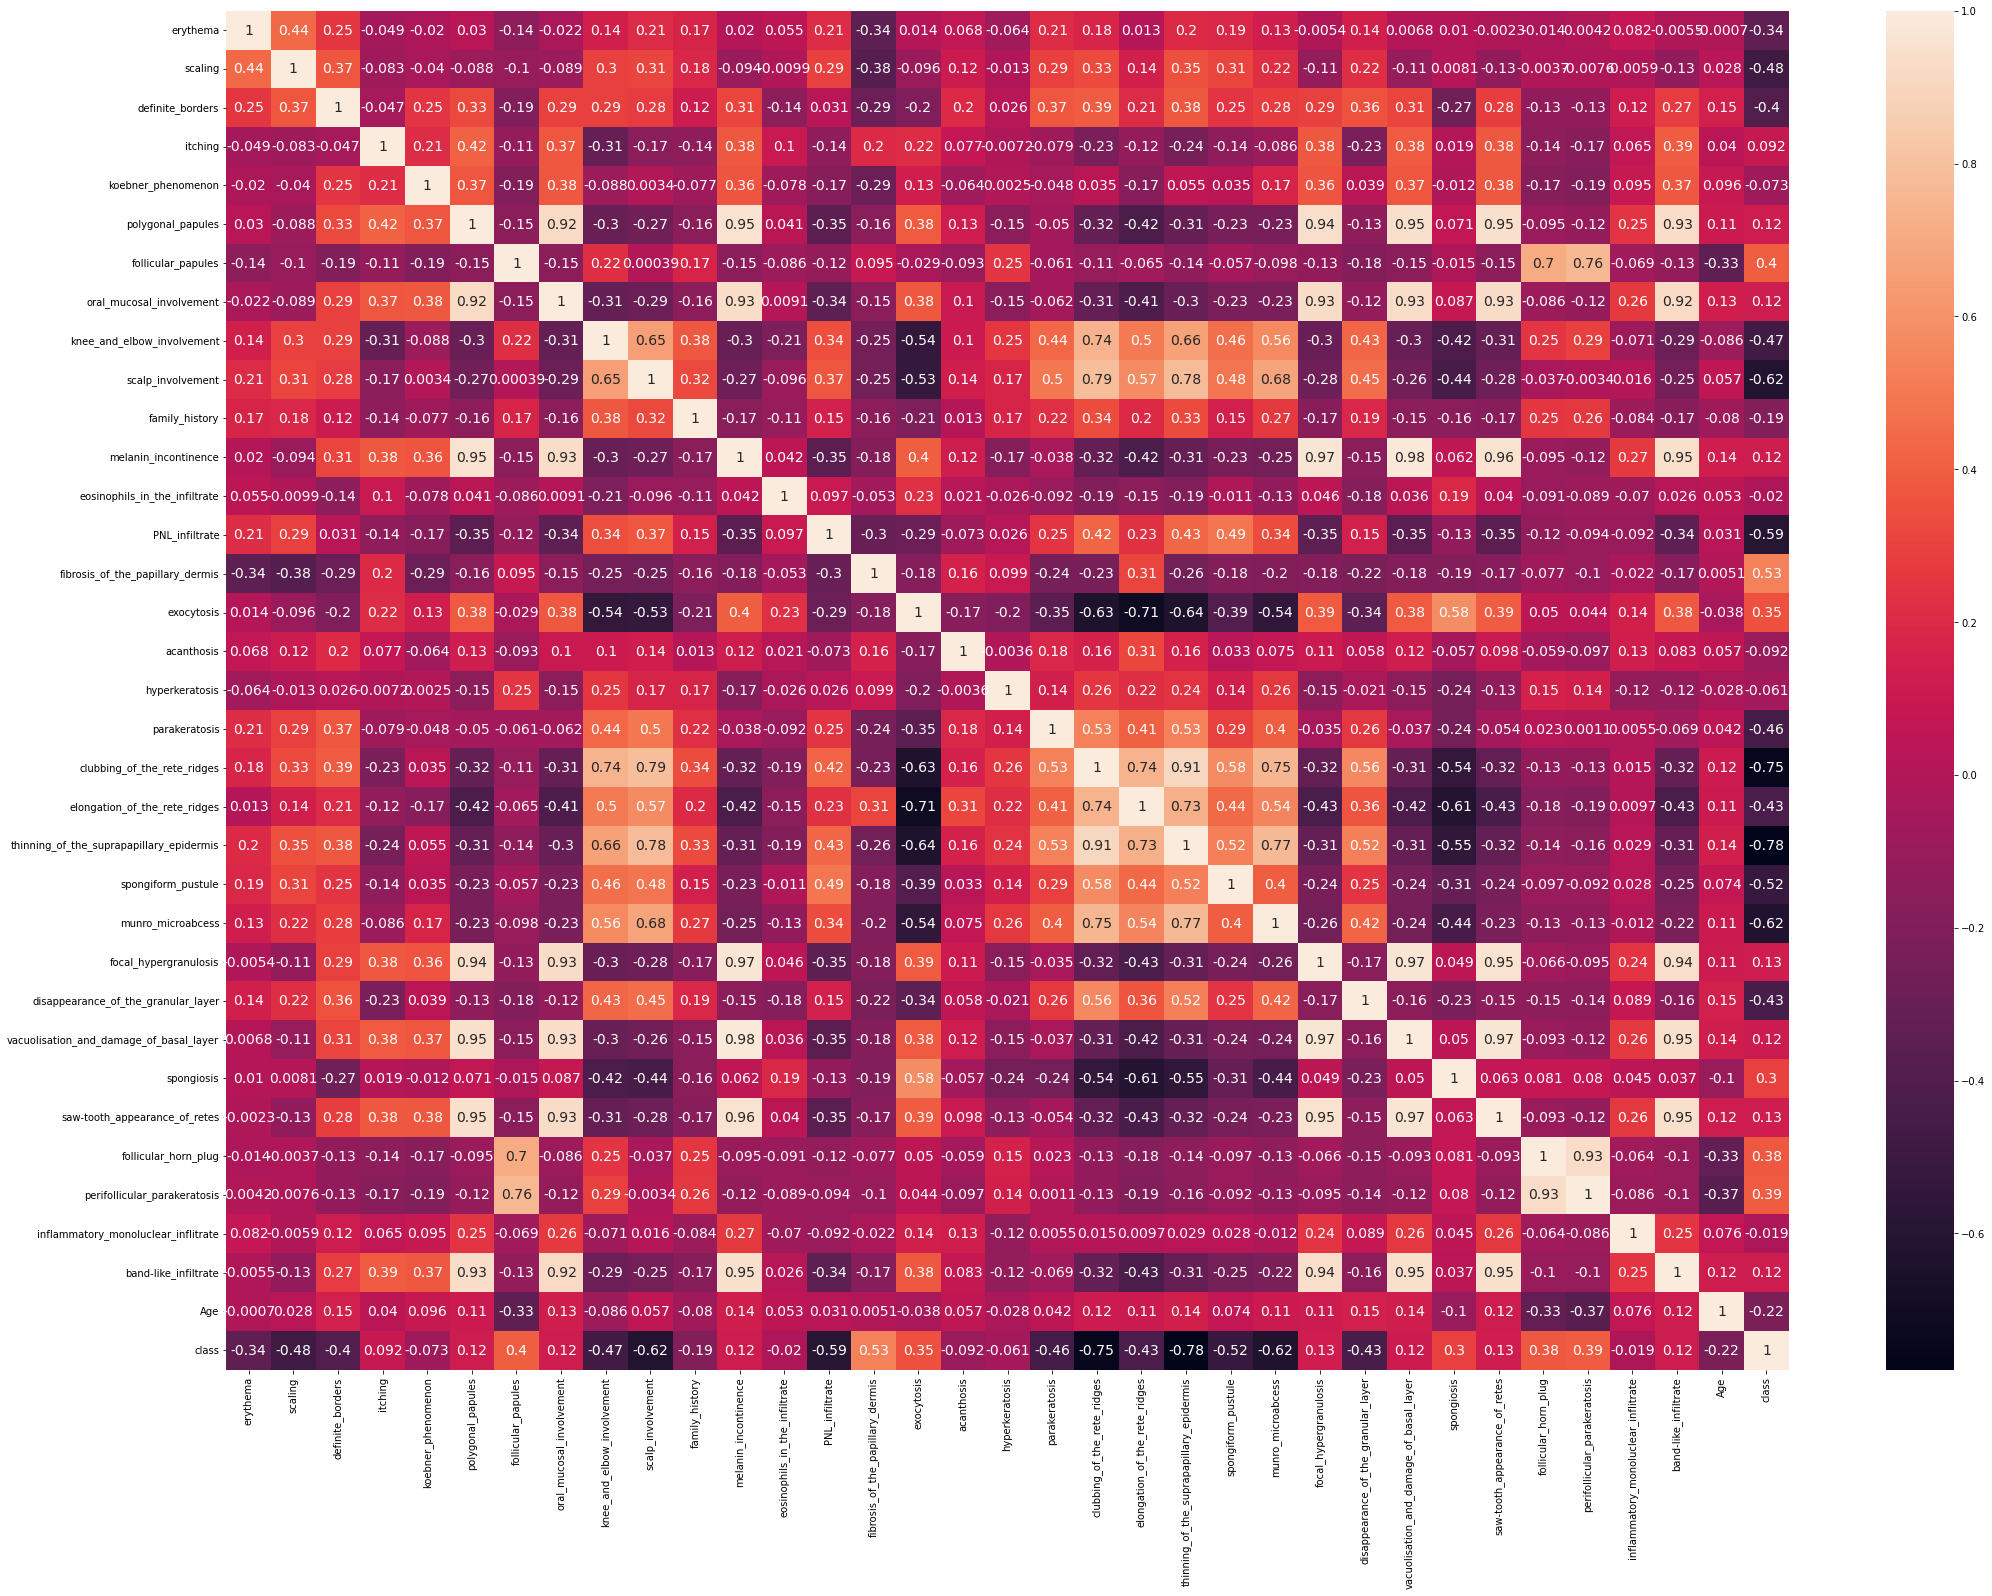

In [ ]:
plt.figure(figsize=(35,25))
sns.heatmap(data.corr(method='spearman'),annot=True,annot_kws={"size":14})

#### Using if condition for selecting features which are highly correlated

In [333]:
corr_metrix = data.corr(method='spearman')
selected_features = []
for features in corr_metrix.columns:
  for other_features in corr_metrix.columns:
    if features != other_features:
      correlation = corr_metrix.loc[features, other_features]
      if (correlation>0.90):
        selected_features.append(features)
        break
filtered_features = data[selected_features]

In [334]:
filtered_features.columns

Index(['polygonal_papules', 'oral_mucosal_involvement', 'melanin_incontinence',
       'clubbing_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis',
       'vacuolisation_and_damage_of_basal_layer',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'band-like_infiltrate'],
      dtype='object')

In [335]:
Xm = data.drop(['class','polygonal_papules', 'oral_mucosal_involvement', 'melanin_incontinence','clubbing_of_the_rete_ridges',
              'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer',
              'saw-tooth_appearance_of_retes', 'follicular_horn_plug','perifollicular_parakeratosis', 'band-like_infiltrate'],axis=1)
ym = data["class"]

In [336]:
Xm.shape

(366, 23)

In [337]:
ym.shape

(366,)

In [338]:
from sklearn.model_selection import train_test_split
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm,ym,test_size=0.2,random_state=42)

In [339]:
results_dic2={}

# Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score


#create logistic regression model
Logistic_Regressionm = LogisticRegression(random_state=42)


scores = cross_val_score(Logistic_Regressionm,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

#fit the model on the training data
Logistic_Regressionm.fit(X_trainm, y_trainm)


#predict on the test data
y_pred = Logistic_Regressionm.predict(X_testm)
model_name="Logistic Regression with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)


results_dic2={'Model Name':[model_name],'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1 score':[f1]}

print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9693730684464489
Model testing performance:
Accuracy: 0.9459
precision: 0.9447
Recall: 0.9459
F1: 0.9432
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.86      0.92      0.89        13
           4       0.83      0.62      0.71         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.92      0.93        74
weighted avg       0.94      0.95      0.94        74



In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#create logistic regression model
model = LogisticRegression(random_state=42)
#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

#create GridSearchCV object
grid = GridSearchCV(model, param_grid=param_grid)

#fit the model on the training data
grid.fit(X_trainm, y_trainm)

#print best parameters
print('Best Parameters:', grid.best_params_)


Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score


#create logistic regression model
Logistic_Regressionm_hyper = LogisticRegression(C=0.1,penalty='l2',random_state=42)

scores = cross_val_score(Logistic_Regressionm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

#fit the model on the training data
Logistic_Regressionm_hyper.fit(X_trainm, y_trainm)

#predict on the test data
y_pred = Logistic_Regressionm_hyper.predict(X_testm)

model_name="Logistic Regression hyperparameter with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9655044290237283
Model testing performance:
Accuracy: 0.9459
precision: 0.9489
Recall: 0.9459
F1: 0.9446
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.82      1.00      0.90         9
           3       0.92      0.92      0.92        13
           4       0.86      0.75      0.80         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.95        74
   macro avg       0.93      0.89      0.90        74
weighted avg       0.95      0.95      0.94        74



# KNN

In [343]:
from sklearn.neighbors import KNeighborsClassifier


KNeighborsm = KNeighborsClassifier()

scores = cross_val_score(KNeighborsm,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

KNeighborsm.fit(X_trainm,y_trainm)
y_pred = KNeighborsm.predict(X_testm)
model_name="KNN with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.8521402298658491
Model testing performance:
Accuracy: 0.7432
precision: 0.773
Recall: 0.7432
F1: 0.7479
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95        31
           2       0.45      0.56      0.50         9
           3       0.59      0.77      0.67        13
           4       0.50      0.50      0.50         8
           5       1.00      0.60      0.75        10
           6       0.50      0.33      0.40         3

    accuracy                           0.74        74
   macro avg       0.67      0.62      0.63        74
weighted avg       0.77      0.74      0.75        74



In [344]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7],
          'weights':['uniform','distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         }
optimal_params = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)
optimal_params.fit(X_trainm,y_trainm)
optimal_params.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [345]:
from sklearn.neighbors import KNeighborsClassifier



KNeighborsm_hyper = KNeighborsClassifier(algorithm= 'auto',n_neighbors= 3, weights='distance')

scores = cross_val_score(KNeighborsm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))


KNeighborsm_hyper.fit(X_trainm,y_trainm)
y_pred = KNeighborsm_hyper.predict(X_testm)

model_name="KNN hyperprameter with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.8968054449994144
Model testing performance:
Accuracy: 0.7568
precision: 0.7891
Recall: 0.7568
F1: 0.7678
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        31
           2       0.45      0.56      0.50         9
           3       0.60      0.69      0.64        13
           4       0.50      0.62      0.56         8
           5       1.00      0.80      0.89        10
           6       0.50      0.33      0.40         3

    accuracy                           0.76        74
   macro avg       0.68      0.65      0.66        74
weighted avg       0.79      0.76      0.77        74



#  Decision Tree

In [346]:
from sklearn.tree import DecisionTreeClassifier
dtreem = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dtreem,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

dtreem.fit(X_trainm,y_trainm)

y_pred = dtreem.predict(X_testm)
model_name="Decision Tree  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9311266809293427
Model testing performance:
Accuracy: 0.9054
precision: 0.9188
Recall: 0.9054
F1: 0.907
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.80      0.89      0.84         9
           3       0.90      0.69      0.78        13
           4       0.64      0.88      0.74         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.91        74
   macro avg       0.89      0.89      0.88        74
weighted avg       0.92      0.91      0.91        74



In [347]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ["gini", "entropy"],
          'splitter':['best', 'random'],
          'max_depth':[2,3,4,5],
          'min_samples_leaf': [5, 10, 20, 50, 10]}

optimal_params = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)

new_dt=optimal_params.fit(X_trainm,y_trainm)

print('Best parameters:',optimal_params.best_params_,sep='\n')

Best parameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'splitter': 'best'}


In [348]:
from sklearn.tree import DecisionTreeClassifier
dtreem_hyper = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 5, splitter= 'best')

scores = cross_val_score(dtreem_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

dtreem_hyper.fit(X_trainm,y_trainm)

y_pred = dtreem_hyper.predict(X_testm)
model_name="Decision Tree hyperparamete with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9252183695252943
Model testing performance:
Accuracy: 0.8919
precision: 0.8984
Recall: 0.8919
F1: 0.8903
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.75      1.00      0.86         9
           3       0.80      0.62      0.70        13
           4       0.67      0.75      0.71         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.89        74
   macro avg       0.87      0.88      0.87        74
weighted avg       0.90      0.89      0.89        74



<AxesSubplot:>

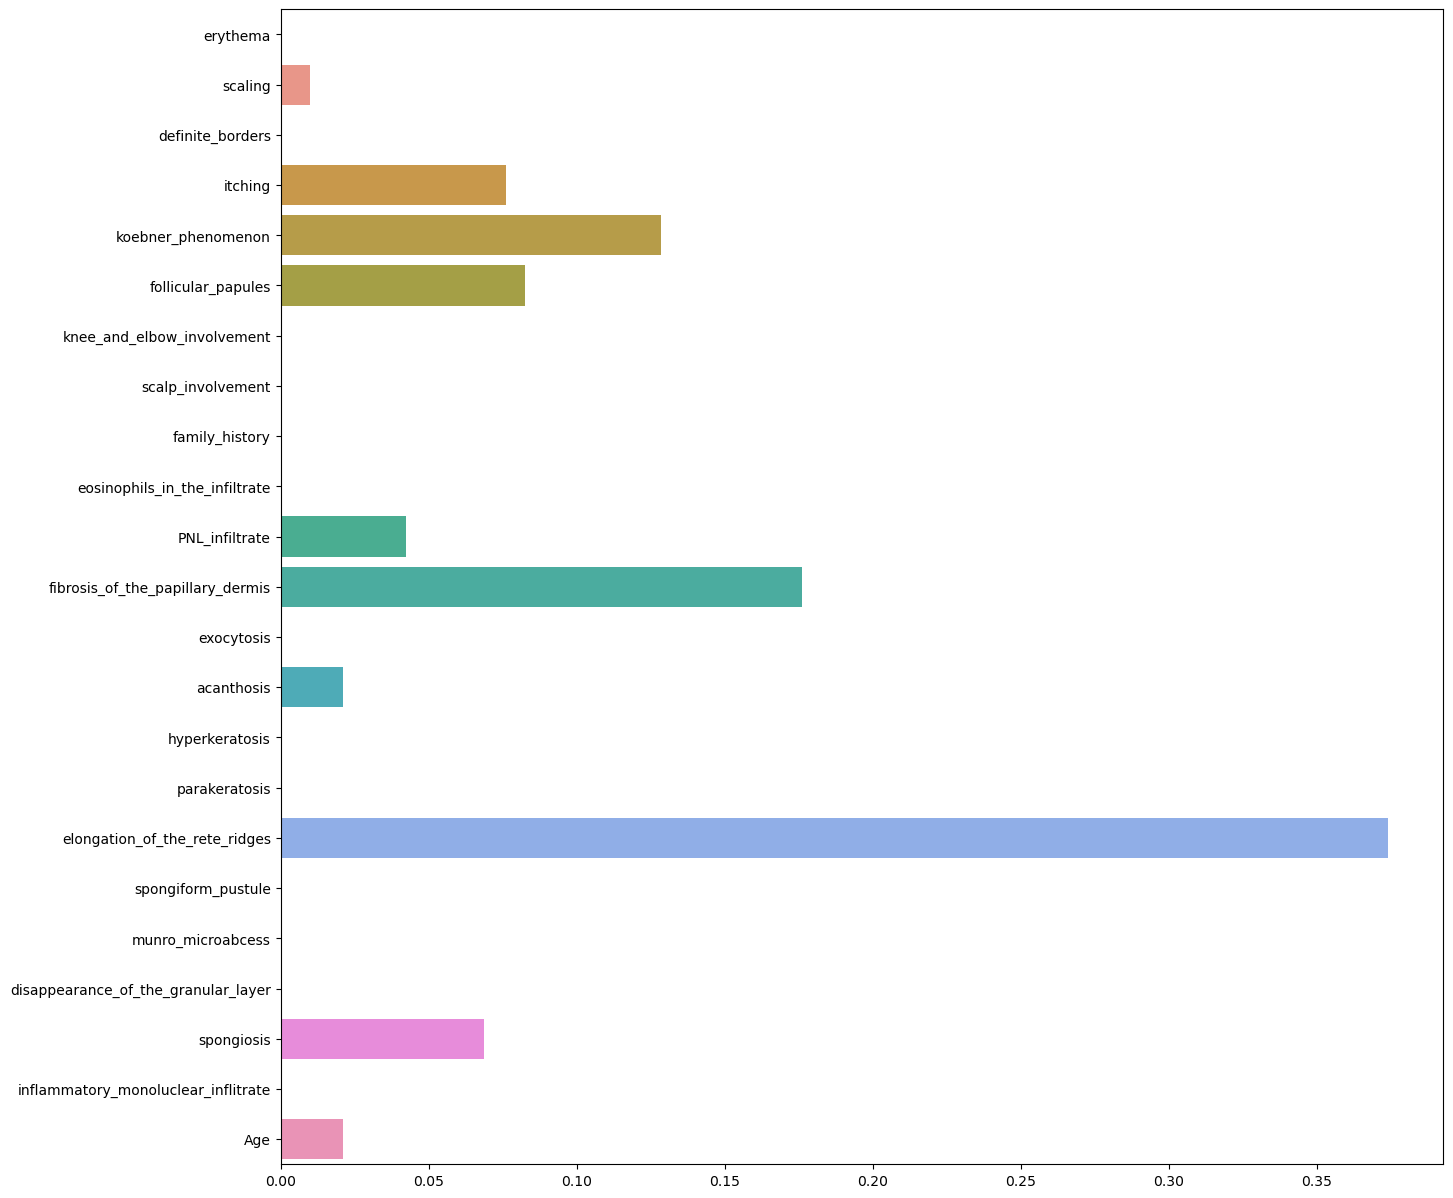

In [349]:
plt.figure(figsize=(15,15))
sns.barplot(x=dtreem_hyper.feature_importances_,y=Xm.columns,orient='h')

# Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier
rfcm = RandomForestClassifier(random_state=42)

scores = cross_val_score(rfcm,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

rfcm.fit(X_trainm,y_trainm)
y_pred = rfcm.predict(X_testm)
model_name="Random Forest  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break

print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.958076970381011
Model testing performance:
Accuracy: 0.9459
precision: 0.9462
Recall: 0.9459
F1: 0.9455
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.92      0.85      0.88        13
           4       0.75      0.75      0.75         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



In [351]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required to split a node
min_samples_split = [7, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }

rf = RandomForestClassifier(random_state=42)


rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2)

rf_random.fit(X_trainm,y_trainm)
rf_random.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_sample

[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.0s


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 50}

In [352]:
rf_random.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 50}

In [353]:
from sklearn.ensemble import RandomForestClassifier
rfcm_hyper = RandomForestClassifier(random_state=42,n_estimators= 50,min_samples_split= 10,max_features= 'auto',max_depth= 5)

scores = cross_val_score(rfcm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

rfcm_hyper.fit(X_trainm,y_trainm)
y_pred = rfcm_hyper.predict(X_testm)
model_name="Random Forest hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9650766576870049
Model testing performance:
Accuracy: 0.9459
precision: 0.9468
Recall: 0.9459
F1: 0.944
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       0.80      0.92      0.86        13
           4       0.83      0.62      0.71         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.94      0.92      0.93        74
weighted avg       0.95      0.95      0.94        74



<AxesSubplot:>

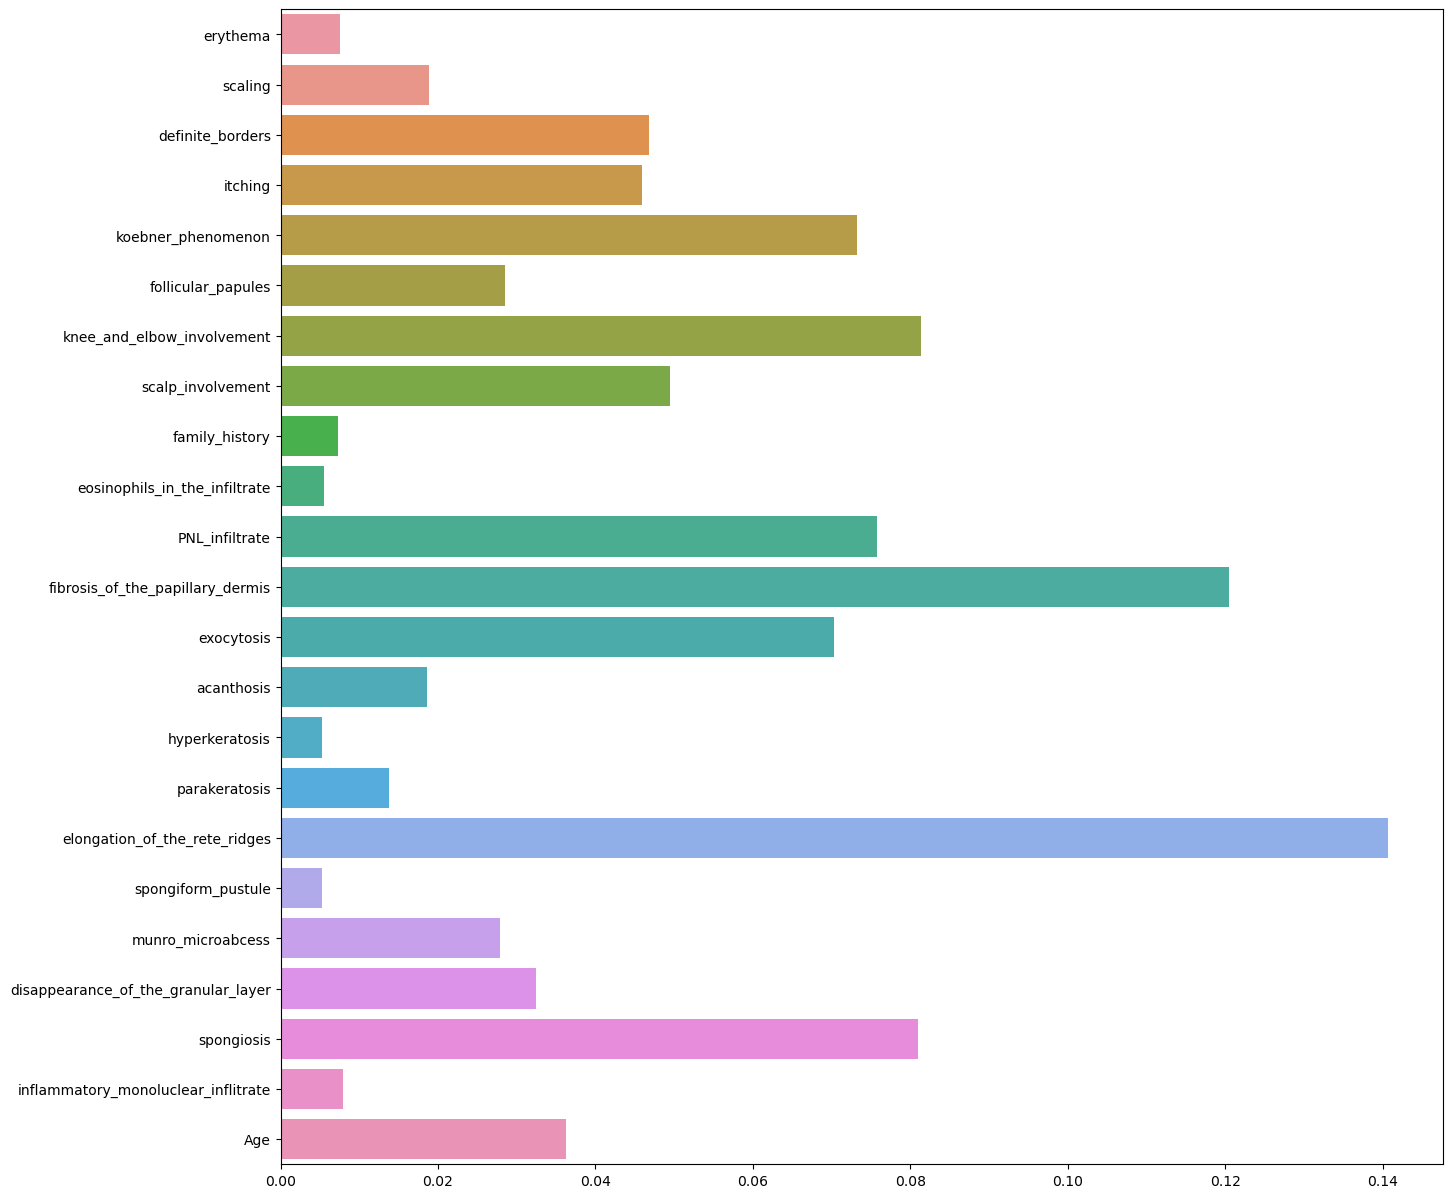

In [354]:
plt.figure(figsize=(15,15))
sns.barplot(x=rfcm_hyper.feature_importances_,y=Xm.columns,orient='h')

# SVM

In [355]:
from sklearn.svm import SVC
svm1m = SVC(random_state=42)

scores = cross_val_score(svm1m,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

svm1m.fit(X_trainm,y_trainm)
y_pred = svm1m.predict(X_testm)
model_name="SVM  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.6178029477573984
Model testing performance:
Accuracy: 0.5946
precision: 0.5211
Recall: 0.5946
F1: 0.5402
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        31
           2       0.44      0.44      0.44         9
           3       0.31      0.77      0.44        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.50      0.33      0.40         3

    accuracy                           0.59        74
   macro avg       0.37      0.41      0.37        74
weighted avg       0.52      0.59      0.54        74



In [356]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': range(10,10000,50), 'gamma': [0.1,0.01,0.001,0.0001, 0.00001]}

base_estimator = SVC(random_state=42)
hpt_svc = GridSearchCV(base_estimator, param_grid, cv=5, verbose=3)
hpt_svc.fit(X_trainm,y_trainm)
hpt_svc.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.898 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.898 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.966 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.845 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.897 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.898 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.

[CV 3/5] END ..................C=210, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END ..................C=210, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END ..................C=210, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END .................C=210, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END .................C=210, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END .................C=210, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END .................C=210, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END .................C=210, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ................C=210, gamma=0.001;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=210, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=210, gamma=0.001;, score=0.914 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ..................C=460, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END ..................C=460, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END ..................C=460, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END .................C=460, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END .................C=460, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END .................C=460, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END .................C=460, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END .................C=460, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ................C=460, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ................C=460, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=460, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=460, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END ..................C=660, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END .................C=660, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END .................C=660, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END .................C=660, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END .................C=660, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END .................C=660, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ................C=660, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ................C=660, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=660, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=660, gamma=0.001;, score=0.948 total time=   0.0s
[CV 5/5] END ................C=660, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=660, gamma=0.0001;, score=0.898 total time=   0.0s
[CV 2/5] END ...............

[CV 5/5] END ................C=860, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ...............C=860, gamma=0.0001;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=860, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=860, gamma=0.0001;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=860, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=860, gamma=0.0001;, score=0.879 total time=   0.0s
[CV 1/5] END ................C=860, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 2/5] END ................C=860, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ................C=860, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ................C=860, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 5/5] END ................C=860, gamma=1e-05;, score=0.828 total time=   0.0s
[CV 1/5] END ..................C=910, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END .................C=1110, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=1110, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=1110, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=1110, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=1110, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=1110, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=1110, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=1110, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=1110, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=1110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1110, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ...............C=1310, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1310, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1310, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=1310, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=1310, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=1310, gamma=0.0001;, score=0.898 total time=   0.0s
[CV 2/5] END ..............C=1310, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 3/5] END ..............C=1310, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C=1310, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=1310, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=1310, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 2/5] END ...............C=1310, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ..............C=1510, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=1510, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 2/5] END ...............C=1510, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1510, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 4/5] END ...............C=1510, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 5/5] END ...............C=1510, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=1560, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=1560, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=1560, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=1560, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=1560, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=1560, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END .................C=1760, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=1760, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=1760, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=1760, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=1760, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=1760, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=1760, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=1760, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=1760, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=1760, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=1760, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1760, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END .................C=1960, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=1960, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=1960, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=1960, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=1960, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=1960, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=1960, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=1960, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=1960, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=1960, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=1960, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=1960, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C

[CV 4/5] END .................C=2210, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=2210, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=2210, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=2210, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=2210, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=2210, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=2210, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=2210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=2210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2210, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=2210, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=2210, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C

[CV 5/5] END ................C=2410, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=2410, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=2410, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2410, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=2410, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=2410, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=2410, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=2410, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 3/5] END ..............C=2410, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=2410, gamma=0.0001;, score=0.948 total time=   0.0s
[CV 5/5] END ..............C=2410, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=2410, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ...............C=2610, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=2610, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 3/5] END ...............C=2610, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 4/5] END ...............C=2610, gamma=1e-05;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=2610, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=2660, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=2660, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=2660, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=2660, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=2660, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=2660, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=2660, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END .................C=2860, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=2860, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=2860, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=2860, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=2860, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=2860, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=2860, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=2860, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=2860, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=2860, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=2860, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=2860, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C

[CV 3/5] END ...............C=3060, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=3060, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=3060, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=3060, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=3060, gamma=0.0001;, score=0.983 total time=   0.0s
[CV 3/5] END ..............C=3060, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=3060, gamma=0.0001;, score=0.948 total time=   0.0s
[CV 5/5] END ..............C=3060, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=3060, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=3060, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 3/5] END ...............C=3060, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 4/5] END ...............C=3060, gamma=1e-05;, score=0.931 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END ..............C=3260, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=3260, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=3260, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............C=3260, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 4/5] END ...............C=3260, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=3260, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=3310, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=3310, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=3310, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=3310, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=3310, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=3310, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ................C=3510, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=3510, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=3510, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=3510, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=3510, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=3510, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3510, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=3510, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=3510, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=3510, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=3510, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=3510, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C

[CV 5/5] END ..............C=3710, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=3710, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=3710, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............C=3710, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 4/5] END ...............C=3710, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=3710, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=3760, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=3760, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=3760, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=3760, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=3760, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=3760, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END .................C=3960, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=3960, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=3960, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=3960, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=3960, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=3960, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=3960, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=3960, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=3960, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=3960, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=3960, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=3960, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ................C=4160, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=4160, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=4160, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=4160, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=4160, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=4160, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4160, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=4160, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=4160, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=4160, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=4160, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=4160, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C

[CV 1/5] END ...............C=4360, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=4360, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=4360, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=4360, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=4360, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=4360, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=4360, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=4360, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C=4360, gamma=0.0001;, score=0.948 total time=   0.0s
[CV 5/5] END ..............C=4360, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=4360, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=4360, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ..............C=4560, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=4560, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C=4560, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=4560, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=4560, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=4560, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............C=4560, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=4560, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=4560, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=4610, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=4610, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=4610, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END .................C=4810, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=4810, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=4810, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=4810, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=4810, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=4810, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=4810, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=4810, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=4810, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=4810, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=4810, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=4810, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END .................C=5060, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=5060, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=5060, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=5060, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=5060, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=5060, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=5060, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=5060, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=5060, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=5060, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=5060, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=5060, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ................C=5260, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=5260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=5260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=5260, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=5260, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=5260, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=5260, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=5260, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=5260, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C=5260, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C=5260, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=5260, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END ...............C=5460, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=5460, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=5460, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=5460, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=5460, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 4/5] END ..............C=5460, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C=5460, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=5460, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=5460, gamma=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............C=5460, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=5460, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 5/5] END ...............C=5460, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ...............C=5660, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=5710, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=5710, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=5710, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=5710, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=5710, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=5710, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=5710, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=5710, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=5710, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=5710, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=5710, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ................C=5910, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=5910, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=5910, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=5910, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=5910, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=5910, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=5910, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=5910, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=5910, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=5910, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=5910, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=5910, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C

[CV 3/5] END ................C=6110, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=6110, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=6110, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=6110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=6110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6110, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=6110, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=6110, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=6110, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=6110, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=6110, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=6110, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C

[CV 5/5] END ................C=6360, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=6360, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=6360, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6360, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=6360, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=6360, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=6360, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=6360, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=6360, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=6360, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C=6360, gamma=0.0001;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=6360, gamma=1e-05;, score=0.915 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...............C=6560, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=6560, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=6560, gamma=1e-05;, score=0.914 total time=   0.0s
[CV 5/5] END ...............C=6560, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END .................C=6610, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=6610, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=6610, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=6610, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=6610, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=6610, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=6610, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=6610, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END ...............C=6760, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END .................C=6810, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=6810, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=6810, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=6810, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=6810, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=6810, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=6810, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=6810, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=6810, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=6810, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=6810, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ...............C=7010, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=7010, gamma=1e-05;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=7010, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=7060, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=7060, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=7060, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=7060, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=7060, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=7060, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=7060, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=7060, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=7060, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END .................C=7260, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=7260, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=7260, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=7260, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=7260, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=7260, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=7260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=7260, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7260, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=7260, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=7260, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=7260, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C

[CV 3/5] END ...............C=7460, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=7460, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=7460, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=7460, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=7460, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=7460, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=7460, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C=7460, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=7460, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=7460, gamma=1e-05;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7460, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=7460, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END ...............C=7660, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=7710, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=7710, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=7710, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=7710, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=7710, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=7710, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=7710, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=7710, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=7710, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=7710, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=7710, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END .................C=7910, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=7910, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=7910, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=7910, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=7910, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=7910, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=7910, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=7910, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=7910, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=7910, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=7910, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=7910, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ...............C=8110, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8110, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=8110, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=8110, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8110, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=8110, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=8110, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=8110, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 5/5] END ..............C=8110, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=8110, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=8110, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 3/5] END ...............C=8110, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...............C=8310, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 3/5] END ...............C=8310, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=8310, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 5/5] END ...............C=8310, gamma=1e-05;, score=0.862 total time=   0.0s
[CV 1/5] END .................C=8360, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=8360, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=8360, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=8360, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=8360, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=8360, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=8360, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=8360, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ................C=8560, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=8560, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=8560, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=8560, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=8560, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=8560, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=8560, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8560, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=8560, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=8560, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8560, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=8560, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C

[CV 2/5] END ...............C=8760, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=8760, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=8760, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=8760, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=8760, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=8760, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=8760, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=8760, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=8760, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=8760, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=8760, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 3/5] END ...............C=8760, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...............C=8960, gamma=1e-05;, score=0.983 total time=   0.0s
[CV 3/5] END ...............C=8960, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=8960, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=8960, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END .................C=9010, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=9010, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=9010, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=9010, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=9010, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=9010, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=9010, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=9010, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END ................C=9210, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=9210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=9210, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=9210, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=9210, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=9210, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=9210, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=9210, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=9210, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=9210, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=9210, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=9210, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END ...............C=9410, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=9410, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END .................C=9460, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=9460, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END .................C=9460, gamma=0.1;, score=0.879 total time=   0.0s
[CV 4/5] END .................C=9460, gamma=0.1;, score=0.793 total time=   0.0s
[CV 5/5] END .................C=9460, gamma=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ................C=9460, gamma=0.01;, score=0.932 total time=   0.0s
[CV 2/5] END ................C=9460, gamma=0.01;, score=0.881 total time=   0.0s
[CV 3/5] END ................C=9460, gamma=0.01;, score=0.914 total time=   0.0s
[CV 4/5] END ................C=9460, gamma=0.01;, score=0.828 total time=   0.0s
[CV 5/5] END ................C=9460, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ................C=9660, gamma=0.01;, score=0.862 total time=   0.0s
[CV 1/5] END ...............C=9660, gamma=0.001;, score=0.949 total time=   0.0s
[CV 2/5] END ...............C=9660, gamma=0.001;, score=0.949 total time=   0.0s
[CV 3/5] END ...............C=9660, gamma=0.001;, score=0.914 total time=   0.0s
[CV 4/5] END ...............C=9660, gamma=0.001;, score=0.931 total time=   0.0s
[CV 5/5] END ...............C=9660, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..............C=9660, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=9660, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=9660, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=9660, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=9660, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=9660, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ..............C=9860, gamma=0.0001;, score=0.915 total time=   0.0s
[CV 2/5] END ..............C=9860, gamma=0.0001;, score=0.949 total time=   0.0s
[CV 3/5] END ..............C=9860, gamma=0.0001;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=9860, gamma=0.0001;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=9860, gamma=0.0001;, score=0.845 total time=   0.0s
[CV 1/5] END ...............C=9860, gamma=1e-05;, score=0.898 total time=   0.0s
[CV 2/5] END ...............C=9860, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 3/5] END ...............C=9860, gamma=1e-05;, score=0.948 total time=   0.0s
[CV 4/5] END ...............C=9860, gamma=1e-05;, score=0.966 total time=   0.0s
[CV 5/5] END ...............C=9860, gamma=1e-05;, score=0.845 total time=   0.0s
[CV 1/5] END .................C=9910, gamma=0.1;, score=0.797 total time=   0.0s
[CV 2/5] END .................C=9910, gamma=0.1;, score=0.797 total time=   0.0s
[CV 3/5] END ...............

{'C': 360, 'gamma': 0.0001}

In [357]:
hpt_svc.best_params_

{'C': 360, 'gamma': 0.0001}

In [358]:
from sklearn.svm import SVC
svmm_hyper = SVC(C=360, gamma=0.0001,random_state=42)

scores = cross_val_score(svmm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

svmm_hyper.fit(X_trainm,y_trainm)
y_pred = svmm_hyper.predict(X_testm)
model_name="SVM hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9491636207248888
Model testing performance:
Accuracy: 0.9189
precision: 0.9265
Recall: 0.9189
F1: 0.9119
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.75      1.00      0.86         9
           3       0.86      0.92      0.89        13
           4       0.83      0.62      0.71         8
           5       1.00      1.00      1.00        10
           6       1.00      0.33      0.50         3

    accuracy                           0.92        74
   macro avg       0.91      0.81      0.83        74
weighted avg       0.93      0.92      0.91        74



# Gradient Boosting

In [359]:
from sklearn.ensemble import GradientBoostingClassifier

gradm = GradientBoostingClassifier(random_state=42)

scores = cross_val_score(gradm,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

gradm.fit(X_trainm, y_trainm)
y_pred = gradm.predict(X_testm)
model_name="Gradient Boosting  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9396982621050292
Model testing performance:
Accuracy: 0.9595
precision: 0.9608
Recall: 0.9595
F1: 0.9585
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.92      0.92      0.92        13
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.96        74
   macro avg       0.95      0.91      0.92        74
weighted avg       0.96      0.96      0.96        74



In [360]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":[5,50,100],
    "max_depth":[5,7],
    "learning_rate":[0.01,0.1,1,10,100]
}

optimal_params = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)

optimal_params.fit(X_trainm,y_trainm)

print('Best parameters:',optimal_params.best_params_,sep='\n')

Best parameters:
{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}


In [361]:
from sklearn.ensemble import GradientBoostingClassifier

gradm_hyper = GradientBoostingClassifier(learning_rate=1, max_depth= 5, n_estimators= 50,random_state=42)

scores = cross_val_score(gradm_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))


gradm_hyper.fit(X_trainm, y_trainm)
y_pred = gradm_hyper.predict(X_testm)
model_name="Gradient Boosting hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9541385915221514
Model testing performance:
Accuracy: 0.9865
precision: 0.9875
Recall: 0.9865
F1: 0.9863
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



# ADA Boost

In [362]:
from sklearn.ensemble import AdaBoostClassifier
adam = AdaBoostClassifier(random_state=42)


scores = cross_val_score(adam,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

adam.fit(X_trainm, y_trainm)


y_pred = adam.predict(X_testm)
model_name="ADA Boosting  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.5754432938662102
Model testing performance:
Accuracy: 0.3378
precision: 0.2162
Recall: 0.3378
F1: 0.2505
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           2       0.06      0.22      0.10         9
           3       0.42      1.00      0.59        13
           4       0.00      0.00      0.00         8
           5       1.00      1.00      1.00        10
           6       0.00      0.00      0.00         3

    accuracy                           0.34        74
   macro avg       0.25      0.37      0.28        74
weighted avg       0.22      0.34      0.25        74



In [363]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost classifier object
ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameters you want to tune
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.1, 0.5, 1.0]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(ada, params, cv=5)
grid.fit(X_trainm, y_trainm)

# Print the best hyperparameters
print(grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 150}


In [364]:
from sklearn.ensemble import AdaBoostClassifier
adam_hyper = AdaBoostClassifier(learning_rate= 0.5,n_estimators=150,random_state=42)

scores = cross_val_score(adam_hyper,X_train,y_train,cv=5,scoring='f1_weighted')
print("Model training performance: ",np.mean(scores))

adam_hyper.fit(X_trainm, y_trainm)


y_pred = adam_hyper.predict(X_testm)
model_name="ADA Boosting hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break


print("Model testing performance:")
print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Model training performance:  0.9217335796112509
Model testing performance:
Accuracy: 0.9324
precision: 0.9371
Recall: 0.9324
F1: 0.9338
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.80      0.89      0.84         9
           3       0.86      0.92      0.89        13
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.93        74
   macro avg       0.92      0.94      0.93        74
weighted avg       0.94      0.93      0.93        74



# Cat Boost

In [365]:
from catboost import CatBoostClassifier
clfm = CatBoostClassifier()

clfm.fit(X_trainm, y_trainm, verbose=False)

y_pred = clfm.predict(X_testm)
model_name="Cat Boosting   with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Accuracy: 0.9459
precision: 0.9462
Recall: 0.9459
F1: 0.9455
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.92      0.85      0.88        13
           4       0.75      0.75      0.75         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



In [366]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create a CatBoost classifier object
cat = CatBoostClassifier()

# Define the hyperparameters you want to tune
params = {'iterations': [100, 200, 300],
          'learning_rate': [0.1, 0.5, 1.0]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(cat, params, cv=5)
grid.fit(X_trainm, y_trainm)

# Print the best hyperparameters
print(grid.best_params_)

0:	learn: 1.6616921	total: 2.38ms	remaining: 236ms
1:	learn: 1.5649619	total: 4.47ms	remaining: 219ms
2:	learn: 1.4629244	total: 6.07ms	remaining: 196ms
3:	learn: 1.3633792	total: 7.62ms	remaining: 183ms
4:	learn: 1.2915126	total: 9.23ms	remaining: 175ms
5:	learn: 1.1957500	total: 10.7ms	remaining: 168ms
6:	learn: 1.1265530	total: 12.1ms	remaining: 161ms
7:	learn: 1.0672729	total: 13.6ms	remaining: 156ms
8:	learn: 1.0192893	total: 15.2ms	remaining: 154ms
9:	learn: 0.9584050	total: 16.9ms	remaining: 152ms
10:	learn: 0.9168285	total: 18.4ms	remaining: 149ms
11:	learn: 0.8847219	total: 20ms	remaining: 147ms
12:	learn: 0.8437203	total: 21.6ms	remaining: 145ms
13:	learn: 0.8017395	total: 23.2ms	remaining: 143ms
14:	learn: 0.7675168	total: 24.7ms	remaining: 140ms
15:	learn: 0.7278537	total: 26.3ms	remaining: 138ms
16:	learn: 0.6973777	total: 28ms	remaining: 137ms
17:	learn: 0.6679775	total: 29.7ms	remaining: 135ms
18:	learn: 0.6395913	total: 31.3ms	remaining: 134ms
19:	learn: 0.6192165	total

24:	learn: 0.5075142	total: 31.2ms	remaining: 93.7ms
25:	learn: 0.4949918	total: 33ms	remaining: 93.9ms
26:	learn: 0.4781055	total: 34.4ms	remaining: 93.1ms
27:	learn: 0.4648921	total: 35.7ms	remaining: 91.8ms
28:	learn: 0.4498911	total: 36.9ms	remaining: 90.4ms
29:	learn: 0.4373040	total: 38.3ms	remaining: 89.3ms
30:	learn: 0.4249561	total: 39.8ms	remaining: 88.5ms
31:	learn: 0.4132375	total: 41.2ms	remaining: 87.6ms
32:	learn: 0.4012774	total: 42.6ms	remaining: 86.6ms
33:	learn: 0.3899265	total: 44ms	remaining: 85.4ms
34:	learn: 0.3781158	total: 45.4ms	remaining: 84.3ms
35:	learn: 0.3679682	total: 46.9ms	remaining: 83.5ms
36:	learn: 0.3550393	total: 48.4ms	remaining: 82.4ms
37:	learn: 0.3478471	total: 49.9ms	remaining: 81.5ms
38:	learn: 0.3390703	total: 51.5ms	remaining: 80.5ms
39:	learn: 0.3300229	total: 52.9ms	remaining: 79.3ms
40:	learn: 0.3227424	total: 54.3ms	remaining: 78.1ms
41:	learn: 0.3185627	total: 55.7ms	remaining: 76.9ms
42:	learn: 0.3094985	total: 57.1ms	remaining: 75.6

77:	learn: 0.1672269	total: 98.1ms	remaining: 27.7ms
78:	learn: 0.1645782	total: 99.6ms	remaining: 26.5ms
79:	learn: 0.1624811	total: 101ms	remaining: 25.3ms
80:	learn: 0.1597600	total: 103ms	remaining: 24.1ms
81:	learn: 0.1570441	total: 104ms	remaining: 22.8ms
82:	learn: 0.1553801	total: 105ms	remaining: 21.6ms
83:	learn: 0.1535105	total: 106ms	remaining: 20.3ms
84:	learn: 0.1510394	total: 108ms	remaining: 19ms
85:	learn: 0.1489366	total: 109ms	remaining: 17.8ms
86:	learn: 0.1464085	total: 111ms	remaining: 16.5ms
87:	learn: 0.1438054	total: 112ms	remaining: 15.3ms
88:	learn: 0.1418867	total: 113ms	remaining: 14ms
89:	learn: 0.1398806	total: 115ms	remaining: 12.7ms
90:	learn: 0.1378043	total: 116ms	remaining: 11.4ms
91:	learn: 0.1355216	total: 117ms	remaining: 10.2ms
92:	learn: 0.1334980	total: 118ms	remaining: 8.91ms
93:	learn: 0.1313760	total: 120ms	remaining: 7.65ms
94:	learn: 0.1291862	total: 121ms	remaining: 6.39ms
95:	learn: 0.1278198	total: 123ms	remaining: 5.11ms
96:	learn: 0.1

98:	learn: 0.0207023	total: 148ms	remaining: 1.5ms
99:	learn: 0.0204979	total: 150ms	remaining: 0us
0:	learn: 1.2459287	total: 2.17ms	remaining: 214ms
1:	learn: 0.9926419	total: 3.54ms	remaining: 173ms
2:	learn: 0.7679568	total: 5.12ms	remaining: 166ms
3:	learn: 0.5975702	total: 6.77ms	remaining: 163ms
4:	learn: 0.5102264	total: 8.47ms	remaining: 161ms
5:	learn: 0.4192202	total: 9.95ms	remaining: 156ms
6:	learn: 0.3648572	total: 11.4ms	remaining: 151ms
7:	learn: 0.3138746	total: 12.8ms	remaining: 147ms
8:	learn: 0.2713360	total: 14.2ms	remaining: 143ms
9:	learn: 0.2404314	total: 15.6ms	remaining: 140ms
10:	learn: 0.2190986	total: 16.9ms	remaining: 137ms
11:	learn: 0.1988358	total: 18.3ms	remaining: 135ms
12:	learn: 0.1807946	total: 19.7ms	remaining: 132ms
13:	learn: 0.1596061	total: 21.1ms	remaining: 129ms
14:	learn: 0.1501267	total: 22.4ms	remaining: 127ms
15:	learn: 0.1377329	total: 23.8ms	remaining: 125ms
16:	learn: 0.1263417	total: 25.2ms	remaining: 123ms
17:	learn: 0.1177922	total

9:	learn: 0.2661787	total: 17ms	remaining: 153ms
10:	learn: 0.2409389	total: 19ms	remaining: 154ms
11:	learn: 0.2179813	total: 20.7ms	remaining: 152ms
12:	learn: 0.1871582	total: 22.1ms	remaining: 148ms
13:	learn: 0.1696659	total: 23.8ms	remaining: 146ms
14:	learn: 0.1591528	total: 25.5ms	remaining: 144ms
15:	learn: 0.1513945	total: 26.9ms	remaining: 141ms
16:	learn: 0.1390685	total: 28.2ms	remaining: 138ms
17:	learn: 0.1305009	total: 29.5ms	remaining: 134ms
18:	learn: 0.1214693	total: 31.1ms	remaining: 133ms
19:	learn: 0.1138063	total: 33ms	remaining: 132ms
20:	learn: 0.1080199	total: 34.5ms	remaining: 130ms
21:	learn: 0.1026608	total: 35.7ms	remaining: 127ms
22:	learn: 0.0988119	total: 37.1ms	remaining: 124ms
23:	learn: 0.0935764	total: 38.6ms	remaining: 122ms
24:	learn: 0.0890315	total: 40ms	remaining: 120ms
25:	learn: 0.0849457	total: 41.5ms	remaining: 118ms
26:	learn: 0.0815828	total: 42.9ms	remaining: 116ms
27:	learn: 0.0778664	total: 44.1ms	remaining: 114ms
28:	learn: 0.0741472	

57:	learn: 0.0154462	total: 71.4ms	remaining: 51.7ms
58:	learn: 0.0151648	total: 73ms	remaining: 50.7ms
59:	learn: 0.0149232	total: 74.5ms	remaining: 49.6ms
60:	learn: 0.0146013	total: 75.9ms	remaining: 48.5ms
61:	learn: 0.0142881	total: 77.1ms	remaining: 47.3ms
62:	learn: 0.0141756	total: 78.4ms	remaining: 46ms
63:	learn: 0.0139648	total: 79.6ms	remaining: 44.7ms
64:	learn: 0.0137965	total: 80.8ms	remaining: 43.5ms
65:	learn: 0.0136089	total: 82.1ms	remaining: 42.3ms
66:	learn: 0.0133832	total: 83.3ms	remaining: 41ms
67:	learn: 0.0130961	total: 84.6ms	remaining: 39.8ms
68:	learn: 0.0129315	total: 85.9ms	remaining: 38.6ms
69:	learn: 0.0126275	total: 87.6ms	remaining: 37.5ms
70:	learn: 0.0124779	total: 89ms	remaining: 36.3ms
71:	learn: 0.0123612	total: 90.2ms	remaining: 35.1ms
72:	learn: 0.0121983	total: 91.5ms	remaining: 33.8ms
73:	learn: 0.0120354	total: 92.9ms	remaining: 32.6ms
74:	learn: 0.0118599	total: 94.1ms	remaining: 31.4ms
75:	learn: 0.0116056	total: 95.5ms	remaining: 30.2ms
7

6:	learn: 0.1856185	total: 9.7ms	remaining: 129ms
7:	learn: 0.1560297	total: 11.3ms	remaining: 130ms
8:	learn: 0.1392085	total: 12.8ms	remaining: 130ms
9:	learn: 0.1198566	total: 14.3ms	remaining: 128ms
10:	learn: 0.1063410	total: 15.6ms	remaining: 126ms
11:	learn: 0.0913596	total: 16.9ms	remaining: 124ms
12:	learn: 0.0816777	total: 18.2ms	remaining: 122ms
13:	learn: 0.0739574	total: 19.5ms	remaining: 120ms
14:	learn: 0.0673642	total: 20.8ms	remaining: 118ms
15:	learn: 0.0626275	total: 22.2ms	remaining: 116ms
16:	learn: 0.0591434	total: 23.6ms	remaining: 115ms
17:	learn: 0.0552484	total: 24.9ms	remaining: 114ms
18:	learn: 0.0519307	total: 26.3ms	remaining: 112ms
19:	learn: 0.0474871	total: 27.6ms	remaining: 111ms
20:	learn: 0.0452834	total: 29ms	remaining: 109ms
21:	learn: 0.0430532	total: 30.4ms	remaining: 108ms
22:	learn: 0.0400111	total: 31.9ms	remaining: 107ms
23:	learn: 0.0378324	total: 33.2ms	remaining: 105ms
24:	learn: 0.0355361	total: 34.6ms	remaining: 104ms
25:	learn: 0.033636

185:	learn: 0.0528383	total: 241ms	remaining: 18.1ms
186:	learn: 0.0524272	total: 242ms	remaining: 16.9ms
187:	learn: 0.0521340	total: 244ms	remaining: 15.6ms
188:	learn: 0.0518462	total: 245ms	remaining: 14.3ms
189:	learn: 0.0515346	total: 247ms	remaining: 13ms
190:	learn: 0.0511654	total: 248ms	remaining: 11.7ms
191:	learn: 0.0507685	total: 250ms	remaining: 10.4ms
192:	learn: 0.0504929	total: 251ms	remaining: 9.1ms
193:	learn: 0.0501010	total: 252ms	remaining: 7.8ms
194:	learn: 0.0498159	total: 254ms	remaining: 6.5ms
195:	learn: 0.0494110	total: 255ms	remaining: 5.2ms
196:	learn: 0.0491890	total: 256ms	remaining: 3.9ms
197:	learn: 0.0489313	total: 258ms	remaining: 2.6ms
198:	learn: 0.0486235	total: 259ms	remaining: 1.3ms
199:	learn: 0.0482862	total: 260ms	remaining: 0us
0:	learn: 1.6301365	total: 1.78ms	remaining: 354ms
1:	learn: 1.5235447	total: 3.32ms	remaining: 329ms
2:	learn: 1.4295091	total: 4.59ms	remaining: 302ms
3:	learn: 1.3455934	total: 5.8ms	remaining: 284ms
4:	learn: 1.26

35:	learn: 0.3679682	total: 44.7ms	remaining: 204ms
36:	learn: 0.3550393	total: 46.6ms	remaining: 205ms
37:	learn: 0.3478471	total: 47.9ms	remaining: 204ms
38:	learn: 0.3390703	total: 49.3ms	remaining: 204ms
39:	learn: 0.3300229	total: 50.6ms	remaining: 203ms
40:	learn: 0.3227424	total: 51.9ms	remaining: 201ms
41:	learn: 0.3185627	total: 53.3ms	remaining: 200ms
42:	learn: 0.3094985	total: 54.6ms	remaining: 199ms
43:	learn: 0.3012024	total: 56ms	remaining: 198ms
44:	learn: 0.2954333	total: 57.3ms	remaining: 197ms
45:	learn: 0.2893854	total: 58.9ms	remaining: 197ms
46:	learn: 0.2840551	total: 60.3ms	remaining: 196ms
47:	learn: 0.2784787	total: 61.7ms	remaining: 195ms
48:	learn: 0.2719645	total: 63ms	remaining: 194ms
49:	learn: 0.2666436	total: 64.5ms	remaining: 194ms
50:	learn: 0.2611306	total: 65.9ms	remaining: 192ms
51:	learn: 0.2546712	total: 67.3ms	remaining: 192ms
52:	learn: 0.2500154	total: 68.7ms	remaining: 190ms
53:	learn: 0.2438916	total: 70.1ms	remaining: 189ms
54:	learn: 0.239

102:	learn: 0.1222917	total: 129ms	remaining: 121ms
103:	learn: 0.1209004	total: 130ms	remaining: 120ms
104:	learn: 0.1192862	total: 132ms	remaining: 119ms
105:	learn: 0.1178874	total: 133ms	remaining: 118ms
106:	learn: 0.1168661	total: 134ms	remaining: 117ms
107:	learn: 0.1155383	total: 136ms	remaining: 116ms
108:	learn: 0.1141290	total: 137ms	remaining: 115ms
109:	learn: 0.1130438	total: 139ms	remaining: 114ms
110:	learn: 0.1114867	total: 140ms	remaining: 112ms
111:	learn: 0.1100243	total: 141ms	remaining: 111ms
112:	learn: 0.1091003	total: 143ms	remaining: 110ms
113:	learn: 0.1077946	total: 144ms	remaining: 109ms
114:	learn: 0.1067384	total: 146ms	remaining: 108ms
115:	learn: 0.1058846	total: 147ms	remaining: 107ms
116:	learn: 0.1045895	total: 149ms	remaining: 105ms
117:	learn: 0.1037385	total: 150ms	remaining: 104ms
118:	learn: 0.1029384	total: 151ms	remaining: 103ms
119:	learn: 0.1018126	total: 153ms	remaining: 102ms
120:	learn: 0.1009098	total: 154ms	remaining: 100ms
121:	learn: 

164:	learn: 0.0663348	total: 231ms	remaining: 49ms
165:	learn: 0.0658895	total: 234ms	remaining: 47.8ms
166:	learn: 0.0654545	total: 236ms	remaining: 46.5ms
167:	learn: 0.0648589	total: 237ms	remaining: 45.1ms
168:	learn: 0.0644158	total: 238ms	remaining: 43.7ms
169:	learn: 0.0638144	total: 240ms	remaining: 42.3ms
170:	learn: 0.0633568	total: 241ms	remaining: 40.9ms
171:	learn: 0.0630411	total: 243ms	remaining: 39.5ms
172:	learn: 0.0626592	total: 244ms	remaining: 38.1ms
173:	learn: 0.0621207	total: 245ms	remaining: 36.7ms
174:	learn: 0.0617549	total: 247ms	remaining: 35.3ms
175:	learn: 0.0613262	total: 249ms	remaining: 33.9ms
176:	learn: 0.0609307	total: 250ms	remaining: 32.5ms
177:	learn: 0.0604726	total: 252ms	remaining: 31.1ms
178:	learn: 0.0599250	total: 253ms	remaining: 29.7ms
179:	learn: 0.0594999	total: 254ms	remaining: 28.2ms
180:	learn: 0.0591614	total: 255ms	remaining: 26.8ms
181:	learn: 0.0588175	total: 257ms	remaining: 25.4ms
182:	learn: 0.0583556	total: 258ms	remaining: 24

0:	learn: 1.1243938	total: 1.85ms	remaining: 368ms
1:	learn: 0.9123548	total: 3.46ms	remaining: 343ms
2:	learn: 0.7197017	total: 4.75ms	remaining: 312ms
3:	learn: 0.6034330	total: 6.36ms	remaining: 312ms
4:	learn: 0.5033358	total: 8.02ms	remaining: 313ms
5:	learn: 0.4536394	total: 9.33ms	remaining: 302ms
6:	learn: 0.4030866	total: 10.5ms	remaining: 291ms
7:	learn: 0.3675353	total: 12.1ms	remaining: 290ms
8:	learn: 0.3324479	total: 13.6ms	remaining: 289ms
9:	learn: 0.2958514	total: 14.9ms	remaining: 283ms
10:	learn: 0.2652607	total: 16.1ms	remaining: 276ms
11:	learn: 0.2419916	total: 17.3ms	remaining: 271ms
12:	learn: 0.2254837	total: 18.5ms	remaining: 267ms
13:	learn: 0.2106770	total: 19.8ms	remaining: 263ms
14:	learn: 0.1957784	total: 21.1ms	remaining: 260ms
15:	learn: 0.1821414	total: 22.3ms	remaining: 257ms
16:	learn: 0.1698246	total: 23.5ms	remaining: 253ms
17:	learn: 0.1549158	total: 24.7ms	remaining: 250ms
18:	learn: 0.1469403	total: 25.9ms	remaining: 247ms
19:	learn: 0.1368654	t

59:	learn: 0.0265517	total: 80.9ms	remaining: 189ms
60:	learn: 0.0261748	total: 82.8ms	remaining: 189ms
61:	learn: 0.0256153	total: 84.2ms	remaining: 187ms
62:	learn: 0.0249851	total: 85.6ms	remaining: 186ms
63:	learn: 0.0246079	total: 86.9ms	remaining: 185ms
64:	learn: 0.0242260	total: 88.3ms	remaining: 183ms
65:	learn: 0.0237130	total: 89.7ms	remaining: 182ms
66:	learn: 0.0232317	total: 91.1ms	remaining: 181ms
67:	learn: 0.0228978	total: 92.4ms	remaining: 179ms
68:	learn: 0.0225166	total: 93.8ms	remaining: 178ms
69:	learn: 0.0220496	total: 95.1ms	remaining: 177ms
70:	learn: 0.0216137	total: 96.5ms	remaining: 175ms
71:	learn: 0.0212645	total: 97.9ms	remaining: 174ms
72:	learn: 0.0209276	total: 99.2ms	remaining: 173ms
73:	learn: 0.0205368	total: 101ms	remaining: 171ms
74:	learn: 0.0202874	total: 102ms	remaining: 170ms
75:	learn: 0.0200518	total: 103ms	remaining: 168ms
76:	learn: 0.0197781	total: 104ms	remaining: 167ms
77:	learn: 0.0195205	total: 106ms	remaining: 165ms
78:	learn: 0.0191

148:	learn: 0.0118007	total: 189ms	remaining: 64.6ms
149:	learn: 0.0117205	total: 190ms	remaining: 63.4ms
150:	learn: 0.0116579	total: 192ms	remaining: 62.2ms
151:	learn: 0.0115683	total: 193ms	remaining: 60.9ms
152:	learn: 0.0114608	total: 194ms	remaining: 59.7ms
153:	learn: 0.0113906	total: 196ms	remaining: 58.5ms
154:	learn: 0.0113225	total: 197ms	remaining: 57.3ms
155:	learn: 0.0112208	total: 199ms	remaining: 56.1ms
156:	learn: 0.0110788	total: 200ms	remaining: 54.8ms
157:	learn: 0.0109898	total: 202ms	remaining: 53.6ms
158:	learn: 0.0108906	total: 203ms	remaining: 52.4ms
159:	learn: 0.0107823	total: 205ms	remaining: 51.2ms
160:	learn: 0.0106966	total: 206ms	remaining: 49.9ms
161:	learn: 0.0106081	total: 207ms	remaining: 48.6ms
162:	learn: 0.0105135	total: 209ms	remaining: 47.4ms
163:	learn: 0.0104213	total: 210ms	remaining: 46.2ms
164:	learn: 0.0103672	total: 212ms	remaining: 44.9ms
165:	learn: 0.0103067	total: 213ms	remaining: 43.6ms
166:	learn: 0.0102549	total: 214ms	remaining: 

195:	learn: 0.0078128	total: 250ms	remaining: 5.11ms
196:	learn: 0.0077460	total: 252ms	remaining: 3.84ms
197:	learn: 0.0077123	total: 254ms	remaining: 2.57ms
198:	learn: 0.0076890	total: 256ms	remaining: 1.28ms
199:	learn: 0.0076415	total: 257ms	remaining: 0us
0:	learn: 0.9633569	total: 1.9ms	remaining: 377ms
1:	learn: 0.6215231	total: 3.35ms	remaining: 332ms
2:	learn: 0.4248470	total: 4.64ms	remaining: 304ms
3:	learn: 0.3108942	total: 5.86ms	remaining: 287ms
4:	learn: 0.2581896	total: 7.07ms	remaining: 276ms
5:	learn: 0.2227759	total: 8.35ms	remaining: 270ms
6:	learn: 0.1728791	total: 9.6ms	remaining: 265ms
7:	learn: 0.1480833	total: 10.9ms	remaining: 262ms
8:	learn: 0.1244947	total: 12.3ms	remaining: 260ms
9:	learn: 0.1085553	total: 13.5ms	remaining: 257ms
10:	learn: 0.0902715	total: 14.7ms	remaining: 253ms
11:	learn: 0.0832988	total: 15.9ms	remaining: 250ms
12:	learn: 0.0756536	total: 17.2ms	remaining: 247ms
13:	learn: 0.0693616	total: 18.4ms	remaining: 244ms
14:	learn: 0.0617099	t

53:	learn: 0.0169030	total: 67.7ms	remaining: 183ms
54:	learn: 0.0164935	total: 69.3ms	remaining: 183ms
55:	learn: 0.0160692	total: 70.5ms	remaining: 181ms
56:	learn: 0.0157341	total: 71.7ms	remaining: 180ms
57:	learn: 0.0154462	total: 72.9ms	remaining: 179ms
58:	learn: 0.0151648	total: 74.2ms	remaining: 177ms
59:	learn: 0.0149232	total: 75.5ms	remaining: 176ms
60:	learn: 0.0146013	total: 76.9ms	remaining: 175ms
61:	learn: 0.0142881	total: 78.3ms	remaining: 174ms
62:	learn: 0.0141756	total: 79.6ms	remaining: 173ms
63:	learn: 0.0139648	total: 81ms	remaining: 172ms
64:	learn: 0.0137965	total: 82.3ms	remaining: 171ms
65:	learn: 0.0136089	total: 83.6ms	remaining: 170ms
66:	learn: 0.0133832	total: 84.9ms	remaining: 169ms
67:	learn: 0.0130961	total: 86.1ms	remaining: 167ms
68:	learn: 0.0129315	total: 87.6ms	remaining: 166ms
69:	learn: 0.0126275	total: 88.9ms	remaining: 165ms
70:	learn: 0.0124779	total: 90.2ms	remaining: 164ms
71:	learn: 0.0123612	total: 91.5ms	remaining: 163ms
72:	learn: 0.0

132:	learn: 0.0046246	total: 192ms	remaining: 97ms
133:	learn: 0.0045924	total: 194ms	remaining: 95.6ms
134:	learn: 0.0045536	total: 196ms	remaining: 94.3ms
135:	learn: 0.0045171	total: 197ms	remaining: 92.8ms
136:	learn: 0.0044942	total: 199ms	remaining: 91.4ms
137:	learn: 0.0044681	total: 200ms	remaining: 89.9ms
138:	learn: 0.0044075	total: 202ms	remaining: 88.4ms
139:	learn: 0.0043706	total: 203ms	remaining: 87ms
140:	learn: 0.0043274	total: 205ms	remaining: 85.6ms
141:	learn: 0.0042882	total: 207ms	remaining: 84.3ms
142:	learn: 0.0042495	total: 208ms	remaining: 83ms
143:	learn: 0.0042348	total: 210ms	remaining: 81.5ms
144:	learn: 0.0042012	total: 211ms	remaining: 80.1ms
145:	learn: 0.0041634	total: 213ms	remaining: 78.6ms
146:	learn: 0.0041362	total: 214ms	remaining: 77.2ms
147:	learn: 0.0040965	total: 216ms	remaining: 75.8ms
148:	learn: 0.0040718	total: 217ms	remaining: 74.3ms
149:	learn: 0.0040271	total: 219ms	remaining: 72.9ms
150:	learn: 0.0039868	total: 220ms	remaining: 71.4ms

195:	learn: 0.0037579	total: 249ms	remaining: 5.08ms
196:	learn: 0.0037234	total: 251ms	remaining: 3.82ms
197:	learn: 0.0037053	total: 252ms	remaining: 2.55ms
198:	learn: 0.0036907	total: 254ms	remaining: 1.27ms
199:	learn: 0.0036644	total: 255ms	remaining: 0us
0:	learn: 1.0093479	total: 2.22ms	remaining: 443ms
1:	learn: 0.6491132	total: 3.51ms	remaining: 347ms
2:	learn: 0.4477181	total: 4.73ms	remaining: 311ms
3:	learn: 0.3495337	total: 5.93ms	remaining: 291ms
4:	learn: 0.2814038	total: 7.15ms	remaining: 279ms
5:	learn: 0.2277111	total: 8.37ms	remaining: 271ms
6:	learn: 0.1856185	total: 9.57ms	remaining: 264ms
7:	learn: 0.1560297	total: 10.8ms	remaining: 259ms
8:	learn: 0.1392085	total: 12ms	remaining: 255ms
9:	learn: 0.1198566	total: 13.5ms	remaining: 256ms
10:	learn: 0.1063410	total: 14.8ms	remaining: 255ms
11:	learn: 0.0913596	total: 16.1ms	remaining: 253ms
12:	learn: 0.0816777	total: 17.3ms	remaining: 249ms
13:	learn: 0.0739574	total: 18.6ms	remaining: 246ms
14:	learn: 0.0673642	t

49:	learn: 0.2626186	total: 63.9ms	remaining: 320ms
50:	learn: 0.2582874	total: 65.8ms	remaining: 321ms
51:	learn: 0.2522818	total: 67.3ms	remaining: 321ms
52:	learn: 0.2468375	total: 68.6ms	remaining: 320ms
53:	learn: 0.2432573	total: 70ms	remaining: 319ms
54:	learn: 0.2373650	total: 71.4ms	remaining: 318ms
55:	learn: 0.2314199	total: 72.8ms	remaining: 317ms
56:	learn: 0.2278247	total: 74.2ms	remaining: 316ms
57:	learn: 0.2240809	total: 75.5ms	remaining: 315ms
58:	learn: 0.2183752	total: 76.8ms	remaining: 314ms
59:	learn: 0.2140555	total: 78.1ms	remaining: 312ms
60:	learn: 0.2108531	total: 79.5ms	remaining: 312ms
61:	learn: 0.2064677	total: 80.9ms	remaining: 311ms
62:	learn: 0.2026903	total: 82.3ms	remaining: 310ms
63:	learn: 0.1994176	total: 83.8ms	remaining: 309ms
64:	learn: 0.1964998	total: 85.2ms	remaining: 308ms
65:	learn: 0.1931388	total: 86.7ms	remaining: 307ms
66:	learn: 0.1892922	total: 88ms	remaining: 306ms
67:	learn: 0.1859371	total: 89.3ms	remaining: 305ms
68:	learn: 0.183

40:	learn: 0.3447258	total: 50.2ms	remaining: 317ms
41:	learn: 0.3350474	total: 51.9ms	remaining: 319ms
42:	learn: 0.3290022	total: 53.3ms	remaining: 318ms
43:	learn: 0.3228896	total: 54.5ms	remaining: 317ms
44:	learn: 0.3165607	total: 56ms	remaining: 317ms
45:	learn: 0.3079132	total: 57.5ms	remaining: 317ms
46:	learn: 0.3019810	total: 58.8ms	remaining: 316ms
47:	learn: 0.2951800	total: 60.1ms	remaining: 316ms
48:	learn: 0.2890540	total: 61.5ms	remaining: 315ms
49:	learn: 0.2828158	total: 62.8ms	remaining: 314ms
50:	learn: 0.2769452	total: 64.2ms	remaining: 313ms
51:	learn: 0.2712912	total: 65.4ms	remaining: 312ms
52:	learn: 0.2663021	total: 66.8ms	remaining: 311ms
53:	learn: 0.2609563	total: 68ms	remaining: 310ms
54:	learn: 0.2570521	total: 69.3ms	remaining: 309ms
55:	learn: 0.2528330	total: 70.7ms	remaining: 308ms
56:	learn: 0.2472466	total: 72.1ms	remaining: 307ms
57:	learn: 0.2416446	total: 73.5ms	remaining: 307ms
58:	learn: 0.2361100	total: 74.8ms	remaining: 306ms
59:	learn: 0.231

0:	learn: 1.6630089	total: 2.1ms	remaining: 629ms
1:	learn: 1.5583589	total: 3.69ms	remaining: 550ms
2:	learn: 1.4576696	total: 5.01ms	remaining: 496ms
3:	learn: 1.3716706	total: 6.29ms	remaining: 466ms
4:	learn: 1.2933495	total: 7.54ms	remaining: 445ms
5:	learn: 1.2207114	total: 8.92ms	remaining: 437ms
6:	learn: 1.1547900	total: 9.76ms	remaining: 408ms
7:	learn: 1.0895187	total: 11.1ms	remaining: 404ms
8:	learn: 1.0268871	total: 12.5ms	remaining: 404ms
9:	learn: 0.9598993	total: 13.9ms	remaining: 404ms
10:	learn: 0.9086533	total: 15.3ms	remaining: 402ms
11:	learn: 0.8675502	total: 16.7ms	remaining: 401ms
12:	learn: 0.8314573	total: 17.3ms	remaining: 382ms
13:	learn: 0.7930830	total: 18.6ms	remaining: 381ms
14:	learn: 0.7559650	total: 20ms	remaining: 380ms
15:	learn: 0.7310500	total: 21.4ms	remaining: 380ms
16:	learn: 0.6989262	total: 22.8ms	remaining: 379ms
17:	learn: 0.6706288	total: 24.2ms	remaining: 379ms
18:	learn: 0.6467233	total: 25.5ms	remaining: 378ms
19:	learn: 0.6205056	tota

261:	learn: 0.0314807	total: 374ms	remaining: 54.3ms
262:	learn: 0.0313520	total: 377ms	remaining: 53ms
263:	learn: 0.0311866	total: 378ms	remaining: 51.6ms
264:	learn: 0.0310677	total: 380ms	remaining: 50.1ms
265:	learn: 0.0309040	total: 381ms	remaining: 48.7ms
266:	learn: 0.0307466	total: 382ms	remaining: 47.3ms
267:	learn: 0.0305882	total: 384ms	remaining: 45.8ms
268:	learn: 0.0303995	total: 385ms	remaining: 44.4ms
269:	learn: 0.0302206	total: 387ms	remaining: 43ms
270:	learn: 0.0300729	total: 388ms	remaining: 41.5ms
271:	learn: 0.0299186	total: 389ms	remaining: 40.1ms
272:	learn: 0.0298153	total: 391ms	remaining: 38.7ms
273:	learn: 0.0297055	total: 393ms	remaining: 37.3ms
274:	learn: 0.0295536	total: 394ms	remaining: 35.8ms
275:	learn: 0.0294111	total: 396ms	remaining: 34.4ms
276:	learn: 0.0293006	total: 397ms	remaining: 33ms
277:	learn: 0.0291396	total: 398ms	remaining: 31.5ms
278:	learn: 0.0290357	total: 400ms	remaining: 30.1ms
279:	learn: 0.0289471	total: 401ms	remaining: 28.7ms

180:	learn: 0.0623522	total: 281ms	remaining: 185ms
181:	learn: 0.0619281	total: 283ms	remaining: 183ms
182:	learn: 0.0613996	total: 284ms	remaining: 182ms
183:	learn: 0.0610372	total: 286ms	remaining: 180ms
184:	learn: 0.0605717	total: 288ms	remaining: 179ms
185:	learn: 0.0602330	total: 289ms	remaining: 177ms
186:	learn: 0.0598861	total: 291ms	remaining: 176ms
187:	learn: 0.0595671	total: 292ms	remaining: 174ms
188:	learn: 0.0591598	total: 293ms	remaining: 172ms
189:	learn: 0.0588614	total: 295ms	remaining: 171ms
190:	learn: 0.0584988	total: 296ms	remaining: 169ms
191:	learn: 0.0582001	total: 297ms	remaining: 167ms
192:	learn: 0.0577569	total: 299ms	remaining: 166ms
193:	learn: 0.0572844	total: 300ms	remaining: 164ms
194:	learn: 0.0568008	total: 302ms	remaining: 163ms
195:	learn: 0.0563842	total: 304ms	remaining: 161ms
196:	learn: 0.0560298	total: 305ms	remaining: 159ms
197:	learn: 0.0556842	total: 306ms	remaining: 158ms
198:	learn: 0.0553626	total: 308ms	remaining: 156ms
199:	learn: 

135:	learn: 0.0845723	total: 185ms	remaining: 223ms
136:	learn: 0.0838633	total: 187ms	remaining: 222ms
137:	learn: 0.0828358	total: 188ms	remaining: 221ms
138:	learn: 0.0821215	total: 189ms	remaining: 219ms
139:	learn: 0.0815694	total: 191ms	remaining: 218ms
140:	learn: 0.0810238	total: 192ms	remaining: 217ms
141:	learn: 0.0803160	total: 194ms	remaining: 215ms
142:	learn: 0.0797887	total: 195ms	remaining: 214ms
143:	learn: 0.0790920	total: 196ms	remaining: 213ms
144:	learn: 0.0783760	total: 198ms	remaining: 211ms
145:	learn: 0.0777391	total: 199ms	remaining: 210ms
146:	learn: 0.0768479	total: 200ms	remaining: 209ms
147:	learn: 0.0762160	total: 202ms	remaining: 207ms
148:	learn: 0.0755192	total: 203ms	remaining: 206ms
149:	learn: 0.0748828	total: 204ms	remaining: 204ms
150:	learn: 0.0743176	total: 206ms	remaining: 203ms
151:	learn: 0.0737202	total: 207ms	remaining: 202ms
152:	learn: 0.0731702	total: 208ms	remaining: 200ms
153:	learn: 0.0723096	total: 210ms	remaining: 199ms
154:	learn: 

75:	learn: 0.0215286	total: 111ms	remaining: 327ms
76:	learn: 0.0210747	total: 113ms	remaining: 328ms
77:	learn: 0.0208121	total: 115ms	remaining: 327ms
78:	learn: 0.0204432	total: 116ms	remaining: 325ms
79:	learn: 0.0201254	total: 118ms	remaining: 324ms
80:	learn: 0.0198895	total: 119ms	remaining: 323ms
81:	learn: 0.0197263	total: 121ms	remaining: 321ms
82:	learn: 0.0194851	total: 122ms	remaining: 319ms
83:	learn: 0.0190448	total: 123ms	remaining: 316ms
84:	learn: 0.0188338	total: 124ms	remaining: 315ms
85:	learn: 0.0185279	total: 126ms	remaining: 313ms
86:	learn: 0.0183749	total: 127ms	remaining: 312ms
87:	learn: 0.0182119	total: 129ms	remaining: 310ms
88:	learn: 0.0179291	total: 131ms	remaining: 310ms
89:	learn: 0.0176709	total: 132ms	remaining: 308ms
90:	learn: 0.0173805	total: 133ms	remaining: 306ms
91:	learn: 0.0169913	total: 135ms	remaining: 304ms
92:	learn: 0.0167255	total: 136ms	remaining: 303ms
93:	learn: 0.0164971	total: 137ms	remaining: 301ms
94:	learn: 0.0163597	total: 139

40:	learn: 0.0590178	total: 57.4ms	remaining: 363ms
41:	learn: 0.0566433	total: 59.3ms	remaining: 364ms
42:	learn: 0.0552470	total: 61.2ms	remaining: 366ms
43:	learn: 0.0541422	total: 62.7ms	remaining: 365ms
44:	learn: 0.0526212	total: 63.9ms	remaining: 362ms
45:	learn: 0.0512797	total: 65.2ms	remaining: 360ms
46:	learn: 0.0499440	total: 66.6ms	remaining: 358ms
47:	learn: 0.0488903	total: 67.9ms	remaining: 356ms
48:	learn: 0.0475288	total: 69.2ms	remaining: 355ms
49:	learn: 0.0467091	total: 70.8ms	remaining: 354ms
50:	learn: 0.0448994	total: 72.1ms	remaining: 352ms
51:	learn: 0.0442123	total: 73.6ms	remaining: 351ms
52:	learn: 0.0431784	total: 75ms	remaining: 349ms
53:	learn: 0.0422926	total: 76.5ms	remaining: 349ms
54:	learn: 0.0411627	total: 77.8ms	remaining: 346ms
55:	learn: 0.0402739	total: 79.1ms	remaining: 345ms
56:	learn: 0.0396043	total: 80.6ms	remaining: 343ms
57:	learn: 0.0386879	total: 81.9ms	remaining: 342ms
58:	learn: 0.0378818	total: 83.1ms	remaining: 340ms
59:	learn: 0.0

0:	learn: 1.2459287	total: 2.37ms	remaining: 710ms
1:	learn: 0.9926419	total: 4.13ms	remaining: 615ms
2:	learn: 0.7679568	total: 5.54ms	remaining: 548ms
3:	learn: 0.5975702	total: 6.92ms	remaining: 512ms
4:	learn: 0.5102264	total: 8.4ms	remaining: 496ms
5:	learn: 0.4192202	total: 9.89ms	remaining: 485ms
6:	learn: 0.3648572	total: 11.4ms	remaining: 476ms
7:	learn: 0.3138746	total: 12.7ms	remaining: 465ms
8:	learn: 0.2713360	total: 14.2ms	remaining: 458ms
9:	learn: 0.2404314	total: 15.7ms	remaining: 455ms
10:	learn: 0.2190986	total: 17.3ms	remaining: 454ms
11:	learn: 0.1988358	total: 18.7ms	remaining: 449ms
12:	learn: 0.1807946	total: 20ms	remaining: 442ms
13:	learn: 0.1596061	total: 21.5ms	remaining: 440ms
14:	learn: 0.1501267	total: 22.9ms	remaining: 435ms
15:	learn: 0.1377329	total: 24.3ms	remaining: 431ms
16:	learn: 0.1263417	total: 25.7ms	remaining: 427ms
17:	learn: 0.1177922	total: 27ms	remaining: 423ms
18:	learn: 0.1101166	total: 28.4ms	remaining: 419ms
19:	learn: 0.1025103	total:

0:	learn: 1.2497257	total: 2ms	remaining: 598ms
1:	learn: 0.9511260	total: 3.65ms	remaining: 544ms
2:	learn: 0.7538075	total: 4.96ms	remaining: 491ms
3:	learn: 0.6160156	total: 6.37ms	remaining: 471ms
4:	learn: 0.5442457	total: 7.89ms	remaining: 466ms
5:	learn: 0.4618344	total: 9.23ms	remaining: 452ms
6:	learn: 0.4114545	total: 10.6ms	remaining: 443ms
7:	learn: 0.3505537	total: 12.1ms	remaining: 442ms
8:	learn: 0.3141266	total: 13.5ms	remaining: 438ms
9:	learn: 0.2769451	total: 14.9ms	remaining: 432ms
10:	learn: 0.2507042	total: 16.2ms	remaining: 426ms
11:	learn: 0.2308593	total: 17.6ms	remaining: 422ms
12:	learn: 0.2087470	total: 19ms	remaining: 419ms
13:	learn: 0.1902831	total: 20.8ms	remaining: 426ms
14:	learn: 0.1745840	total: 22.5ms	remaining: 427ms
15:	learn: 0.1616942	total: 23.8ms	remaining: 422ms
16:	learn: 0.1515820	total: 25.1ms	remaining: 417ms
17:	learn: 0.1436814	total: 26.6ms	remaining: 416ms
18:	learn: 0.1363937	total: 27.8ms	remaining: 411ms
19:	learn: 0.1295009	total:

296:	learn: 0.0054404	total: 395ms	remaining: 3.99ms
297:	learn: 0.0054218	total: 398ms	remaining: 2.67ms
298:	learn: 0.0054073	total: 399ms	remaining: 1.33ms
299:	learn: 0.0053841	total: 400ms	remaining: 0us
0:	learn: 1.2772545	total: 1.99ms	remaining: 595ms
1:	learn: 1.0032647	total: 3.52ms	remaining: 525ms
2:	learn: 0.8135586	total: 5.27ms	remaining: 521ms
3:	learn: 0.6534851	total: 7.04ms	remaining: 521ms
4:	learn: 0.5419572	total: 8.75ms	remaining: 516ms
5:	learn: 0.4503871	total: 10.3ms	remaining: 503ms
6:	learn: 0.4027383	total: 11.8ms	remaining: 494ms
7:	learn: 0.3447794	total: 13.2ms	remaining: 483ms
8:	learn: 0.3133398	total: 15ms	remaining: 486ms
9:	learn: 0.2661787	total: 16.8ms	remaining: 487ms
10:	learn: 0.2409389	total: 18.7ms	remaining: 492ms
11:	learn: 0.2179813	total: 20.1ms	remaining: 483ms
12:	learn: 0.1871582	total: 21.5ms	remaining: 475ms
13:	learn: 0.1696659	total: 22.9ms	remaining: 468ms
14:	learn: 0.1591528	total: 24.3ms	remaining: 462ms
15:	learn: 0.1513945	to

251:	learn: 0.0059673	total: 342ms	remaining: 65.2ms
252:	learn: 0.0059378	total: 344ms	remaining: 63.9ms
253:	learn: 0.0059088	total: 345ms	remaining: 62.6ms
254:	learn: 0.0058935	total: 347ms	remaining: 61.2ms
255:	learn: 0.0058678	total: 348ms	remaining: 59.9ms
256:	learn: 0.0058437	total: 350ms	remaining: 58.5ms
257:	learn: 0.0058181	total: 351ms	remaining: 57.1ms
258:	learn: 0.0057954	total: 353ms	remaining: 55.8ms
259:	learn: 0.0057618	total: 354ms	remaining: 54.5ms
260:	learn: 0.0057361	total: 355ms	remaining: 53.1ms
261:	learn: 0.0057005	total: 357ms	remaining: 51.7ms
262:	learn: 0.0056614	total: 358ms	remaining: 50.3ms
263:	learn: 0.0056419	total: 359ms	remaining: 49ms
264:	learn: 0.0056313	total: 361ms	remaining: 47.6ms
265:	learn: 0.0056171	total: 362ms	remaining: 46.3ms
266:	learn: 0.0055978	total: 363ms	remaining: 44.9ms
267:	learn: 0.0055776	total: 365ms	remaining: 43.5ms
268:	learn: 0.0055505	total: 366ms	remaining: 42.2ms
269:	learn: 0.0055282	total: 367ms	remaining: 40

224:	learn: 0.0028715	total: 291ms	remaining: 97.1ms
225:	learn: 0.0028606	total: 293ms	remaining: 95.9ms
226:	learn: 0.0028405	total: 294ms	remaining: 94.7ms
227:	learn: 0.0028272	total: 296ms	remaining: 93.4ms
228:	learn: 0.0028145	total: 297ms	remaining: 92.1ms
229:	learn: 0.0028041	total: 299ms	remaining: 90.9ms
230:	learn: 0.0027844	total: 300ms	remaining: 89.5ms
231:	learn: 0.0027751	total: 301ms	remaining: 88.3ms
232:	learn: 0.0027595	total: 302ms	remaining: 87ms
233:	learn: 0.0027428	total: 304ms	remaining: 85.7ms
234:	learn: 0.0027318	total: 305ms	remaining: 84.5ms
235:	learn: 0.0027223	total: 307ms	remaining: 83.2ms
236:	learn: 0.0027124	total: 308ms	remaining: 81.9ms
237:	learn: 0.0027000	total: 309ms	remaining: 80.6ms
238:	learn: 0.0026906	total: 311ms	remaining: 79.3ms
239:	learn: 0.0026781	total: 312ms	remaining: 78ms
240:	learn: 0.0026627	total: 314ms	remaining: 76.8ms
241:	learn: 0.0026504	total: 315ms	remaining: 75.5ms
242:	learn: 0.0026392	total: 316ms	remaining: 74.2

220:	learn: 0.0035615	total: 273ms	remaining: 97.5ms
221:	learn: 0.0035422	total: 274ms	remaining: 96.4ms
222:	learn: 0.0035278	total: 276ms	remaining: 95.2ms
223:	learn: 0.0035098	total: 277ms	remaining: 94ms
224:	learn: 0.0034934	total: 278ms	remaining: 92.7ms
225:	learn: 0.0034716	total: 279ms	remaining: 91.5ms
226:	learn: 0.0034488	total: 281ms	remaining: 90.3ms
227:	learn: 0.0034286	total: 282ms	remaining: 89.1ms
228:	learn: 0.0034117	total: 283ms	remaining: 87.9ms
229:	learn: 0.0033991	total: 285ms	remaining: 86.7ms
230:	learn: 0.0033834	total: 286ms	remaining: 85.4ms
231:	learn: 0.0033672	total: 287ms	remaining: 84.2ms
232:	learn: 0.0033502	total: 289ms	remaining: 83ms
233:	learn: 0.0033347	total: 290ms	remaining: 81.8ms
234:	learn: 0.0033250	total: 291ms	remaining: 80.6ms
235:	learn: 0.0033105	total: 293ms	remaining: 79.3ms
236:	learn: 0.0032969	total: 294ms	remaining: 78.1ms
237:	learn: 0.0032840	total: 295ms	remaining: 77ms
238:	learn: 0.0032688	total: 297ms	remaining: 75.8ms

162:	learn: 0.0036650	total: 237ms	remaining: 199ms
163:	learn: 0.0036416	total: 239ms	remaining: 198ms
164:	learn: 0.0036185	total: 241ms	remaining: 197ms
165:	learn: 0.0035932	total: 242ms	remaining: 196ms
166:	learn: 0.0035781	total: 244ms	remaining: 194ms
167:	learn: 0.0035659	total: 245ms	remaining: 193ms
168:	learn: 0.0035491	total: 247ms	remaining: 191ms
169:	learn: 0.0035182	total: 248ms	remaining: 190ms
170:	learn: 0.0034978	total: 249ms	remaining: 188ms
171:	learn: 0.0034835	total: 251ms	remaining: 187ms
172:	learn: 0.0034651	total: 252ms	remaining: 185ms
173:	learn: 0.0034378	total: 254ms	remaining: 184ms
174:	learn: 0.0034105	total: 255ms	remaining: 182ms
175:	learn: 0.0033929	total: 257ms	remaining: 181ms
176:	learn: 0.0033748	total: 258ms	remaining: 179ms
177:	learn: 0.0033543	total: 260ms	remaining: 178ms
178:	learn: 0.0033248	total: 261ms	remaining: 176ms
179:	learn: 0.0033091	total: 262ms	remaining: 175ms
180:	learn: 0.0032865	total: 264ms	remaining: 173ms
181:	learn: 

97:	learn: 0.0080734	total: 141ms	remaining: 291ms
98:	learn: 0.0079696	total: 143ms	remaining: 291ms
99:	learn: 0.0078911	total: 145ms	remaining: 290ms
100:	learn: 0.0078022	total: 146ms	remaining: 288ms
101:	learn: 0.0077463	total: 148ms	remaining: 287ms
102:	learn: 0.0076259	total: 149ms	remaining: 285ms
103:	learn: 0.0075249	total: 150ms	remaining: 284ms
104:	learn: 0.0074498	total: 152ms	remaining: 282ms
105:	learn: 0.0073749	total: 153ms	remaining: 280ms
106:	learn: 0.0072899	total: 155ms	remaining: 279ms
107:	learn: 0.0072104	total: 156ms	remaining: 278ms
108:	learn: 0.0071414	total: 158ms	remaining: 277ms
109:	learn: 0.0070733	total: 159ms	remaining: 275ms
110:	learn: 0.0069916	total: 161ms	remaining: 274ms
111:	learn: 0.0069305	total: 162ms	remaining: 272ms
112:	learn: 0.0068295	total: 164ms	remaining: 271ms
113:	learn: 0.0067537	total: 165ms	remaining: 269ms
114:	learn: 0.0066809	total: 166ms	remaining: 268ms
115:	learn: 0.0065985	total: 168ms	remaining: 266ms
116:	learn: 0.0

30:	learn: 0.0274575	total: 45.8ms	remaining: 398ms
31:	learn: 0.0265125	total: 47.7ms	remaining: 400ms
32:	learn: 0.0252369	total: 49.4ms	remaining: 400ms
33:	learn: 0.0245077	total: 50.7ms	remaining: 397ms
34:	learn: 0.0238530	total: 52.2ms	remaining: 395ms
35:	learn: 0.0231148	total: 53.8ms	remaining: 394ms
36:	learn: 0.0221747	total: 55.1ms	remaining: 392ms
37:	learn: 0.0215840	total: 56.3ms	remaining: 388ms
38:	learn: 0.0210082	total: 57.5ms	remaining: 385ms
39:	learn: 0.0202711	total: 58.8ms	remaining: 382ms
40:	learn: 0.0197545	total: 60.8ms	remaining: 384ms
41:	learn: 0.0189640	total: 62.4ms	remaining: 384ms
42:	learn: 0.0183653	total: 64.3ms	remaining: 384ms
43:	learn: 0.0178805	total: 66.4ms	remaining: 386ms
44:	learn: 0.0173033	total: 68.1ms	remaining: 386ms
45:	learn: 0.0168500	total: 69.8ms	remaining: 385ms
46:	learn: 0.0163080	total: 71.6ms	remaining: 385ms
47:	learn: 0.0159588	total: 73.4ms	remaining: 385ms
48:	learn: 0.0155597	total: 74.8ms	remaining: 383ms
49:	learn: 0

269:	learn: 0.0025159	total: 424ms	remaining: 47.1ms
270:	learn: 0.0025080	total: 426ms	remaining: 45.6ms
271:	learn: 0.0024971	total: 428ms	remaining: 44.1ms
272:	learn: 0.0024884	total: 430ms	remaining: 42.5ms
273:	learn: 0.0024798	total: 432ms	remaining: 41ms
274:	learn: 0.0024682	total: 433ms	remaining: 39.4ms
275:	learn: 0.0024610	total: 435ms	remaining: 37.8ms
276:	learn: 0.0024529	total: 436ms	remaining: 36.2ms
277:	learn: 0.0024451	total: 438ms	remaining: 34.6ms
278:	learn: 0.0024392	total: 439ms	remaining: 33.1ms
279:	learn: 0.0024347	total: 441ms	remaining: 31.5ms
280:	learn: 0.0024277	total: 442ms	remaining: 29.9ms
281:	learn: 0.0024164	total: 444ms	remaining: 28.3ms
282:	learn: 0.0024098	total: 445ms	remaining: 26.8ms
283:	learn: 0.0024045	total: 447ms	remaining: 25.2ms
284:	learn: 0.0023966	total: 449ms	remaining: 23.6ms
285:	learn: 0.0023884	total: 450ms	remaining: 22ms
286:	learn: 0.0023793	total: 452ms	remaining: 20.5ms
287:	learn: 0.0023716	total: 453ms	remaining: 18.9

In [367]:
print(grid.best_params_)

{'iterations': 100, 'learning_rate': 0.1}


In [368]:
from catboost import CatBoostClassifier
clfm = CatBoostClassifier(iterations= 100, learning_rate= 0.1)

clfm.fit(X_trainm, y_trainm, verbose=False)

y_pred = clfm.predict(X_testm)
model_name="CAT Boosting hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))

Accuracy: 0.9595
precision: 0.9589
Recall: 0.9595
F1: 0.9585
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       0.92      0.92      0.92        13
           4       0.86      0.75      0.80         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.96        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



# XGBoost 

In [369]:
unique_labelsm = data['class'].unique()
unique_labelsm

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [370]:
min_labelm = min(unique_labelsm)
y_processedm = y_trainm - min_labelm
y_processedm.unique()

array([4, 1, 0, 3, 2, 5], dtype=int64)

In [371]:
from xgboost import XGBClassifier


xgbcm = XGBClassifier()


xgbcm.fit(X_trainm, y_processedm)
y_pred = xgbcm.predict(X_testm)

model_name="XG Boosting   with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))


Accuracy: 0.027
precision: 0.0439
Recall: 0.027
F1: 0.0335
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         9
           3       0.25      0.15      0.19        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         3

    accuracy                           0.03        74
   macro avg       0.04      0.02      0.03        74
weighted avg       0.04      0.03      0.03        74



In [372]:
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV




xgbc1 = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500]
}

grid_clf = GridSearchCV(xgbc1, param_grid=param_grid, cv=5)
grid_clf.fit(X_trainm,y_processedm)

print("Best parameters found: ",grid_clf.best_params_)



Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [373]:
from xgboost import XGBClassifier


xgbcm_hyper = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500)


xgbcm_hyper.fit(X_trainm, y_processedm)
y_pred = xgbcm_hyper.predict(X_testm)
model_name="XG Boosting hyperparameter  with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred), 4)
precision = round(precision_score(y_testm, y_pred,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred))


Accuracy: 0.0135
precision: 0.022
Recall: 0.0135
F1: 0.0167
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         9
           3       0.12      0.08      0.10        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         3

    accuracy                           0.01        74
   macro avg       0.02      0.01      0.01        74
weighted avg       0.02      0.01      0.02        74



# ANN

In [374]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [375]:
clm=Sequential()

In [376]:
Xm.shape

(366, 23)

In [377]:
#input layer
clm.add(Dense(units=46,activation='relu',input_dim=23))

In [378]:
#hidden layer 
clm.add(Dense(units=12,activation='relu'))

In [379]:
#output layer
clm.add(Dense(6,activation='softmax'))

In [380]:
clm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 46)                1104      
                                                                 
 dense_16 (Dense)            (None, 12)                564       
                                                                 
 dense_17 (Dense)            (None, 6)                 78        
                                                                 
Total params: 1,746
Trainable params: 1,746
Non-trainable params: 0
_________________________________________________________________


In [381]:
clm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [382]:
#model_history=cl.fit(X_train,y_train,validation_split=0.2,batch_size=33,epochs=50)
annm_history = clm.fit(X_trainm, y_processedm, validation_split=0.2,  epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 22ms/step - loss: 4.4787 - accuracy: 0.2318 - val_loss: 3.4950 - val_accuracy: 0.0847
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 2.5032 - accuracy: 0.1631 - val_loss: 2.3588 - val_accuracy: 0.1186
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 2.0261 - accuracy: 0.1931 - val_loss: 1.9828 - val_accuracy: 0.1356
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 1.7693 - accuracy: 0.2103 - val_loss: 1.7746 - val_accuracy: 0.1864
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 1.6087 - accuracy: 0.2361 - val_loss: 1.5358 - val_accuracy: 0.2542
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 1.4640 - accuracy: 0.3305 - val_loss: 1.3781 - val_accuracy: 0.3898
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 1.3598 - accuracy: 0.4249 - val_loss: 1.2727 - val_accuracy: 0.4407
Epoch 8/50
8/8 [=================

In [383]:
annm_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

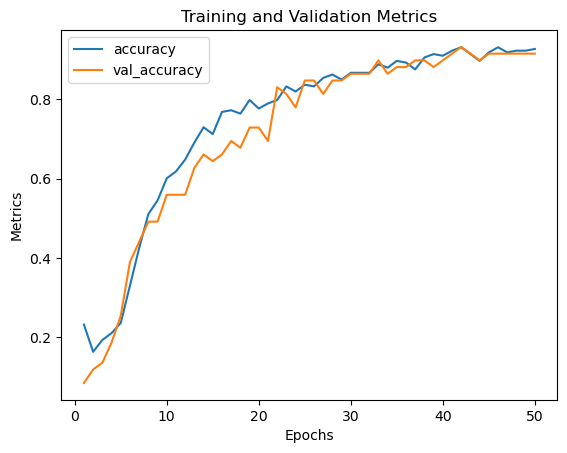

In [384]:
epochs =list(range(1, 51))
plt.plot(epochs, annm_history.history['accuracy'], label='accuracy')
plt.plot(epochs, annm_history.history['val_accuracy'], label='val_accuracy')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()  # Show legend
# Display the plot
plt.show()

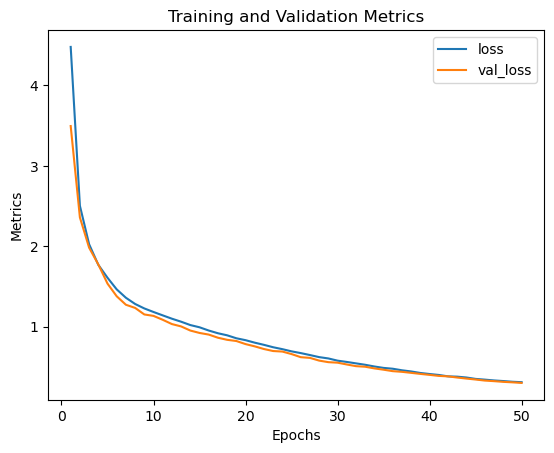

In [385]:
epochs =list(range(1, 51))
plt.plot(epochs, annm_history.history['loss'], label='loss')
plt.plot(epochs, annm_history.history['val_loss'], label='val_loss')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()  # Show legend
# Display the plot
plt.show()

In [386]:
y_pred = clm.predict(X_testm)
y_pred_labelsm = np.argmax(y_pred, axis=1)

3/3 [==============================] - 0s 2ms/step


In [387]:
from sklearn.metrics import classification_report,f1_score

model_name="ANN   with Feature Engineering"
accuracy = round(accuracy_score(y_testm,y_pred_labelsm), 4)
precision = round(precision_score(y_testm, y_pred_labelsm,average='weighted'),4)
recall = round(recall_score(y_testm, y_pred_labelsm,average='weighted'), 4)
f1 = round(f1_score(y_testm, y_pred_labelsm,average='weighted'), 4)

metrics=[model_name,accuracy,precision,recall,f1]

for i in range(len(results_dic2)):
    for metric in metrics:
        results_dic2[list(results_dic2.keys())[i]].append(metric)
        i+=1
        if i==len(results_dic2):
            break
    break



print('Accuracy:', accuracy)
print('precision:', precision)
print('Recall:', recall)
print('F1:', f1)
    

#print classification report
print('Classification Report:\n', classification_report(y_testm, y_pred_labelsm))


Accuracy: 0.0135
precision: 0.0251
Recall: 0.0135
F1: 0.0176
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         9
           3       0.14      0.08      0.10        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         3

    accuracy                           0.01        74
   macro avg       0.02      0.01      0.01        74
weighted avg       0.03      0.01      0.02        74



ANN extermily poor performance

### Model results with Feature Engineering

In [388]:
df_results2=pd.DataFrame(results_dic2).sort_values(by=['F1 score'],ascending=False)
df_results2

Model Name  Accuracy  Precision  \
11  Gradient Boosting hyperparameter  with Feature...    0.9865     0.9875   
15  CAT Boosting hyperparameter  with Feature Engi...    0.9595     0.9589   
10        Gradient Boosting  with Feature Engineering    0.9595     0.9608   
14            Cat Boosting   with Feature Engineering    0.9459     0.9462   
6             Random Forest  with Feature Engineering    0.9459     0.9462   
1   Logistic Regression hyperparameter with Featur...    0.9459     0.9489   
7   Random Forest hyperparameter  with Feature Eng...    0.9459     0.9468   
0        Logistic Regression with Feature Engineering    0.9459     0.9447   
13  ADA Boosting hyperparameter  with Feature Engi...    0.9324     0.9371   
9        SVM hyperparameter  with Feature Engineering    0.9189     0.9265   
4             Decision Tree  with Feature Engineering    0.9054     0.9188   
5   Decision Tree hyperparamete with Feature Engin...    0.8919     0.8984   
3          KNN hyperprameter with Feature Engineering    0.7568     0.7891   
2                        KNN with Feature Engineering    0.7432     0.7730   
8                       SVM  with Feature Engineering    0.5946     0.5211   
12             ADA Boosting  with Feature Engineering    0.3378     0.2162   
16             XG Boosting   with Feature Engineering    0.0270     0.0439   
18                     ANN   with Feature Engineering    0.0135     0.0251   
17  XG Boosting hyperparameter  with Feature Engin...    0.0135     0.0220   

    Recall  F1 score  
11  0.9865    0.9863  
15  0.9595    0.9585  
10  0.9595    0.9585  
14  0.9459    0.9455  
6   0.9459    0.9455  
1   0.9459    0.9446  
7   0.9459    0.9440  
0   0.9459    0.9432  
13  0.9324    0.9338  
9   0.9189    0.9119  
4   0.9054    0.9070  
5   0.8919    0.8903  
3   0.7568    0.7678  
2   0.7432    0.7479  
8   0.5946    0.5402  
12  0.3378    0.2505  
16  0.0270    0.0335  
18  0.0135    0.0176  
17  0.0135    0.0167

### Model results without Feature Engineering

In [389]:
df_results1=pd.DataFrame(results_dic).sort_values(by=['F1 score'], ascending=False)
df_results1

Model Name  Accuracy  Precision  Recall  \
13                             CAT Boost    1.0000     1.0000  1.0000   
15               XG Boost hyperparameter    1.0000     1.0000  1.0000   
10                       Gradient Boost     1.0000     1.0000  1.0000   
0                   Logistic Regression     0.9865     0.9878  0.9865   
16                                   ANN    0.9865     0.9878  0.9865   
6                         Random Forest     0.9865     0.9878  0.9865   
7          Decision Tree Hyperparameter     0.9865     0.9878  0.9865   
14                              XG Boost    0.9865     0.9878  0.9865   
1   Logistic Regression hyperparameter      0.9865     0.9878  0.9865   
4                         Decision Tree     0.9865     0.9869  0.9865   
5           Decision Tree Hyperparameter    0.9730     0.9779  0.9730   
17                                   LDA    0.9730     0.9743  0.9730   
9                    SVM Hyperparameter     0.9730     0.9779  0.9730   
12                   Ada Hyperparameter     0.9595     0.9696  0.9595   
3     K Nearest Neighbor hyperparameter     0.8919     0.9027  0.8919   
11                                  ADA     0.8919     0.8347  0.8919   
2                   K Nearest Neighbor      0.8378     0.8508  0.8378   
8                                   SVM     0.7432     0.6518  0.7432   

    F1 score  
13    1.0000  
15    1.0000  
10    1.0000  
0     0.9864  
16    0.9864  
6     0.9864  
7     0.9864  
14    0.9864  
1     0.9864  
4     0.9862  
5     0.9735  
17    0.9730  
9     0.9725  
12    0.9603  
3     0.8959  
11    0.8545  
2     0.8435  
8     0.6765

### Here we have choosen the model of  _Gradient boosting with hyperparameter tuning and Feature Engineering_

# Task3: Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 

### collecting user input from the doctor and recommending doctors to diagnose the patient's skin conditions

In [ ]:
# Define the number of input features
num_features = 23

# Define the dropdown options for each feature
dropdown_options = ["not present", "Mild level", "Moderate level", "Severe level"]

# Define custom feature names
feature_names = ['erythema', 'scaling', 'definite_borders', 'itching',
                 'koebner_phenomenon', 'follicular_papules',
                 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
                 'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
                 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
                 'hyperkeratosis', 'parakeratosis', 'elongation_of_the_rete_ridges',
                 'spongiform_pustule', 'munro_microabcess',
                 'disappearance_of_the_granular_layer', 'spongiosis',
                 'inflammatory_mononuclear_infiltrate', 'Age']

prediction_mapping = {
    1: "psoriasis",
    2: "seborrheic dermatitis",
    3: "lichen planus",
    4: "pityriasis rosea",
    5: "chronic dermatitis",
    6: "pityriasis rubra pilaris"
}

# Define the mapping of 'family_history' dropdown options to values
family_history_mapping = {
    'No': 0,
    'Yes': 1
}

# Initialize a list to store user inputs
user_inputs = []

# Get user input for each feature
for i in range(num_features):
    if i == num_features - 1:  # Age feature
        print(f"Enter Patient age:")
        age_input = input("Entered Patient age is : ")
        if age_input.isdigit() and 1 <= int(age_input) <= 100:
            user_inputs.append(int(age_input))
        else:
            print("Invalid input. Using default age")
            user_inputs.append(data.Age.median())
    elif feature_names[i] == 'family_history':  # 'family_history' feature
        print(f"Select an option for \033[38;2;255;140;0m{feature_names[i]}\033[0m  :")
        print("\033[34m0. No\033[0m")
        print("\033[34m1. Yes\033[0m")
        selection = input("Enter your selection (0-1): ")
        if selection.isdigit() and 0 <= int(selection) <= 1:
            selected_option = int(selection)
            user_inputs.append(selected_option)
        else:
            print(f"Invalid input. Using default option for \033[38;2;255;140;0m{feature_names[i]}\033[0m as (No).")
            user_inputs.append(0)
    else:
        print(f"Select an option for \033[38;2;255;140;0m{feature_names[i]}\033[0m level:")
        for j, option in enumerate(dropdown_options):
            print(f"\033[34m{j}. {option}\033[0m")
        selection = input("Enter your selection (0-3): ")
        if selection.isdigit() and 0 <= int(selection) <= 3:
            selected_option = int(selection)
            user_inputs.append(selected_option)
        else:
            print(f"Invalid input. Using default option for \033[38;2;255;140;0m{feature_names[i]}\033[0m as (not present).")
            user_inputs.append(0)

# Convert user inputs to a numpy array
user_inputs_arr = np.array(user_inputs).reshape(1, -1)

# Perform prediction using the user inputs
# prediction = model.predict(user_inputs_arr)

# Example prediction using a dummy value (replace with your own prediction)
prediction = gradm_hyper.predict(user_inputs_arr)

# Map the numerical prediction to a label
predicted_label = prediction_mapping.get(prediction[0], 'Unknown error')

# Display the prediction result
print(f"the patient is suffering from \033[91m{predicted_label}\033[0m type of skin disease")


Select an option for erythema level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 2
Select an option for scaling level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 1
Select an option for definite_borders level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 3
Select an option for itching level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 1
Select an option for koebner_phenomenon level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 2
Select an option for follicular_papules level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 3
Select an option for knee_and_elbow_involvement level:
0. not present
1. Mild level
2. Moderate level
3. Severe level
Enter your selection (0-3): 2
Select an option for scalp_involvement level:


# Model Comparison Report

- Here we can see that CatBoost and Gradient Boost is giving Highest performance when feature engineering is not applied
- We get to know that model is overfitting,Overfitting occurs when the model learns the noise in the data instead of the underlying pattern.
- Then after performing feature engineering, we see that Gradient Boost with hyperparameter tuning gives best performence 

# Report on Challenges faced

- The dataset is very small so it there is high chance of overfitting
- This is a medical dataset ,so we dont know how high the perfomrance of the model should be judged.